# Google Colab Lab Assignment -LSTM

**Course Name:** Deep Learning

**Lab Title:** time series using LSTM-based models

**Student Name:** Pranav Khatavkar

**Student ID:**202201090028


**Group Members**: Aditya Sawleshwarkar, Omkar Karlekar


**Objective**
To forecast future values of a univariate time series using LSTM-based models.





**Experiment 5.1: Time Series Forecasting with LSTM**

Dataset : https://www.kaggle.com/datasets/ckskaggle/synthetic-smart-home-energy-data/data






/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0378 - val_loss: 0.0107
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0114 - val_loss: 0.0125
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - val_loss: 0.0111
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0100 - val_loss: 0.0111
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0101 - val_loss: 0.0095
Epoch 9/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 10/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0098 - val_loss: 0.0096
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


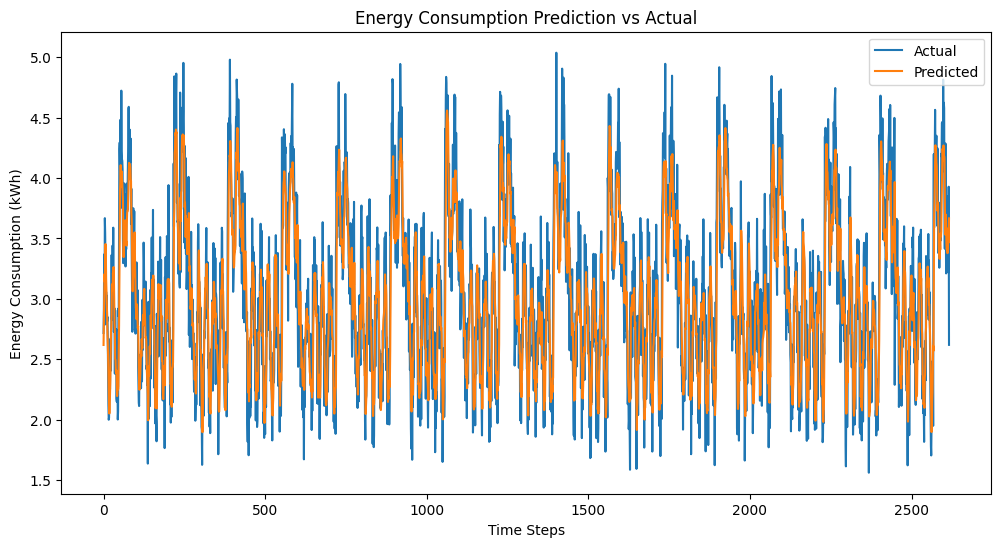

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv('/content/synthetic_energy_data.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Focus only on the target variable
data = df[['energy_consumption']]

# Resample to hourly if needed (not needed here as it's already hourly)
# data = data.resample('H').mean().interpolate()

# Normalize the target variable
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # use past 24 hours to predict next
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Predict
predictions = model.predict(X_test)

# Invert scaling for predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.title('Energy Consumption Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()


**Experiment 5.2: Sequence Text Prediction with LSTM**

Dataset : self defined


# Dataset

In [3]:
data='''Chapter I.]


It is a truth universally acknowledged, that a single man in possession
of a good fortune must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered as the rightful
property of some one or other of their daughters.

“My dear Mr. Bennet,” said his lady to him one day, “have you heard that
Netherfield Park is let at last?”

Mr. Bennet replied that he had not.

“But it is,” returned she; “for Mrs. Long has just been here, and she
told me all about it.”

Mr. Bennet made no answer.

“Do not you want to know who has taken it?” cried his wife, impatiently.

“_You_ want to tell me, and I have no objection to hearing it.”

[Illustration:

“He came down to see the place”

[_Copyright 1894 by George Allen._]]

This was invitation enough.

“Why, my dear, you must know, Mrs. Long says that Netherfield is taken
by a young man of large fortune from the north of England; that he came
down on Monday in a chaise and four to see the place, and was so much
delighted with it that he agreed with Mr. Morris immediately; that he is
to take possession before Michaelmas, and some of his servants are to be
in the house by the end of next week.”

“What is his name?”

“Bingley.”

“Is he married or single?”

“Oh, single, my dear, to be sure! A single man of large fortune; four or
five thousand a year. What a fine thing for our girls!”

“How so? how can it affect them?”

“My dear Mr. Bennet,” replied his wife, “how can you be so tiresome? You
must know that I am thinking of his marrying one of them.”

“Is that his design in settling here?”

“Design? Nonsense, how can you talk so! But it is very likely that he
_may_ fall in love with one of them, and therefore you must visit him as
soon as he comes.”

“I see no occasion for that. You and the girls may go--or you may send
them by themselves, which perhaps will be still better; for as you are
as handsome as any of them, Mr. Bingley might like you the best of the
party.”

“My dear, you flatter me. I certainly _have_ had my share of beauty, but
I do not pretend to be anything extraordinary now. When a woman has five
grown-up daughters, she ought to give over thinking of her own beauty.”

“In such cases, a woman has not often much beauty to think of.”

“But, my dear, you must indeed go and see Mr. Bingley when he comes into
the neighbourhood.”

“It is more than I engage for, I assure you.”

“But consider your daughters. Only think what an establishment it would
be for one of them. Sir William and Lady Lucas are determined to go,
merely on that account; for in general, you know, they visit no new
comers. Indeed you must go, for it will be impossible for _us_ to visit
him, if you do not.”

“You are over scrupulous, surely. I dare say Mr. Bingley will be very
glad to see you; and I will send a few lines by you to assure him of my
hearty consent to his marrying whichever he chooses of the girls--though
I must throw in a good word for my little Lizzy.”

“I desire you will do no such thing. Lizzy is not a bit better than the
others: and I am sure she is not half so handsome as Jane, nor half so
good-humoured as Lydia. But you are always giving _her_ the preference.”

“They have none of them much to recommend them,” replied he: “they are
all silly and ignorant like other girls; but Lizzy has something more of
quickness than her sisters.”

“Mr. Bennet, how can you abuse your own children in such a way? You take
delight in vexing me. You have no compassion on my poor nerves.”

“You mistake me, my dear. I have a high respect for your nerves. They
are my old friends. I have heard you mention them with consideration
these twenty years at least.”

“Ah, you do not know what I suffer.”

“But I hope you will get over it, and live to see many young men of four
thousand a year come into the neighbourhood.”

“It will be no use to us, if twenty such should come, since you will not
visit them.”

“Depend upon it, my dear, that when there are twenty, I will visit them
all.”

Mr. Bennet was so odd a mixture of quick parts, sarcastic humour,
reserve, and caprice, that the experience of three-and-twenty years had
been insufficient to make his wife understand his character. _Her_ mind
was less difficult to develope. She was a woman of mean understanding,
little information, and uncertain temper. When she was discontented, she
fancied herself nervous. The business of her life was to get her
daughters married: its solace was visiting and news.

[Illustration: M^{r.} & M^{rs.} Bennet

[_Copyright 1894 by George Allen._]]




[Illustration:

“I hope Mr. Bingley will like it”

[_Copyright 1894 by George Allen._]]




CHAPTER II.


[Illustration]

Mr. Bennet was among the earliest of those who waited on Mr. Bingley. He
had always intended to visit him, though to the last always assuring his
wife that he should not go; and till the evening after the visit was
paid she had no knowledge of it. It was then disclosed in the following
manner. Observing his second daughter employed in trimming a hat, he
suddenly addressed her with,--

“I hope Mr. Bingley will like it, Lizzy.”

“We are not in a way to know _what_ Mr. Bingley likes,” said her mother,
resentfully, “since we are not to visit.”

“But you forget, mamma,” said Elizabeth, “that we shall meet him at the
assemblies, and that Mrs. Long has promised to introduce him.”

“I do not believe Mrs. Long will do any such thing. She has two nieces
of her own. She is a selfish, hypocritical woman, and I have no opinion
of her.”

“No more have I,” said Mr. Bennet; “and I am glad to find that you do
not depend on her serving you.”

Mrs. Bennet deigned not to make any reply; but, unable to contain
herself, began scolding one of her daughters.

“Don’t keep coughing so, Kitty, for heaven’s sake! Have a little
compassion on my nerves. You tear them to pieces.”

“Kitty has no discretion in her coughs,” said her father; “she times
them ill.”

“I do not cough for my own amusement,” replied Kitty, fretfully. “When
is your next ball to be, Lizzy?”

“To-morrow fortnight.”

“Ay, so it is,” cried her mother, “and Mrs. Long does not come back till
the day before; so, it will be impossible for her to introduce him, for
she will not know him herself.”

“Then, my dear, you may have the advantage of your friend, and introduce
Mr. Bingley to _her_.”

“Impossible, Mr. Bennet, impossible, when I am not acquainted with him
myself; how can you be so teasing?”

“I honour your circumspection. A fortnight’s acquaintance is certainly
very little. One cannot know what a man really is by the end of a
fortnight. But if _we_ do not venture, somebody else will; and after
all, Mrs. Long and her nieces must stand their chance; and, therefore,
as she will think it an act of kindness, if you decline the office, I
will take it on myself.”

The girls stared at their father. Mrs. Bennet said only, “Nonsense,
nonsense!”

“What can be the meaning of that emphatic exclamation?” cried he. “Do
you consider the forms of introduction, and the stress that is laid on
them, as nonsense? I cannot quite agree with you _there_. What say you,
Mary? For you are a young lady of deep reflection, I know, and read
great books, and make extracts.”

Mary wished to say something very sensible, but knew not how.

“While Mary is adjusting her ideas,” he continued, “let us return to Mr.
Bingley.”

“I am sick of Mr. Bingley,” cried his wife.

“I am sorry to hear _that_; but why did you not tell me so before? If I
had known as much this morning, I certainly would not have called on
him. It is very unlucky; but as I have actually paid the visit, we
cannot escape the acquaintance now.”

The astonishment of the ladies was just what he wished--that of Mrs.
Bennet perhaps surpassing the rest; though when the first tumult of joy
was over, she began to declare that it was what she had expected all the
while.

“How good it was in you, my dear Mr. Bennet! But I knew I should
persuade you at last. I was sure you loved your girls too well to
neglect such an acquaintance. Well, how pleased I am! And it is such a
good joke, too, that you should have gone this morning, and never said a
word about it till now.”

“Now, Kitty, you may cough as much as you choose,” said Mr. Bennet; and,
as he spoke, he left the room, fatigued with the raptures of his wife.

“What an excellent father you have, girls,” said she, when the door was
shut. “I do not know how you will ever make him amends for his kindness;
or me either, for that matter. At our time of life, it is not so
pleasant, I can tell you, to be making new acquaintances every day; but
for your sakes we would do anything. Lydia, my love, though you _are_
the youngest, I dare say Mr. Bingley will dance with you at the next
ball.”

“Oh,” said Lydia, stoutly, “I am not afraid; for though I _am_ the
youngest, I’m the tallest.”

The rest of the evening was spent in conjecturing how soon he would
return Mr. Bennet’s visit, and determining when they should ask him to
dinner.

[Illustration: “I’m the tallest”]




[Illustration:

     “He rode a black horse”
]




CHAPTER III.


[Illustration]

Not all that Mrs. Bennet, however, with the assistance of her five
daughters, could ask on the subject, was sufficient to draw from her
husband any satisfactory description of Mr. Bingley. They attacked him
in various ways, with barefaced questions, ingenious suppositions, and
distant surmises; but he eluded the skill of them all; and they were at
last obliged to accept the second-hand intelligence of their neighbour,
Lady Lucas. Her report was highly favourable. Sir William had been
delighted with him. He was quite young, wonderfully handsome, extremely
agreeable, and, to crown the whole, he meant to be at the next assembly
with a large party. Nothing could be more delightful! To be fond of
dancing was a certain step towards falling in love; and very lively
hopes of Mr. Bingley’s heart were entertained.

“If I can but see one of my daughters happily settled at Netherfield,”
said Mrs. Bennet to her husband, “and all the others equally well
married, I shall have nothing to wish for.”

In a few days Mr. Bingley returned Mr. Bennet’s visit, and sat about ten
minutes with him in his library. He had entertained hopes of being
admitted to a sight of the young ladies, of whose beauty he had heard
much; but he saw only the father. The ladies were somewhat more
fortunate, for they had the advantage of ascertaining, from an upper
window, that he wore a blue coat and rode a black horse.

An invitation to dinner was soon afterwards despatched; and already had
Mrs. Bennet planned the courses that were to do credit to her
housekeeping, when an answer arrived which deferred it all. Mr. Bingley
was obliged to be in town the following day, and consequently unable to
accept the honour of their invitation, etc. Mrs. Bennet was quite
disconcerted. She could not imagine what business he could have in town
so soon after his arrival in Hertfordshire; and she began to fear that
he might always be flying about from one place to another, and never
settled at Netherfield as he ought to be. Lady Lucas quieted her fears a
little by starting the idea of his

[Illustration:

     “When the Party entered”

[_Copyright 1894 by George Allen._]]

being gone to London only to get a large party for the ball; and a
report soon followed that Mr. Bingley was to bring twelve ladies and
seven gentlemen with him to the assembly. The girls grieved over such a
number of ladies; but were comforted the day before the ball by hearing
that, instead of twelve, he had brought only six with him from London,
his five sisters and a cousin. And when the party entered the
assembly-room, it consisted of only five altogether: Mr. Bingley, his
two sisters, the husband of the eldest, and another young man.

Mr. Bingley was good-looking and gentlemanlike: he had a pleasant
countenance, and easy, unaffected manners. His sisters were fine women,
with an air of decided fashion. His brother-in-law, Mr. Hurst, merely
looked the gentleman; but his friend Mr. Darcy soon drew the attention
of the room by his fine, tall person, handsome features, noble mien, and
the report, which was in general circulation within five minutes after
his entrance, of his having ten thousand a year. The gentlemen
pronounced him to be a fine figure of a man, the ladies declared he was
much handsomer than Mr. Bingley, and he was looked at with great
admiration for about half the evening, till his manners gave a disgust
which turned the tide of his popularity; for he was discovered to be
proud, to be above his company, and above being pleased; and not all his
large estate in Derbyshire could save him from having a most forbidding,
disagreeable countenance, and being unworthy to be compared with his
friend.

Mr. Bingley had soon made himself acquainted with all the principal
people in the room: he was lively and unreserved, danced every dance,
was angry that the ball closed so early, and talked of giving one
himself at Netherfield. Such amiable qualities must speak for
themselves. What a contrast between him and his friend! Mr. Darcy danced
only once with Mrs. Hurst and once with Miss Bingley, declined being
introduced to any other lady, and spent the rest of the evening in
walking about the room, speaking occasionally to one of his own party.
His character was decided. He was the proudest, most disagreeable man in
the world, and everybody hoped that he would never come there again.
Amongst the most violent against him was Mrs. Bennet, whose dislike of
his general behaviour was sharpened into particular resentment by his
having slighted one of her daughters.

Elizabeth Bennet had been obliged, by the scarcity of gentlemen, to sit
down for two dances; and during part of that time, Mr. Darcy had been
standing near enough for her to overhear a conversation between him and
Mr. Bingley, who came from the dance for a few minutes to press his
friend to join it.

“Come, Darcy,” said he, “I must have you dance. I hate to see you
standing about by yourself in this stupid manner. You had much better
dance.”

“I certainly shall not. You know how I detest it, unless I am
particularly acquainted with my partner. At such an assembly as this, it
would be insupportable. Your sisters are engaged, and there is not
another woman in the room whom it would not be a punishment to me to
stand up with.”

“I would not be so fastidious as you are,” cried Bingley, “for a
kingdom! Upon my honour, I never met with so many pleasant girls in my
life as I have this evening; and there are several of them, you see,
uncommonly pretty.”

“_You_ are dancing with the only handsome girl in the room,” said Mr.
Darcy, looking at the eldest Miss Bennet.

“Oh, she is the most beautiful creature I ever beheld! But there is one
of her sisters sitting down just behind you, who is very pretty, and I
dare say very agreeable. Do let me ask my partner to introduce you.”

[Illustration:

“She is tolerable”

[_Copyright 1894 by George Allen._]]

“Which do you mean?” and turning round, he looked for a moment at
Elizabeth, till, catching her eye, he withdrew his own, and coldly said,
“She is tolerable: but not handsome enough to tempt _me_; and I am in no
humour at present to give consequence to young ladies who are slighted
by other men. You had better return to your partner and enjoy her
smiles, for you are wasting your time with me.”

Mr. Bingley followed his advice. Mr. Darcy walked off; and Elizabeth
remained with no very cordial feelings towards him. She told the story,
however, with great spirit among her friends; for she had a lively,
playful disposition, which delighted in anything ridiculous.

The evening altogether passed off pleasantly to the whole family. Mrs.
Bennet had seen her eldest daughter much admired by the Netherfield
party. Mr. Bingley had danced with her twice, and she had been
distinguished by his sisters. Jane was as much gratified by this as her
mother could be, though in a quieter way. Elizabeth felt Jane’s
pleasure. Mary had heard herself mentioned to Miss Bingley as the most
accomplished girl in the neighbourhood; and Catherine and Lydia had been
fortunate enough to be never without partners, which was all that they
had yet learnt to care for at a ball. They returned, therefore, in good
spirits to Longbourn, the village where they lived, and of which they
were the principal inhabitants. They found Mr. Bennet still up. With a
book, he was regardless of time; and on the present occasion he had a
good deal of curiosity as to the event of an evening which had raised
such splendid expectations. He had rather hoped that all his wife’s
views on the stranger would be disappointed; but he soon found that he
had a very different story to hear.

“Oh, my dear Mr. Bennet,” as she entered the room, “we have had a most
delightful evening, a most excellent ball. I wish you had been there.
Jane was so admired, nothing could be like it. Everybody said how well
she looked; and Mr. Bingley thought her quite beautiful, and danced with
her twice. Only think of _that_, my dear: he actually danced with her
twice; and she was the only creature in the room that he asked a second
time. First of all, he asked Miss Lucas. I was so vexed to see him stand
up with her; but, however, he did not admire her at all; indeed, nobody
can, you know; and he seemed quite struck with Jane as she was going
down the dance. So he inquired who she was, and got introduced, and
asked her for the two next. Then, the two third he danced with Miss
King, and the two fourth with Maria Lucas, and the two fifth with Jane
again, and the two sixth with Lizzy, and the _Boulanger_----”

“If he had had any compassion for _me_,” cried her husband impatiently,
“he would not have danced half so much! For God’s sake, say no more of
his partners. O that he had sprained his ancle in the first dance!”

“Oh, my dear,” continued Mrs. Bennet, “I am quite delighted with him. He
is so excessively handsome! and his sisters are charming women. I never
in my life saw anything more elegant than their dresses. I dare say the
lace upon Mrs. Hurst’s gown----”

Here she was interrupted again. Mr. Bennet protested against any
description of finery. She was therefore obliged to seek another branch
of the subject, and related, with much bitterness of spirit, and some
exaggeration, the shocking rudeness of Mr. Darcy.

“But I can assure you,” she added, “that Lizzy does not lose much by not
suiting _his_ fancy; for he is a most disagreeable, horrid man, not at
all worth pleasing. So high and so conceited, that there was no enduring
him! He walked here, and he walked there, fancying himself so very
great! Not handsome enough to dance with! I wish you had been there, my
dear, to have given him one of your set-downs. I quite detest the man.”




[Illustration]




CHAPTER IV.


[Illustration]

When Jane and Elizabeth were alone, the former, who had been cautious in
her praise of Mr. Bingley before, expressed to her sister how very much
she admired him.

“He is just what a young-man ought to be,” said she, “sensible,
good-humoured, lively; and I never saw such happy manners! so much ease,
with such perfect good breeding!”

“He is also handsome,” replied Elizabeth, “which a young man ought
likewise to be if he possibly can. His character is thereby complete.”

“I was very much flattered by his asking me to dance a second time. I
did not expect such a compliment.”

“Did not you? _I_ did for you. But that is one great difference between
us. Compliments always take _you_ by surprise, and _me_ never. What
could be more natural than his asking you again? He could not help
seeing that you were about five times as pretty as every other woman in
the room. No thanks to his gallantry for that. Well, he certainly is
very agreeable, and I give you leave to like him. You have liked many a
stupider person.”

“Dear Lizzy!”

“Oh, you are a great deal too apt, you know, to like people in general.
You never see a fault in anybody. All the world are good and agreeable
in your eyes. I never heard you speak ill of a human being in my life.”

“I would wish not to be hasty in censuring anyone; but I always speak
what I think.”

“I know you do: and it is _that_ which makes the wonder. With _your_
good sense, to be so honestly blind to the follies and nonsense of
others! Affectation of candour is common enough; one meets with it
everywhere. But to be candid without ostentation or design,--to take the
good of everybody’s character and make it still better, and say nothing
of the bad,--belongs to you alone. And so, you like this man’s sisters,
too, do you? Their manners are not equal to his.”

“Certainly not, at first; but they are very pleasing women when you
converse with them. Miss Bingley is to live with her brother, and keep
his house; and I am much mistaken if we shall not find a very charming
neighbour in her.”

Elizabeth listened in silence, but was not convinced: their behaviour at
the assembly had not been calculated to please in general; and with more
quickness of observation and less pliancy of temper than her sister, and
with a judgment, too, unassailed by any attention to herself, she was
very little disposed to approve them. They were, in fact, very fine
ladies; not deficient in good-humour when they were pleased, nor in the
power of being agreeable where they chose it; but proud and conceited.
They were rather handsome; had been educated in one of the first private
seminaries in town; had a fortune of twenty thousand pounds; were in the
habit of spending more than they ought, and of associating with people
of rank; and were, therefore, in every respect entitled to think well of
themselves and meanly of others. They were of a respectable family in
the north of England; a circumstance more deeply impressed on their
memories than that their brother’s fortune and their own had been
acquired by trade.

Mr. Bingley inherited property to the amount of nearly a hundred
thousand pounds from his father, who had intended to purchase an estate,
but did not live to do it. Mr. Bingley intended it likewise, and
sometimes made choice of his county; but, as he was now provided with a
good house and the liberty of a manor, it was doubtful to many of those
who best knew the easiness of his temper, whether he might not spend the
remainder of his days at Netherfield, and leave the next generation to
purchase.

His sisters were very anxious for his having an estate of his own; but
though he was now established only as a tenant, Miss Bingley was by no
means unwilling to preside at his table; nor was Mrs. Hurst, who had
married a man of more fashion than fortune, less disposed to consider
his house as her home when it suited her. Mr. Bingley had not been of
age two years when he was tempted, by an accidental recommendation, to
look at Netherfield House. He did look at it, and into it, for half an
hour; was pleased with the situation and the principal rooms, satisfied
with what the owner said in its praise, and took it immediately.

Between him and Darcy there was a very steady friendship, in spite of a
great opposition of character. Bingley was endeared to Darcy by the
easiness, openness, and ductility of his temper, though no disposition
could offer a greater contrast to his own, and though with his own he
never appeared dissatisfied. On the strength of Darcy’s regard, Bingley
had the firmest reliance, and of his judgment the highest opinion. In
understanding, Darcy was the superior. Bingley was by no means
deficient; but Darcy was clever. He was at the same time haughty,
reserved, and fastidious; and his manners, though well bred, were not
inviting. In that respect his friend had greatly the advantage. Bingley
was sure of being liked wherever he appeared; Darcy was continually
giving offence.

The manner in which they spoke of the Meryton assembly was sufficiently
characteristic. Bingley had never met with pleasanter people or prettier
girls in his life; everybody had been most kind and attentive to him;
there had been no formality, no stiffness; he had soon felt acquainted
with all the room; and as to Miss Bennet, he could not conceive an angel
more beautiful. Darcy, on the contrary, had seen a collection of people
in whom there was little beauty and no fashion, for none of whom he had
felt the smallest interest, and from none received either attention or
pleasure. Miss Bennet he acknowledged to be pretty; but she smiled too
much.

Mrs. Hurst and her sister allowed it to be so; but still they admired
her and liked her, and pronounced her to be a sweet girl, and one whom
they should not object to know more of. Miss Bennet was therefore
established as a sweet girl; and their brother felt authorized by such
commendation to think of her as he chose.




[Illustration: [_Copyright 1894 by George Allen._]]




CHAPTER V.


[Illustration]

Within a short walk of Longbourn lived a family with whom the Bennets
were particularly intimate. Sir William Lucas had been formerly in trade
in Meryton, where he had made a tolerable fortune, and risen to the
honour of knighthood by an address to the king during his mayoralty. The
distinction had, perhaps, been felt too strongly. It had given him a
disgust to his business and to his residence in a small market town;
and, quitting them both, he had removed with his family to a house about
a mile from Meryton, denominated from that period Lucas Lodge; where he
could think with pleasure of his own importance, and, unshackled by
business, occupy himself solely in being civil to all the world. For,
though elated by his rank, it did not render him supercilious; on the
contrary, he was all attention to everybody. By nature inoffensive,
friendly, and obliging, his presentation at St. James’s had made him
courteous.

Lady Lucas was a very good kind of woman, not too clever to be a
valuable neighbour to Mrs. Bennet. They had several children. The eldest
of them, a sensible, intelligent young woman, about twenty-seven, was
Elizabeth’s intimate friend.

That the Miss Lucases and the Miss Bennets should meet to talk over a
ball was absolutely necessary; and the morning after the assembly
brought the former to Longbourn to hear and to communicate.

“_You_ began the evening well, Charlotte,” said Mrs. Bennet, with civil
self-command, to Miss Lucas. “_You_ were Mr. Bingley’s first choice.”

“Yes; but he seemed to like his second better.”

“Oh, you mean Jane, I suppose, because he danced with her twice. To be
sure that _did_ seem as if he admired her--indeed, I rather believe he
_did_--I heard something about it--but I hardly know what--something
about Mr. Robinson.”

“Perhaps you mean what I overheard between him and Mr. Robinson: did not
I mention it to you? Mr. Robinson’s asking him how he liked our Meryton
assemblies, and whether he did not think there were a great many pretty
women in the room, and _which_ he thought the prettiest? and his
answering immediately to the last question, ‘Oh, the eldest Miss Bennet,
beyond a doubt: there cannot be two opinions on that point.’”

“Upon my word! Well, that was very decided, indeed--that does seem as
if--but, however, it may all come to nothing, you know.”

“_My_ overhearings were more to the purpose than _yours_, Eliza,” said
Charlotte. “Mr. Darcy is not so well worth listening to as his friend,
is he? Poor Eliza! to be only just _tolerable_.”

“I beg you will not put it into Lizzy’s head to be vexed by his
ill-treatment, for he is such a disagreeable man that it would be quite
a misfortune to be liked by him. Mrs. Long told me last night that he
sat close to her for half an hour without once opening his lips.”

[Illustration: “Without once opening his lips”

[_Copyright 1894 by George Allen._]]

“Are you quite sure, ma’am? Is not there a little mistake?” said Jane.
“I certainly saw Mr. Darcy speaking to her.”

“Ay, because she asked him at last how he liked Netherfield, and he
could not help answering her; but she said he seemed very angry at being
spoke to.”

“Miss Bingley told me,” said Jane, “that he never speaks much unless
among his intimate acquaintance. With _them_ he is remarkably
agreeable.”

“I do not believe a word of it, my dear. If he had been so very
agreeable, he would have talked to Mrs. Long. But I can guess how it
was; everybody says that he is eat up with pride, and I dare say he had
heard somehow that Mrs. Long does not keep a carriage, and had to come
to the ball in a hack chaise.”

“I do not mind his not talking to Mrs. Long,” said Miss Lucas, “but I
wish he had danced with Eliza.”

“Another time, Lizzy,” said her mother, “I would not dance with _him_,
if I were you.”

“I believe, ma’am, I may safely promise you _never_ to dance with him.”

“His pride,” said Miss Lucas, “does not offend _me_ so much as pride
often does, because there is an excuse for it. One cannot wonder that so
very fine a young man, with family, fortune, everything in his favour,
should think highly of himself. If I may so express it, he has a _right_
to be proud.”

“That is very true,” replied Elizabeth, “and I could easily forgive
_his_ pride, if he had not mortified _mine_.”

“Pride,” observed Mary, who piqued herself upon the solidity of her
reflections, “is a very common failing, I believe. By all that I have
ever read, I am convinced that it is very common indeed; that human
nature is particularly prone to it, and that there are very few of us
who do not cherish a feeling of self-complacency on the score of some
quality or other, real or imaginary. Vanity and pride are different
things, though the words are often used synonymously. A person may be
proud without being vain. Pride relates more to our opinion of
ourselves; vanity to what we would have others think of us.”

“If I were as rich as Mr. Darcy,” cried a young Lucas, who came with his
sisters, “I should not care how proud I was. I would keep a pack of
foxhounds, and drink a bottle of wine every day.”

“Then you would drink a great deal more than you ought,” said Mrs.
Bennet; “and if I were to see you at it, I should take away your bottle
directly.”

The boy protested that she should not; she continued to declare that she
would; and the argument ended only with the visit.

[Illustration]




[Illustration]




CHAPTER VI.


[Illustration]

The ladies of Longbourn soon waited on those of Netherfield. The visit
was returned in due form. Miss Bennet’s pleasing manners grew on the
good-will of Mrs. Hurst and Miss Bingley; and though the mother was
found to be intolerable, and the younger sisters not worth speaking to,
a wish of being better acquainted with _them_ was expressed towards the
two eldest. By Jane this attention was received with the greatest
pleasure; but Elizabeth still saw superciliousness in their treatment of
everybody, hardly excepting even her sister, and could not like them;
though their kindness to Jane, such as it was, had a value, as arising,
in all probability, from the influence of their brother’s admiration. It
was generally evident, whenever they met, that he _did_ admire her; and
to _her_ it was equally evident that Jane was yielding to the preference
which she had begun to entertain for him from the first, and was in a
way to be very much in love; but she considered with pleasure that it
was not likely to be discovered by the world in general, since Jane
united with great strength of feeling, a composure of temper and an
uniform cheerfulness of manner, which would guard her from the
suspicions of the impertinent. She mentioned this to her friend, Miss
Lucas.

“It may, perhaps, be pleasant,” replied Charlotte, “to be able to impose
on the public in such a case; but it is sometimes a disadvantage to be
so very guarded. If a woman conceals her affection with the same skill
from the object of it, she may lose the opportunity of fixing him; and
it will then be but poor consolation to believe the world equally in the
dark. There is so much of gratitude or vanity in almost every
attachment, that it is not safe to leave any to itself. We can all
_begin_ freely--a slight preference is natural enough; but there are
very few of us who have heart enough to be really in love without
encouragement. In nine cases out of ten, a woman had better show _more_
affection than she feels. Bingley likes your sister undoubtedly; but he
may never do more than like her, if she does not help him on.”

“But she does help him on, as much as her nature will allow. If _I_ can
perceive her regard for him, he must be a simpleton indeed not to
discover it too.”

“Remember, Eliza, that he does not know Jane’s disposition as you do.”

“But if a woman is partial to a man, and does not endeavor to conceal
it, he must find it out.”

“Perhaps he must, if he sees enough of her. But though Bingley and Jane
meet tolerably often, it is never for many hours together; and as they
always see each other in large mixed parties, it is impossible that
every moment should be employed in conversing together. Jane should
therefore make the most of every half hour in which she can command his
attention. When she is secure of him, there will be leisure for falling
in love as much as she chooses.”

“Your plan is a good one,” replied Elizabeth, “where nothing is in
question but the desire of being well married; and if I were determined
to get a rich husband, or any husband, I dare say I should adopt it. But
these are not Jane’s feelings; she is not acting by design. As yet she
cannot even be certain of the degree of her own regard, nor of its
reasonableness. She has known him only a fortnight. She danced four
dances with him at Meryton; she saw him one morning at his own house,
and has since dined in company with him four times. This is not quite
enough to make her understand his character.”

“Not as you represent it. Had she merely _dined_ with him, she might
only have discovered whether he had a good appetite; but you must
remember that four evenings have been also spent together--and four
evenings may do a great deal.”

“Yes: these four evenings have enabled them to ascertain that they both
like Vingt-un better than Commerce, but with respect to any other
leading characteristic, I do not imagine that much has been unfolded.”

“Well,” said Charlotte, “I wish Jane success with all my heart; and if
she were married to him to-morrow, I should think she had as good a
chance of happiness as if she were to be studying his character for a
twelvemonth. Happiness in marriage is entirely a matter of chance. If
the dispositions of the parties are ever so well known to each other, or
ever so similar beforehand, it does not advance their felicity in the
least. They always continue to grow sufficiently unlike afterwards to
have their share of vexation; and it is better to know as little as
possible of the defects of the person with whom you are to pass your
life.”

“You make me laugh, Charlotte; but it is not sound. You know it is not
sound, and that you would never act in this way yourself.”

Occupied in observing Mr. Bingley’s attention to her sister, Elizabeth
was far from suspecting that she was herself becoming an object of some
interest in the eyes of his friend. Mr. Darcy had at first scarcely
allowed her to be pretty: he had looked at her without admiration at the
ball; and when they next met, he looked at her only to criticise. But no
sooner had he made it clear to himself and his friends that she had
hardly a good feature in her face, than he began to find it was rendered
uncommonly intelligent by the beautiful expression of her dark eyes. To
this discovery succeeded some others equally mortifying. Though he had
detected with a critical eye more than one failure of perfect symmetry
in her form, he was forced to acknowledge her figure to be light and
pleasing; and in spite of his asserting that her manners were not those
of the fashionable world, he was caught by their easy playfulness. Of
this she was perfectly unaware: to her he was only the man who made
himself agreeable nowhere, and who had not thought her handsome enough
to dance with.

He began to wish to know more of her; and, as a step towards conversing
with her himself, attended to her conversation with others. His doing so
drew her notice. It was at Sir William Lucas’s, where a large party were
assembled.

“What does Mr. Darcy mean,” said she to Charlotte, “by listening to my
conversation with Colonel Forster?”

“That is a question which Mr. Darcy only can answer.”

“But if he does it any more, I shall certainly let him know that I see
what he is about. He has a very satirical eye, and if I do not begin by
being impertinent myself, I shall soon grow afraid of him.”

[Illustration: “The entreaties of several” [_Copyright 1894 by George
Allen._]]

On his approaching them soon afterwards, though without seeming to have
any intention of speaking, Miss Lucas defied her friend to mention such
a subject to him, which immediately provoking Elizabeth to do it, she
turned to him and said,--

“Did not you think, Mr. Darcy, that I expressed myself uncommonly well
just now, when I was teasing Colonel Forster to give us a ball at
Meryton?”

“With great energy; but it is a subject which always makes a lady
energetic.”

“You are severe on us.”

“It will be _her_ turn soon to be teased,” said Miss Lucas. “I am going
to open the instrument, Eliza, and you know what follows.”

“You are a very strange creature by way of a friend!--always wanting me
to play and sing before anybody and everybody! If my vanity had taken a
musical turn, you would have been invaluable; but as it is, I would
really rather not sit down before those who must be in the habit of
hearing the very best performers.” On Miss Lucas’s persevering, however,
she added, “Very well; if it must be so, it must.” And gravely glancing
at Mr. Darcy, “There is a very fine old saying, which everybody here is
of course familiar with--‘Keep your breath to cool your porridge,’--and
I shall keep mine to swell my song.”

Her performance was pleasing, though by no means capital. After a song
or two, and before she could reply to the entreaties of several that she
would sing again, she was eagerly succeeded at the instrument by her
sister Mary, who having, in consequence of being the only plain one in
the family, worked hard for knowledge and accomplishments, was always
impatient for display.

Mary had neither genius nor taste; and though vanity had given her
application, it had given her likewise a pedantic air and conceited
manner, which would have injured a higher degree of excellence than she
had reached. Elizabeth, easy and unaffected, had been listened to with
much more pleasure, though not playing half so well; and Mary, at the
end of a long concerto, was glad to purchase praise and gratitude by
Scotch and Irish airs, at the request of her younger sisters, who with
some of the Lucases, and two or three officers, joined eagerly in
dancing at one end of the room.

Mr. Darcy stood near them in silent indignation at such a mode of
passing the evening, to the exclusion of all conversation, and was too
much engrossed by his own thoughts to perceive that Sir William Lucas
was his neighbour, till Sir William thus began:--

“What a charming amusement for young people this is, Mr. Darcy! There is
nothing like dancing, after all. I consider it as one of the first
refinements of polished societies.”

“Certainly, sir; and it has the advantage also of being in vogue amongst
the less polished societies of the world: every savage can dance.”

Sir William only smiled. “Your friend performs delightfully,” he
continued, after a pause, on seeing Bingley join the group; “and I doubt
not that you are an adept in the science yourself, Mr. Darcy.”

“You saw me dance at Meryton, I believe, sir.”

“Yes, indeed, and received no inconsiderable pleasure from the sight. Do
you often dance at St. James’s?”

“Never, sir.”

“Do you not think it would be a proper compliment to the place?”

“It is a compliment which I never pay to any place if I can avoid it.”

“You have a house in town, I conclude?”

Mr. Darcy bowed.

“I had once some thoughts of fixing in town myself, for I am fond of
superior society; but I did not feel quite certain that the air of
London would agree with Lady Lucas.”

He paused in hopes of an answer: but his companion was not disposed to
make any; and Elizabeth at that instant moving towards them, he was
struck with the notion of doing a very gallant thing, and called out to
her,--

“My dear Miss Eliza, why are not you dancing? Mr. Darcy, you must allow
me to present this young lady to you as a very desirable partner. You
cannot refuse to dance, I am sure, when so much beauty is before you.”
And, taking her hand, he would have given it to Mr. Darcy, who, though
extremely surprised, was not unwilling to receive it, when she instantly
drew back, and said with some discomposure to Sir William,--

“Indeed, sir, I have not the least intention of dancing. I entreat you
not to suppose that I moved this way in order to beg for a partner.”

Mr. Darcy, with grave propriety, requested to be allowed the honour of
her hand, but in vain. Elizabeth was determined; nor did Sir William at
all shake her purpose by his attempt at persuasion.

“You excel so much in the dance, Miss Eliza, that it is cruel to deny me
the happiness of seeing you; and though this gentleman dislikes the
amusement in general, he can have no objection, I am sure, to oblige us
for one half hour.”

“Mr. Darcy is all politeness,” said Elizabeth, smiling.

“He is, indeed: but considering the inducement, my dear Miss Eliza, we
cannot wonder at his complaisance; for who would object to such a
partner?”

Elizabeth looked archly, and turned away. Her resistance had not injured
her with the gentleman, and he was thinking of her with some
complacency, when thus accosted by Miss Bingley,--

“I can guess the subject of your reverie.”

“I should imagine not.”

“You are considering how insupportable it would be to pass many
evenings in this manner,--in such society; and, indeed, I am quite of
your opinion. I was never more annoyed! The insipidity, and yet the
noise--the nothingness, and yet the self-importance, of all these
people! What would I give to hear your strictures on them!”

“Your conjecture is totally wrong, I assure you. My mind was more
agreeably engaged. I have been meditating on the very great pleasure
which a pair of fine eyes in the face of a pretty woman can bestow.”

Miss Bingley immediately fixed her eyes on his face, and desired he
would tell her what lady had the credit of inspiring such reflections.
Mr. Darcy replied, with great intrepidity,--

“Miss Elizabeth Bennet.”

“Miss Elizabeth Bennet!” repeated Miss Bingley. “I am all astonishment.
How long has she been such a favourite? and pray when am I to wish you
joy?”

“That is exactly the question which I expected you to ask. A lady’s
imagination is very rapid; it jumps from admiration to love, from love
to matrimony, in a moment. I knew you would be wishing me joy.”

“Nay, if you are so serious about it, I shall consider the matter as
absolutely settled. You will have a charming mother-in-law, indeed, and
of course she will be always at Pemberley with you.”

He listened to her with perfect indifference, while she chose to
entertain herself in this manner; and as his composure convinced her
that all was safe, her wit flowed along.




[Illustration:

     “A note for Miss Bennet”

[_Copyright 1894 by George Allen._]]




CHAPTER VII.


[Illustration]

Mr. Bennet’s property consisted almost entirely in an estate of two
thousand a year, which, unfortunately for his daughters, was entailed,
in default of heirs male, on a distant relation; and their mother’s
fortune, though ample for her situation in life, could but ill supply
the deficiency of his. Her father had been an attorney in Meryton, and
had left her four thousand pounds.

She had a sister married to a Mr. Philips, who had been a clerk to their
father and succeeded him in the business, and a brother settled in
London in a respectable line of trade.

The village of Longbourn was only one mile from Meryton; a most
convenient distance for the young ladies, who were usually tempted
thither three or four times a week, to pay their duty to their aunt, and
to a milliner’s shop just over the way. The two youngest of the family,
Catherine and Lydia, were particularly frequent in these attentions:
their minds were more vacant than their sisters’, and when nothing
better offered, a walk to Meryton was necessary to amuse their morning
hours and furnish conversation for the evening; and, however bare of
news the country in general might be, they always contrived to learn
some from their aunt. At present, indeed, they were well supplied both
with news and happiness by the recent arrival of a militia regiment in
the neighbourhood; it was to remain the whole winter, and Meryton was
the head-quarters.

Their visits to Mrs. Philips were now productive of the most interesting
intelligence. Every day added something to their knowledge of the
officers’ names and connections. Their lodgings were not long a secret,
and at length they began to know the officers themselves. Mr. Philips
visited them all, and this opened to his nieces a source of felicity
unknown before. They could talk of nothing but officers; and Mr.
Bingley’s large fortune, the mention of which gave animation to their
mother, was worthless in their eyes when opposed to the regimentals of
an ensign.

After listening one morning to their effusions on this subject, Mr.
Bennet coolly observed,--

“From all that I can collect by your manner of talking, you must be two
of the silliest girls in the country. I have suspected it some time, but
I am now convinced.”

Catherine was disconcerted, and made no answer; but Lydia, with perfect
indifference, continued to express her admiration of Captain Carter, and
her hope of seeing him in the course of the day, as he was going the
next morning to London.

“I am astonished, my dear,” said Mrs. Bennet, “that you should be so
ready to think your own children silly. If I wished to think slightingly
of anybody’s children, it should not be of my own, however.”

“If my children are silly, I must hope to be always sensible of it.”

“Yes; but as it happens, they are all of them very clever.”

“This is the only point, I flatter myself, on which we do not agree. I
had hoped that our sentiments coincided in every particular, but I must
so far differ from you as to think our two youngest daughters uncommonly
foolish.”

“My dear Mr. Bennet, you must not expect such girls to have the sense of
their father and mother. When they get to our age, I dare say they will
not think about officers any more than we do. I remember the time when I
liked a red coat myself very well--and, indeed, so I do still at my
heart; and if a smart young colonel, with five or six thousand a year,
should want one of my girls, I shall not say nay to him; and I thought
Colonel Forster looked very becoming the other night at Sir William’s in
his regimentals.”

“Mamma,” cried Lydia, “my aunt says that Colonel Forster and Captain
Carter do not go so often to Miss Watson’s as they did when they first
came; she sees them now very often standing in Clarke’s library.”

Mrs. Bennet was prevented replying by the entrance of the footman with a
note for Miss Bennet; it came from Netherfield, and the servant waited
for an answer. Mrs. Bennet’s eyes sparkled with pleasure, and she was
eagerly calling out, while her daughter read,--

“Well, Jane, who is it from? What is it about? What does he say? Well,
Jane, make haste and tell us; make haste, my love.”

“It is from Miss Bingley,” said Jane, and then read it aloud.

     /* NIND “My dear friend, */

     “If you are not so compassionate as to dine to-day with Louisa and
     me, we shall be in danger of hating each other for the rest of our
     lives; for a whole day’s _tête-à-tête_ between two women can never
     end without a quarrel. Come as soon as you can on the receipt of
     this. My brother and the gentlemen are to dine with the officers.
     Yours ever,

“CAROLINE BINGLEY.”

“With the officers!” cried Lydia: “I wonder my aunt did not tell us of
_that_.”

“Dining out,” said Mrs. Bennet; “that is very unlucky.”

“Can I have the carriage?” said Jane.

“No, my dear, you had better go on horseback, because it seems likely to
rain; and then you must stay all night.”

“That would be a good scheme,” said Elizabeth, “if you were sure that
they would not offer to send her home.”

“Oh, but the gentlemen will have Mr. Bingley’s chaise to go to Meryton;
and the Hursts have no horses to theirs.”

“I had much rather go in the coach.”

“But, my dear, your father cannot spare the horses, I am sure. They are
wanted in the farm, Mr. Bennet, are not they?”

[Illustration: Cheerful prognostics]

“They are wanted in the farm much oftener than I can get them.”

“But if you have got them to-day,” said Elizabeth, “my mother’s purpose
will be answered.”

She did at last extort from her father an acknowledgment that the horses
were engaged; Jane was therefore obliged to go on horseback, and her
mother attended her to the door with many cheerful prognostics of a bad
day. Her hopes were answered; Jane had not been gone long before it
rained hard. Her sisters were uneasy for her, but her mother was
delighted. The rain continued the whole evening without intermission;
Jane certainly could not come back.

“This was a lucky idea of mine, indeed!” said Mrs. Bennet, more than
once, as if the credit of making it rain were all her own. Till the next
morning, however, she was not aware of all the felicity of her
contrivance. Breakfast was scarcely over when a servant from Netherfield
brought the following note for Elizabeth:--

     /* NIND “My dearest Lizzie, */

     “I find myself very unwell this morning, which, I suppose, is to be
     imputed to my getting wet through yesterday. My kind friends will
     not hear of my returning home till I am better. They insist also on
     my seeing Mr. Jones--therefore do not be alarmed if you should hear
     of his having been to me--and, excepting a sore throat and a
     headache, there is not much the matter with me.

“Yours, etc.”

“Well, my dear,” said Mr. Bennet, when Elizabeth had read the note
aloud, “if your daughter should have a dangerous fit of illness--if she
should die--it would be a comfort to know that it was all in pursuit of
Mr. Bingley, and under your orders.”

“Oh, I am not at all afraid of her dying. People do not die of little
trifling colds. She will be taken good care of. As long as she stays
there, it is all very well. I would go and see her if I could have the
carriage.”

Elizabeth, feeling really anxious, determined to go to her, though the
carriage was not to be had: and as she was no horsewoman, walking was
her only alternative. She declared her resolution.

“How can you be so silly,” cried her mother, “as to think of such a
thing, in all this dirt! You will not be fit to be seen when you get
there.”

“I shall be very fit to see Jane--which is all I want.”

“Is this a hint to me, Lizzy,” said her father, “to send for the
horses?”

“No, indeed. I do not wish to avoid the walk. The distance is nothing,
when one has a motive; only three miles. I shall be back by dinner.”

“I admire the activity of your benevolence,” observed Mary, “but every
impulse of feeling should be guided by reason; and, in my opinion,
exertion should always be in proportion to what is required.”

“We will go as far as Meryton with you,” said Catherine and Lydia.
Elizabeth accepted their company, and the three young ladies set off
together.

“If we make haste,” said Lydia, as they walked along, “perhaps we may
see something of Captain Carter, before he goes.”

In Meryton they parted: the two youngest repaired to the lodgings of one
of the officers’ wives, and Elizabeth continued her walk alone, crossing
field after field at a quick pace, jumping over stiles and springing
over puddles, with impatient activity, and finding herself at last
within view of the house, with weary ancles, dirty stockings, and a face
glowing with the warmth of exercise.

She was shown into the breakfast parlour, where all but Jane were
assembled, and where her appearance created a great deal of surprise.
That she should have walked three miles so early in the day in such
dirty weather, and by herself, was almost incredible to Mrs. Hurst and
Miss Bingley; and Elizabeth was convinced that they held her in contempt
for it. She was received, however, very politely by them; and in their
brother’s manners there was something better than politeness--there was
good-humour and kindness. Mr. Darcy said very little, and Mr. Hurst
nothing at all. The former was divided between admiration of the
brilliancy which exercise had given to her complexion and doubt as to
the occasion’s justifying her coming so far alone. The latter was
thinking only of his breakfast.

Her inquiries after her sister were not very favourably answered. Miss
Bennet had slept ill, and though up, was very feverish, and not well
enough to leave her room. Elizabeth was glad to be taken to her
immediately; and Jane, who had only been withheld by the fear of giving
alarm or inconvenience, from expressing in her note how much she longed
for such a visit, was delighted at her entrance. She was not equal,
however, to much conversation; and when Miss Bingley left them together,
could attempt little beside expressions of gratitude for the
extraordinary kindness she was treated with. Elizabeth silently attended
her.

When breakfast was over, they were joined by the sisters; and Elizabeth
began to like them herself, when she saw how much affection and
solicitude they showed for Jane. The apothecary came; and having
examined his patient, said, as might be supposed, that she had caught a
violent cold, and that they must endeavour to get the better of it;
advised her to return to bed, and promised her some draughts. The advice
was followed readily, for the feverish symptoms increased, and her head
ached acutely. Elizabeth did not quit her room for a moment, nor were
the other ladies often absent; the gentlemen being out, they had in fact
nothing to do elsewhere.

When the clock struck three, Elizabeth felt that she must go, and very
unwillingly said so. Miss Bingley offered her the carriage, and she only
wanted a little pressing to accept it, when Jane testified such concern
at parting with her that Miss Bingley was obliged to convert the offer
of the chaise into an invitation to remain at Netherfield for the
present. Elizabeth most thankfully consented, and a servant was
despatched to Longbourn, to acquaint the family with her stay, and bring
back a supply of clothes.

[Illustration:

“The Apothecary came”
]




[Illustration:

“covering a screen”
]




CHAPTER VIII.


[Illustration]

At five o’clock the two ladies retired to dress, and at half-past six
Elizabeth was summoned to dinner. To the civil inquiries which then
poured in, and amongst which she had the pleasure of distinguishing the
much superior solicitude of Mr. Bingley, she could not make a very
favourable answer. Jane was by no means better. The sisters, on hearing
this, repeated three or four times how much they were grieved, how
shocking it was to have a bad cold, and how excessively they disliked
being ill themselves; and then thought no more of the matter: and their
indifference towards Jane, when not immediately before them, restored
Elizabeth to the enjoyment of all her original dislike.

Their brother, indeed, was the only one of the party whom she could
regard with any complacency. His anxiety for Jane was evident, and his
attentions to herself most pleasing; and they prevented her feeling
herself so much an intruder as she believed she was considered by the
others. She had very little notice from any but him. Miss Bingley was
engrossed by Mr. Darcy, her sister scarcely less so; and as for Mr.
Hurst, by whom Elizabeth sat, he was an indolent man, who lived only to
eat, drink, and play at cards, who, when he found her prefer a plain
dish to a ragout, had nothing to say to her.

When dinner was over, she returned directly to Jane, and Miss Bingley
began abusing her as soon as she was out of the room. Her manners were
pronounced to be very bad indeed,--a mixture of pride and impertinence:
she had no conversation, no style, no taste, no beauty. Mrs. Hurst
thought the same, and added,--

“She has nothing, in short, to recommend her, but being an excellent
walker. I shall never forget her appearance this morning. She really
looked almost wild.”

“She did indeed, Louisa. I could hardly keep my countenance. Very
nonsensical to come at all! Why must _she_ be scampering about the
country, because her sister had a cold? Her hair so untidy, so blowzy!”

“Yes, and her petticoat; I hope you saw her petticoat, six inches deep
in mud, I am absolutely certain, and the gown which had been let down to
hide it not doing its office.”

“Your picture may be very exact, Louisa,” said Bingley; “but this was
all lost upon me. I thought Miss Elizabeth Bennet looked remarkably well
when she came into the room this morning. Her dirty petticoat quite
escaped my notice.”

“_You_ observed it, Mr. Darcy, I am sure,” said Miss Bingley; “and I am
inclined to think that you would not wish to see _your sister_ make such
an exhibition.”

“Certainly not.”

“To walk three miles, or four miles, or five miles, or whatever it is,
above her ancles in dirt, and alone, quite alone! what could she mean by
it? It seems to me to show an abominable sort of conceited independence,
a most country-town indifference to decorum.”

“It shows an affection for her sister that is very pleasing,” said
Bingley.

“I am afraid, Mr. Darcy,” observed Miss Bingley, in a half whisper,
“that this adventure has rather affected your admiration of her fine
eyes.”

“Not at all,” he replied: “they were brightened by the exercise.” A
short pause followed this speech, and Mrs. Hurst began again,--

“I have an excessive regard for Jane Bennet,--she is really a very sweet
girl,--and I wish with all my heart she were well settled. But with such
a father and mother, and such low connections, I am afraid there is no
chance of it.”

“I think I have heard you say that their uncle is an attorney in
Meryton?”

“Yes; and they have another, who lives somewhere near Cheapside.”

“That is capital,” added her sister; and they both laughed heartily.

“If they had uncles enough to fill _all_ Cheapside,” cried Bingley, “it
would not make them one jot less agreeable.”

“But it must very materially lessen their chance of marrying men of any
consideration in the world,” replied Darcy.

To this speech Bingley made no answer; but his sisters gave it their
hearty assent, and indulged their mirth for some time at the expense of
their dear friend’s vulgar relations.

With a renewal of tenderness, however, they repaired to her room on
leaving the dining-parlour, and sat with her till summoned to coffee.
She was still very poorly, and Elizabeth would not quit her at all, till
late in the evening, when she had the comfort of seeing her asleep, and
when it appeared to her rather right than pleasant that she should go
down stairs herself. On entering the drawing-room, she found the whole
party at loo, and was immediately invited to join them; but suspecting
them to be playing high, she declined it, and making her sister the
excuse, said she would amuse herself, for the short time she could stay
below, with a book. Mr. Hurst looked at her with astonishment.

“Do you prefer reading to cards?” said he; “that is rather singular.”

“Miss Eliza Bennet,” said Miss Bingley, “despises cards. She is a great
reader, and has no pleasure in anything else.”

“I deserve neither such praise nor such censure,” cried Elizabeth; “I
am _not_ a great reader, and I have pleasure in many things.”

“In nursing your sister I am sure you have pleasure,” said Bingley; “and
I hope it will soon be increased by seeing her quite well.”

Elizabeth thanked him from her heart, and then walked towards a table
where a few books were lying. He immediately offered to fetch her
others; all that his library afforded.

“And I wish my collection were larger for your benefit and my own
credit; but I am an idle fellow; and though I have not many, I have more
than I ever looked into.”

Elizabeth assured him that she could suit herself perfectly with those
in the room.

“I am astonished,” said Miss Bingley, “that my father should have left
so small a collection of books. What a delightful library you have at
Pemberley, Mr. Darcy!”

“It ought to be good,” he replied: “it has been the work of many
generations.”

“And then you have added so much to it yourself--you are always buying
books.”

“I cannot comprehend the neglect of a family library in such days as
these.”

“Neglect! I am sure you neglect nothing that can add to the beauties of
that noble place. Charles, when you build _your_ house, I wish it may be
half as delightful as Pemberley.”

“I wish it may.”

“But I would really advise you to make your purchase in that
neighbourhood, and take Pemberley for a kind of model. There is not a
finer county in England than Derbyshire.”

“With all my heart: I will buy Pemberley itself, if Darcy will sell it.”

“I am talking of possibilities, Charles.”

“Upon my word, Caroline, I should think it more possible to get
Pemberley by purchase than by imitation.”

Elizabeth was so much caught by what passed, as to leave her very little
attention for her book; and, soon laying it wholly aside, she drew near
the card-table, and stationed herself between Mr. Bingley and his eldest
sister, to observe the game.

“Is Miss Darcy much grown since the spring?” said Miss Bingley: “will
she be as tall as I am?”

“I think she will. She is now about Miss Elizabeth Bennet’s height, or
rather taller.”

“How I long to see her again! I never met with anybody who delighted me
so much. Such a countenance, such manners, and so extremely accomplished
for her age! Her performance on the pianoforte is exquisite.”

“It is amazing to me,” said Bingley, “how young ladies can have patience
to be so very accomplished as they all are.”

“All young ladies accomplished! My dear Charles, what do you mean?”

“Yes, all of them, I think. They all paint tables, cover screens, and
net purses. I scarcely know any one who cannot do all this; and I am
sure I never heard a young lady spoken of for the first time, without
being informed that she was very accomplished.”

“Your list of the common extent of accomplishments,” said Darcy, “has
too much truth. The word is applied to many a woman who deserves it no
otherwise than by netting a purse or covering a screen; but I am very
far from agreeing with you in your estimation of ladies in general. I
cannot boast of knowing more than half-a-dozen in the whole range of my
acquaintance that are really accomplished.”

“Nor I, I am sure,” said Miss Bingley.

“Then,” observed Elizabeth, “you must comprehend a great deal in your
idea of an accomplished woman.”

“Yes; I do comprehend a great deal in it.”

“Oh, certainly,” cried his faithful assistant, “no one can be really
esteemed accomplished who does not greatly surpass what is usually met
with. A woman must have a thorough knowledge of music, singing, drawing,
dancing, and the modern languages, to deserve the word; and, besides all
this, she must possess a certain something in her air and manner of
walking, the tone of her voice, her address and expressions, or the word
will be but half deserved.”

“All this she must possess,” added Darcy; “and to all she must yet add
something more substantial in the improvement of her mind by extensive
reading.”

“I am no longer surprised at your knowing _only_ six accomplished women.
I rather wonder now at your knowing _any_.”

“Are you so severe upon your own sex as to doubt the possibility of all
this?”

“_I_ never saw such a woman. _I_ never saw such capacity, and taste, and
application, and elegance, as you describe, united.”

Mrs. Hurst and Miss Bingley both cried out against the injustice of her
implied doubt, and were both protesting that they knew many women who
answered this description, when Mr. Hurst called them to order, with
bitter complaints of their inattention to what was going forward. As all
conversation was thereby at an end, Elizabeth soon afterwards left the
room.

“Eliza Bennet,” said Miss Bingley, when the door was closed on her, “is
one of those young ladies who seek to recommend themselves to the other
sex by undervaluing their own; and with many men, I daresay, it
succeeds; but, in my opinion, it is a paltry device, a very mean art.”

“Undoubtedly,” replied Darcy, to whom this remark was chiefly addressed,
“there is meanness in _all_ the arts which ladies sometimes condescend
to employ for captivation. Whatever bears affinity to cunning is
despicable.”

Miss Bingley was not so entirely satisfied with this reply as to
continue the subject.

Elizabeth joined them again only to say that her sister was worse, and
that she could not leave her. Bingley urged Mr. Jones’s being sent for
immediately; while his sisters, convinced that no country advice could
be of any service, recommended an express to town for one of the most
eminent physicians. This she would not hear of; but she was not so
unwilling to comply with their brother’s proposal; and it was settled
that Mr. Jones should be sent for early in the morning, if Miss Bennet
were not decidedly better. Bingley was quite uncomfortable; his sisters
declared that they were miserable. They solaced their wretchedness,
however, by duets after supper; while he could find no better relief to
his feelings than by giving his housekeeper directions that every
possible attention might be paid to the sick lady and her sister.




[Illustration:

M^{rs} Bennet and her two youngest girls

[_Copyright 1894 by George Allen._]]




CHAPTER IX.


[Illustration]

Elizabeth passed the chief of the night in her sister’s room, and in the
morning had the pleasure of being able to send a tolerable answer to the
inquiries which she very early received from Mr. Bingley by a housemaid,
and some time afterwards from the two elegant ladies who waited on his
sisters. In spite of this amendment, however, she requested to have a
note sent to Longbourn, desiring her mother to visit Jane, and form her
own judgment of her situation. The note was immediately despatched, and
its contents as quickly complied with. Mrs. Bennet, accompanied by her
two youngest girls, reached Netherfield soon after the family breakfast.

Had she found Jane in any apparent danger, Mrs. Bennet would have been
very miserable; but being satisfied on seeing her that her illness was
not alarming, she had no wish of her recovering immediately, as her
restoration to health would probably remove her from Netherfield. She
would not listen, therefore, to her daughter’s proposal of being carried
home; neither did the apothecary, who arrived about the same time, think
it at all advisable. After sitting a little while with Jane, on Miss
Bingley’s appearance and invitation, the mother and three daughters all
attended her into the breakfast parlour. Bingley met them with hopes
that Mrs. Bennet had not found Miss Bennet worse than she expected.

“Indeed I have, sir,” was her answer. “She is a great deal too ill to be
moved. Mr. Jones says we must not think of moving her. We must trespass
a little longer on your kindness.”

“Removed!” cried Bingley. “It must not be thought of. My sister, I am
sure, will not hear of her removal.”

“You may depend upon it, madam,” said Miss Bingley, with cold civility,
“that Miss Bennet shall receive every possible attention while she
remains with us.”

Mrs. Bennet was profuse in her acknowledgments.

“I am sure,” she added, “if it was not for such good friends, I do not
know what would become of her, for she is very ill indeed, and suffers a
vast deal, though with the greatest patience in the world, which is
always the way with her, for she has, without exception, the sweetest
temper I ever met with. I often tell my other girls they are nothing to
_her_. You have a sweet room here, Mr. Bingley, and a charming prospect
over that gravel walk. I do not know a place in the country that is
equal to Netherfield. You will not think of quitting it in a hurry, I
hope, though you have but a short lease.”

“Whatever I do is done in a hurry,” replied he; “and therefore if I
should resolve to quit Netherfield, I should probably be off in five
minutes. At present, however, I consider myself as quite fixed here.”

“That is exactly what I should have supposed of you,” said Elizabeth.

“You begin to comprehend me, do you?” cried he, turning towards her.

“Oh yes--I understand you perfectly.”

“I wish I might take this for a compliment; but to be so easily seen
through, I am afraid, is pitiful.”

“That is as it happens. It does not necessarily follow that a deep,
intricate character is more or less estimable than such a one as yours.”

“Lizzy,” cried her mother, “remember where you are, and do not run on in
the wild manner that you are suffered to do at home.”

“I did not know before,” continued Bingley, immediately, “that you were
a studier of character. It must be an amusing study.”

“Yes; but intricate characters are the _most_ amusing. They have at
least that advantage.”

“The country,” said Darcy, “can in general supply but few subjects for
such a study. In a country neighbourhood you move in a very confined and
unvarying society.”

“But people themselves alter so much, that there is something new to be
observed in them for ever.”

“Yes, indeed,” cried Mrs. Bennet, offended by his manner of mentioning a
country neighbourhood. “I assure you there is quite as much of _that_
going on in the country as in town.”

Everybody was surprised; and Darcy, after looking at her for a moment,
turned silently away. Mrs. Bennet, who fancied she had gained a complete
victory over him, continued her triumph,--

“I cannot see that London has any great advantage over the country, for
my part, except the shops and public places. The country is a vast deal
pleasanter, is not it, Mr. Bingley?”

“When I am in the country,” he replied, “I never wish to leave it; and
when I am in town, it is pretty much the same. They have each their
advantages, and I can be equally happy in either.”

“Ay, that is because you have the right disposition. But that
gentleman,” looking at Darcy, “seemed to think the country was nothing
at all.”

“Indeed, mamma, you are mistaken,” said Elizabeth, blushing for her
mother. “You quite mistook Mr. Darcy. He only meant that there was not
such a variety of people to be met with in the country as in town, which
you must acknowledge to be true.”

“Certainly, my dear, nobody said there were; but as to not meeting with
many people in this neighbourhood, I believe there are few
neighbourhoods larger. I know we dine with four-and-twenty families.”

Nothing but concern for Elizabeth could enable Bingley to keep his
countenance. His sister was less delicate, and directed her eye towards
Mr. Darcy with a very expressive smile. Elizabeth, for the sake of
saying something that might turn her mother’s thoughts, now asked her if
Charlotte Lucas had been at Longbourn since _her_ coming away.

“Yes, she called yesterday with her father. What an agreeable man Sir
William is, Mr. Bingley--is not he? so much the man of fashion! so
genteel and so easy! He has always something to say to everybody. _That_
is my idea of good breeding; and those persons who fancy themselves very
important and never open their mouths quite mistake the matter.”

“Did Charlotte dine with you?”

“No, she would go home. I fancy she was wanted about the mince-pies. For
my part, Mr. Bingley, _I_ always keep servants that can do their own
work; _my_ daughters are brought up differently. But everybody is to
judge for themselves, and the Lucases are a very good sort of girls, I
assure you. It is a pity they are not handsome! Not that _I_ think
Charlotte so _very_ plain; but then she is our particular friend.”

“She seems a very pleasant young woman,” said Bingley.

“Oh dear, yes; but you must own she is very plain. Lady Lucas herself
has often said so, and envied me Jane’s beauty. I do not like to boast
of my own child; but to be sure, Jane--one does not often see anybody
better looking. It is what everybody says. I do not trust my own
partiality. When she was only fifteen there was a gentleman at my
brother Gardiner’s in town so much in love with her, that my
sister-in-law was sure he would make her an offer before we came away.
But, however, he did not. Perhaps he thought her too young. However, he
wrote some verses on her, and very pretty they were.”

“And so ended his affection,” said Elizabeth, impatiently. “There has
been many a one, I fancy, overcome in the same way. I wonder who first
discovered the efficacy of poetry in driving away love!”

“I have been used to consider poetry as the _food_ of love,” said Darcy.

“Of a fine, stout, healthy love it may. Everything nourishes what is
strong already. But if it be only a slight, thin sort of inclination, I
am convinced that one good sonnet will starve it entirely away.”

Darcy only smiled; and the general pause which ensued made Elizabeth
tremble lest her mother should be exposing herself again. She longed to
speak, but could think of nothing to say; and after a short silence Mrs.
Bennet began repeating her thanks to Mr. Bingley for his kindness to
Jane, with an apology for troubling him also with Lizzy. Mr. Bingley was
unaffectedly civil in his answer, and forced his younger sister to be
civil also, and say what the occasion required. She performed her part,
indeed, without much graciousness, but Mrs. Bennet was satisfied, and
soon afterwards ordered her carriage. Upon this signal, the youngest of
her daughters put herself forward. The two girls had been whispering to
each other during the whole visit; and the result of it was, that the
youngest should tax Mr. Bingley with having promised on his first coming
into the country to give a ball at Netherfield.

Lydia was a stout, well-grown girl of fifteen, with a fine complexion
and good-humoured countenance; a favourite with her mother, whose
affection had brought her into public at an early age. She had high
animal spirits, and a sort of natural self-consequence, which the
attentions of the officers, to whom her uncle’s good dinners and her
own easy manners recommended her, had increased into assurance. She was
very equal, therefore, to address Mr. Bingley on the subject of the
ball, and abruptly reminded him of his promise; adding, that it would be
the most shameful thing in the world if he did not keep it. His answer
to this sudden attack was delightful to her mother’s ear.

“I am perfectly ready, I assure you, to keep my engagement; and, when
your sister is recovered, you shall, if you please, name the very day of
the ball. But you would not wish to be dancing while she is ill?”

Lydia declared herself satisfied. “Oh yes--it would be much better to
wait till Jane was well; and by that time, most likely, Captain Carter
would be at Meryton again. And when you have given _your_ ball,” she
added, “I shall insist on their giving one also. I shall tell Colonel
Forster it will be quite a shame if he does not.”

Mrs. Bennet and her daughters then departed, and Elizabeth returned
instantly to Jane, leaving her own and her relations’ behaviour to the
remarks of the two ladies and Mr. Darcy; the latter of whom, however,
could not be prevailed on to join in their censure of _her_, in spite of
all Miss Bingley’s witticisms on _fine eyes_.




[Illustration]




CHAPTER X.


[Illustration]

The day passed much as the day before had done. Mrs. Hurst and Miss
Bingley had spent some hours of the morning with the invalid, who
continued, though slowly, to mend; and, in the evening, Elizabeth joined
their party in the drawing-room. The loo table, however, did not appear.
Mr. Darcy was writing, and Miss Bingley, seated near him, was watching
the progress of his letter, and repeatedly calling off his attention by
messages to his sister. Mr. Hurst and Mr. Bingley were at piquet, and
Mrs. Hurst was observing their game.

Elizabeth took up some needlework, and was sufficiently amused in
attending to what passed between Darcy and his companion. The perpetual
commendations of the lady either on his hand-writing, or on the evenness
of his lines, or on the length of his letter, with the perfect unconcern
with which her praises were received, formed a curious dialogue, and was
exactly in unison with her opinion of each.

“How delighted Miss Darcy will be to receive such a letter!”

He made no answer.

“You write uncommonly fast.”

“You are mistaken. I write rather slowly.”

“How many letters you must have occasion to write in the course of a
year! Letters of business, too! How odious I should think them!”

“It is fortunate, then, that they fall to my lot instead of to yours.”

“Pray tell your sister that I long to see her.”

“I have already told her so once, by your desire.”

“I am afraid you do not like your pen. Let me mend it for you. I mend
pens remarkably well.”

“Thank you--but I always mend my own.”

“How can you contrive to write so even?”

He was silent.

“Tell your sister I am delighted to hear of her improvement on the harp,
and pray let her know that I am quite in raptures with her beautiful
little design for a table, and I think it infinitely superior to Miss
Grantley’s.”

“Will you give me leave to defer your raptures till I write again? At
present I have not room to do them justice.”

“Oh, it is of no consequence. I shall see her in January. But do you
always write such charming long letters to her, Mr. Darcy?”

“They are generally long; but whether always charming, it is not for me
to determine.”

“It is a rule with me, that a person who can write a long letter with
ease cannot write ill.”

“That will not do for a compliment to Darcy, Caroline,” cried her
brother, “because he does _not_ write with ease. He studies too much
for words of four syllables. Do not you, Darcy?”

“My style of writing is very different from yours.”

“Oh,” cried Miss Bingley, “Charles writes in the most careless way
imaginable. He leaves out half his words, and blots the rest.”

“My ideas flow so rapidly that I have not time to express them; by which
means my letters sometimes convey no ideas at all to my correspondents.”

“Your humility, Mr. Bingley,” said Elizabeth, “must disarm reproof.”

“Nothing is more deceitful,” said Darcy, “than the appearance of
humility. It is often only carelessness of opinion, and sometimes an
indirect boast.”

“And which of the two do you call _my_ little recent piece of modesty?”

“The indirect boast; for you are really proud of your defects in
writing, because you consider them as proceeding from a rapidity of
thought and carelessness of execution, which, if not estimable, you
think at least highly interesting. The power of doing anything with
quickness is always much prized by the possessor, and often without any
attention to the imperfection of the performance. When you told Mrs.
Bennet this morning, that if you ever resolved on quitting Netherfield
you should be gone in five minutes, you meant it to be a sort of
panegyric, of compliment to yourself; and yet what is there so very
laudable in a precipitance which must leave very necessary business
undone, and can be of no real advantage to yourself or anyone else?”

“Nay,” cried Bingley, “this is too much, to remember at night all the
foolish things that were said in the morning. And yet, upon my honour, I
believed what I said of myself to be true, and I believe it at this
moment. At least, therefore, I did not assume the character of needless
precipitance merely to show off before the ladies.”

“I daresay you believed it; but I am by no means convinced that you
would be gone with such celerity. Your conduct would be quite as
dependent on chance as that of any man I know; and if, as you were
mounting your horse, a friend were to say, ‘Bingley, you had better stay
till next week,’ you would probably do it--you would probably not
go--and, at another word, might stay a month.”

“You have only proved by this,” cried Elizabeth, “that Mr. Bingley did
not do justice to his own disposition. You have shown him off now much
more than he did himself.”

“I am exceedingly gratified,” said Bingley, “by your converting what my
friend says into a compliment on the sweetness of my temper. But I am
afraid you are giving it a turn which that gentleman did by no means
intend; for he would certainly think the better of me if, under such a
circumstance, I were to give a flat denial, and ride off as fast as I
could.”

“Would Mr. Darcy then consider the rashness of your original intention
as atoned for by your obstinacy in adhering to it?”

“Upon my word, I cannot exactly explain the matter--Darcy must speak for
himself.”

“You expect me to account for opinions which you choose to call mine,
but which I have never acknowledged. Allowing the case, however, to
stand according to your representation, you must remember, Miss Bennet,
that the friend who is supposed to desire his return to the house, and
the delay of his plan, has merely desired it, asked it without offering
one argument in favour of its propriety.”

“To yield readily--easily--to the _persuasion_ of a friend is no merit
with you.”

“To yield without conviction is no compliment to the understanding of
either.”

“You appear to me, Mr. Darcy, to allow nothing for the influence of
friendship and affection. A regard for the requester would often make
one readily yield to a request, without waiting for arguments to reason
one into it. I am not particularly speaking of such a case as you have
supposed about Mr. Bingley. We may as well wait, perhaps, till the
circumstance occurs, before we discuss the discretion of his behaviour
thereupon. But in general and ordinary cases, between friend and friend,
where one of them is desired by the other to change a resolution of no
very great moment, should you think ill of that person for complying
with the desire, without waiting to be argued into it?”

“Will it not be advisable, before we proceed on this subject, to arrange
with rather more precision the degree of importance which is to
appertain to this request, as well as the degree of intimacy subsisting
between the parties?”

“By all means,” cried Bingley; “let us hear all the particulars, not
forgetting their comparative height and size, for that will have more
weight in the argument, Miss Bennet, than you may be aware of. I assure
you that if Darcy were not such a great tall fellow, in comparison with
myself, I should not pay him half so much deference. I declare I do not
know a more awful object than Darcy on particular occasions, and in
particular places; at his own house especially, and of a Sunday evening,
when he has nothing to do.”

Mr. Darcy smiled; but Elizabeth thought she could perceive that he was
rather offended, and therefore checked her laugh. Miss Bingley warmly
resented the indignity he had received, in an expostulation with her
brother for talking such nonsense.

“I see your design, Bingley,” said his friend. “You dislike an argument,
and want to silence this.”

“Perhaps I do. Arguments are too much like disputes. If you and Miss
Bennet will defer yours till I am out of the room, I shall be very
thankful; and then you may say whatever you like of me.”

“What you ask,” said Elizabeth, “is no sacrifice on my side; and Mr.
Darcy had much better finish his letter.”

Mr. Darcy took her advice, and did finish his letter.

When that business was over, he applied to Miss Bingley and Elizabeth
for the indulgence of some music. Miss Bingley moved with alacrity to
the pianoforte, and after a polite request that Elizabeth would lead the
way, which the other as politely and more earnestly negatived, she
seated herself.

Mrs. Hurst sang with her sister; and while they were thus employed,
Elizabeth could not help observing, as she turned over some music-books
that lay on the instrument, how frequently Mr. Darcy’s eyes were fixed
on her. She hardly knew how to suppose that she could be an object of
admiration to so great a man, and yet that he should look at her because
he disliked her was still more strange. She could only imagine, however,
at last, that she drew his notice because there was something about her
more wrong and reprehensible, according to his ideas of right, than in
any other person present. The supposition did not pain her. She liked
him too little to care for his approbation.

After playing some Italian songs, Miss Bingley varied the charm by a
lively Scotch air; and soon afterwards Mr. Darcy, drawing near
Elizabeth, said to her,--

“Do you not feel a great inclination, Miss Bennet, to seize such an
opportunity of dancing a reel?”

She smiled, but made no answer. He repeated the question, with some
surprise at her silence.

“Oh,” said she, “I heard you before; but I could not immediately
determine what to say in reply. You wanted me, I know, to say ‘Yes,’
that you might have the pleasure of despising my taste; but I always
delight in overthrowing those kind of schemes, and cheating a person of
their premeditated contempt. I have, therefore, made up my mind to tell
you that I do not want to dance a reel at all; and now despise me if you
dare.”

“Indeed I do not dare.”

Elizabeth, having rather expected to affront him, was amazed at his
gallantry; but there was a mixture of sweetness and archness in her
manner which made it difficult for her to affront anybody, and Darcy had
never been so bewitched by any woman as he was by her. He really
believed that, were it not for the inferiority of her connections, he
should be in some danger.

Miss Bingley saw, or suspected, enough to be jealous; and her great
anxiety for the recovery of her dear friend Jane received some
assistance from her desire of getting rid of Elizabeth.

She often tried to provoke Darcy into disliking her guest, by talking of
their supposed marriage, and planning his happiness in such an alliance.

“I hope,” said she, as they were walking together in the shrubbery the
next day, “you will give your mother-in-law a few hints, when this
desirable event takes place, as to the advantage of holding her tongue;
and if you can compass it, to cure the younger girls of running after
the officers. And, if I may mention so delicate a subject, endeavour to
check that little something, bordering on conceit and impertinence,
which your lady possesses.”

[Illustration:

     “No, no; stay where you are”

[_Copyright 1894 by George Allen._]]

“Have you anything else to propose for my domestic felicity?”

“Oh yes. Do let the portraits of your uncle and aunt Philips be placed
in the gallery at Pemberley. Put them next to your great-uncle the
judge. They are in the same profession, you know, only in different
lines. As for your Elizabeth’s picture, you must not attempt to have it
taken, for what painter could do justice to those beautiful eyes?”

“It would not be easy, indeed, to catch their expression; but their
colour and shape, and the eyelashes, so remarkably fine, might be
copied.”

At that moment they were met from another walk by Mrs. Hurst and
Elizabeth herself.

“I did not know that you intended to walk,” said Miss Bingley, in some
confusion, lest they had been overheard.

“You used us abominably ill,” answered Mrs. Hurst, “running away without
telling us that you were coming out.”

Then taking the disengaged arm of Mr. Darcy, she left Elizabeth to walk
by herself. The path just admitted three. Mr. Darcy felt their rudeness,
and immediately said,--

“This walk is not wide enough for our party. We had better go into the
avenue.”

But Elizabeth, who had not the least inclination to remain with them,
laughingly answered,--

“No, no; stay where you are. You are charmingly grouped, and appear to
uncommon advantage. The picturesque would be spoilt by admitting a
fourth. Good-bye.”

She then ran gaily off, rejoicing, as she rambled about, in the hope of
being at home again in a day or two. Jane was already so much recovered
as to intend leaving her room for a couple of hours that evening.




[Illustration:

     “Piling up the fire”

[_Copyright 1894 by George Allen._]]




CHAPTER XI.


[Illustration]

When the ladies removed after dinner Elizabeth ran up to her sister, and
seeing her well guarded from cold, attended her into the drawing-room,
where she was welcomed by her two friends with many professions of
pleasure; and Elizabeth had never seen them so agreeable as they were
during the hour which passed before the gentlemen appeared. Their powers
of conversation were considerable. They could describe an entertainment
with accuracy, relate an anecdote with humour, and laugh at their
acquaintance with spirit.

But when the gentlemen entered, Jane was no longer the first object;
Miss Bingley’s eyes were instantly turned towards Darcy, and she had
something to say to him before he had advanced many steps. He addressed
himself directly to Miss Bennet with a polite congratulation; Mr. Hurst
also made her a slight bow, and said he was “very glad;” but diffuseness
and warmth remained for Bingley’s salutation. He was full of joy and
attention. The first half hour was spent in piling up the fire, lest she
should suffer from the change of room; and she removed, at his desire,
to the other side of the fireplace, that she might be farther from the
door. He then sat down by her, and talked scarcely to anyone else.
Elizabeth, at work in the opposite corner, saw it all with great
delight.

When tea was over Mr. Hurst reminded his sister-in-law of the
card-table--but in vain. She had obtained private intelligence that Mr.
Darcy did not wish for cards, and Mr. Hurst soon found even his open
petition rejected. She assured him that no one intended to play, and the
silence of the whole party on the subject seemed to justify her. Mr.
Hurst had, therefore, nothing to do but to stretch himself on one of the
sofas and go to sleep. Darcy took up a book. Miss Bingley did the same;
and Mrs. Hurst, principally occupied in playing with her bracelets and
rings, joined now and then in her brother’s conversation with Miss
Bennet.

Miss Bingley’s attention was quite as much engaged in watching Mr.
Darcy’s progress through _his_ book, as in reading her own; and she was
perpetually either making some inquiry, or looking at his page. She
could not win him, however, to any conversation; he merely answered her
question and read on. At length, quite exhausted by the attempt to be
amused with her own book, which she had only chosen because it was the
second volume of his, she gave a great yawn and said, “How pleasant it
is to spend an evening in this way! I declare, after all, there is no
enjoyment like reading! How much sooner one tires of anything than of a
book! When I have a house of my own, I shall be miserable if I have not
an excellent library.”

No one made any reply. She then yawned again, threw aside her book, and
cast her eyes round the room in quest of some amusement; when, hearing
her brother mentioning a ball to Miss Bennet, she turned suddenly
towards him and said,--

“By the bye Charles, are you really serious in meditating a dance at
Netherfield? I would advise you, before you determine on it, to consult
the wishes of the present party; I am much mistaken if there are not
some among us to whom a ball would be rather a punishment than a
pleasure.”

“If you mean Darcy,” cried her brother, “he may go to bed, if he
chooses, before it begins; but as for the ball, it is quite a settled
thing, and as soon as Nicholls has made white soup enough I shall send
round my cards.”

“I should like balls infinitely better,” she replied, “if they were
carried on in a different manner; but there is something insufferably
tedious in the usual process of such a meeting. It would surely be much
more rational if conversation instead of dancing made the order of the
day.”

“Much more rational, my dear Caroline, I dare say; but it would not be
near so much like a ball.”

Miss Bingley made no answer, and soon afterwards got up and walked about
the room. Her figure was elegant, and she walked well; but Darcy, at
whom it was all aimed, was still inflexibly studious. In the
desperation of her feelings, she resolved on one effort more; and,
turning to Elizabeth, said,--

“Miss Eliza Bennet, let me persuade you to follow my example, and take a
turn about the room. I assure you it is very refreshing after sitting so
long in one attitude.”

Elizabeth was surprised, but agreed to it immediately. Miss Bingley
succeeded no less in the real object of her civility: Mr. Darcy looked
up. He was as much awake to the novelty of attention in that quarter as
Elizabeth herself could be, and unconsciously closed his book. He was
directly invited to join their party, but he declined it, observing that
he could imagine but two motives for their choosing to walk up and down
the room together, with either of which motives his joining them would
interfere. What could he mean? She was dying to know what could be his
meaning--and asked Elizabeth whether she could at all understand him.

“Not at all,” was her answer; “but, depend upon it, he means to be
severe on us, and our surest way of disappointing him will be to ask
nothing about it.”

Miss Bingley, however, was incapable of disappointing Mr. Darcy in
anything, and persevered, therefore, in requiring an explanation of his
two motives.

“I have not the smallest objection to explaining them,” said he, as soon
as she allowed him to speak. “You either choose this method of passing
the evening because you are in each other’s confidence, and have secret
affairs to discuss, or because you are conscious that your figures
appear to the greatest advantage in walking: if the first, I should be
completely in your way; and if the second, I can admire you much better
as I sit by the fire.”

“Oh, shocking!” cried Miss Bingley. “I never heard anything so
abominable. How shall we punish him for such a speech?”

“Nothing so easy, if you have but the inclination,” said Elizabeth. “We
can all plague and punish one another. Tease him--laugh at him. Intimate
as you are, you must know how it is to be done.”

“But upon my honour I do _not_. I do assure you that my intimacy has not
yet taught me _that_. Tease calmness of temper and presence of mind! No,
no; I feel he may defy us there. And as to laughter, we will not expose
ourselves, if you please, by attempting to laugh without a subject. Mr.
Darcy may hug himself.”

“Mr. Darcy is not to be laughed at!” cried Elizabeth. “That is an
uncommon advantage, and uncommon I hope it will continue, for it would
be a great loss to _me_ to have many such acquaintance. I dearly love a
laugh.”

“Miss Bingley,” said he, “has given me credit for more than can be. The
wisest and best of men,--nay, the wisest and best of their actions,--may
be rendered ridiculous by a person whose first object in life is a
joke.”

“Certainly,” replied Elizabeth, “there are such people, but I hope I am
not one of _them_. I hope I never ridicule what is wise or good. Follies
and nonsense, whims and inconsistencies, _do_ divert me, I own, and I
laugh at them whenever I can. But these, I suppose, are precisely what
you are without.”

“Perhaps that is not possible for anyone. But it has been the study of
my life to avoid those weaknesses which often expose a strong
understanding to ridicule.”

“Such as vanity and pride.”

“Yes, vanity is a weakness indeed. But pride--where there is a real
superiority of mind--pride will be always under good regulation.”

Elizabeth turned away to hide a smile.

“Your examination of Mr. Darcy is over, I presume,” said Miss Bingley;
“and pray what is the result?”

“I am perfectly convinced by it that Mr. Darcy has no defect. He owns it
himself without disguise.”

“No,” said Darcy, “I have made no such pretension. I have faults enough,
but they are not, I hope, of understanding. My temper I dare not vouch
for. It is, I believe, too little yielding; certainly too little for the
convenience of the world. I cannot forget the follies and vices of
others so soon as I ought, nor their offences against myself. My
feelings are not puffed about with every attempt to move them. My temper
would perhaps be called resentful. My good opinion once lost is lost for
ever.”

“_That_ is a failing, indeed!” cried Elizabeth. “Implacable resentment
_is_ a shade in a character. But you have chosen your fault well. I
really cannot _laugh_ at it. You are safe from me.”

“There is, I believe, in every disposition a tendency to some particular
evil, a natural defect, which not even the best education can overcome.”

“And _your_ defect is a propensity to hate everybody.”

“And yours,” he replied, with a smile, “is wilfully to misunderstand
them.”

“Do let us have a little music,” cried Miss Bingley, tired of a
conversation in which she had no share. “Louisa, you will not mind my
waking Mr. Hurst.”

Her sister made not the smallest objection, and the pianoforte was
opened; and Darcy, after a few moments’ recollection, was not sorry for
it. He began to feel the danger of paying Elizabeth too much attention.




[Illustration]




CHAPTER XII.


[Illustration]

In consequence of an agreement between the sisters, Elizabeth wrote the
next morning to her mother, to beg that the carriage might be sent for
them in the course of the day. But Mrs. Bennet, who had calculated on
her daughters remaining at Netherfield till the following Tuesday, which
would exactly finish Jane’s week, could not bring herself to receive
them with pleasure before. Her answer, therefore, was not propitious, at
least not to Elizabeth’s wishes, for she was impatient to get home. Mrs.
Bennet sent them word that they could not possibly have the carriage
before Tuesday; and in her postscript it was added, that if Mr. Bingley
and his sister pressed them to stay longer, she could spare them very
well. Against staying longer, however, Elizabeth was positively
resolved--nor did she much expect it would be asked; and fearful, on the
contrary, of being considered as intruding themselves needlessly long,
she urged Jane to borrow Mr. Bingley’s carriage immediately, and at
length it was settled that their original design of leaving Netherfield
that morning should be mentioned, and the request made.

The communication excited many professions of concern; and enough was
said of wishing them to stay at least till the following day to work on
Jane; and till the morrow their going was deferred. Miss Bingley was
then sorry that she had proposed the delay; for her jealousy and dislike
of one sister much exceeded her affection for the other.

The master of the house heard with real sorrow that they were to go so
soon, and repeatedly tried to persuade Miss Bennet that it would not be
safe for her--that she was not enough recovered; but Jane was firm where
she felt herself to be right.

To Mr. Darcy it was welcome intelligence: Elizabeth had been at
Netherfield long enough. She attracted him more than he liked; and Miss
Bingley was uncivil to _her_ and more teasing than usual to himself. He
wisely resolved to be particularly careful that no sign of admiration
should _now_ escape him--nothing that could elevate her with the hope of
influencing his felicity; sensible that, if such an idea had been
suggested, his behaviour during the last day must have material weight
in confirming or crushing it. Steady to his purpose, he scarcely spoke
ten words to her through the whole of Saturday: and though they were at
one time left by themselves for half an hour, he adhered most
conscientiously to his book, and would not even look at her.

On Sunday, after morning service, the separation, so agreeable to almost
all, took place. Miss Bingley’s civility to Elizabeth increased at last
very rapidly, as well as her affection for Jane; and when they parted,
after assuring the latter of the pleasure it would always give her to
see her either at Longbourn or Netherfield, and embracing her most
tenderly, she even shook hands with the former. Elizabeth took leave of
the whole party in the liveliest spirits.

They were not welcomed home very cordially by their mother. Mrs. Bennet
wondered at their coming, and thought them very wrong to give so much
trouble, and was sure Jane would have caught cold again. But their
father, though very laconic in his expressions of pleasure, was really
glad to see them; he had felt their importance in the family circle. The
evening conversation, when they were all assembled, had lost much of its
animation, and almost all its sense, by the absence of Jane and
Elizabeth.

They found Mary, as usual, deep in the study of thorough bass and human
nature; and had some new extracts to admire and some new observations of
threadbare morality to listen to. Catherine and Lydia had information
for them of a different sort. Much had been done, and much had been said
in the regiment since the preceding Wednesday; several of the officers
had dined lately with their uncle; a private had been flogged; and it
had actually been hinted that Colonel Forster was going to be married.




[Illustration]




CHAPTER XIII


[Illustration]

“I hope, my dear,” said Mr. Bennet to his wife, as they were at
breakfast the next morning, “that you have ordered a good dinner to-day,
because I have reason to expect an addition to our family party.”

“Who do you mean, my dear? I know of nobody that is coming, I am sure,
unless Charlotte Lucas should happen to call in; and I hope _my_ dinners
are good enough for her. I do not believe she often sees such at home.”

“The person of whom I speak is a gentleman and a stranger.”

Mrs. Bennet’s eyes sparkled. “A gentleman and a stranger! It is Mr.
Bingley, I am sure. Why, Jane--you never dropped a word of this--you sly
thing! Well, I am sure I shall be extremely glad to see Mr. Bingley.
But--good Lord! how unlucky! there is not a bit of fish to be got
to-day. Lydia, my love, ring the bell. I must speak to Hill this
moment.”

“It is _not_ Mr. Bingley,” said her husband; “it is a person whom I
never saw in the whole course of my life.”

This roused a general astonishment; and he had the pleasure of being
eagerly questioned by his wife and five daughters at once.

After amusing himself some time with their curiosity, he thus
explained:--“About a month ago I received this letter, and about a
fortnight ago I answered it; for I thought it a case of some delicacy,
and requiring early attention. It is from my cousin, Mr. Collins, who,
when I am dead, may turn you all out of this house as soon as he
pleases.”

“Oh, my dear,” cried his wife, “I cannot bear to hear that mentioned.
Pray do not talk of that odious man. I do think it is the hardest thing
in the world, that your estate should be entailed away from your own
children; and I am sure, if I had been you, I should have tried long ago
to do something or other about it.”

Jane and Elizabeth attempted to explain to her the nature of an entail.
They had often attempted it before: but it was a subject on which Mrs.
Bennet was beyond the reach of reason; and she continued to rail
bitterly against the cruelty of settling an estate away from a family of
five daughters, in favour of a man whom nobody cared anything about.

“It certainly is a most iniquitous affair,” said Mr. Bennet; “and
nothing can clear Mr. Collins from the guilt of inheriting Longbourn.
But if you will listen to his letter, you may, perhaps, be a little
softened by his manner of expressing himself.”

“No, that I am sure I shall not: and I think it was very impertinent of
him to write to you at all, and very hypocritical. I hate such false
friends. Why could not he keep on quarrelling with you, as his father
did before him?”

“Why, indeed, he does seem to have had some filial scruples on that
head, as you will hear.”

     /* RIGHT “Hunsford, near Westerham, Kent, _15th October_. */

“Dear Sir,

     “The disagreement subsisting between yourself and my late honoured
     father always gave me much uneasiness; and, since I have had the
     misfortune to lose him, I have frequently wished to heal the
     breach: but, for some time, I was kept back by my own doubts,
     fearing lest it might seem disrespectful to his memory for me to be
     on good terms with anyone with whom it had always pleased him to be
     at variance.”--‘There, Mrs. Bennet.’--“My mind, however, is now
     made up on the subject; for, having received ordination at Easter,
     I have been so fortunate as to be distinguished by the patronage of
     the Right Honourable Lady Catherine de Bourgh, widow of Sir Lewis
     de Bourgh, whose bounty and beneficence has preferred me to the
     valuable rectory of this parish, where it shall be my earnest
     endeavour to demean myself with grateful respect towards her
     Ladyship, and be ever ready to perform those rites and ceremonies
     which are instituted by the Church of England. As a clergyman,
     moreover, I feel it my duty to promote and establish the blessing
     of peace in all families within the reach of my influence; and on
     these grounds I flatter myself that my present overtures of
     good-will are highly commendable, and that the circumstance of my
     being next in the entail of Longbourn estate will be kindly
     overlooked on your side, and not lead you to reject the offered
     olive branch. I cannot be otherwise than concerned at being the
     means of injuring your amiable daughters, and beg leave to
     apologize for it, as well as to assure you of my readiness to make
     them every possible amends; but of this hereafter. If you should
     have no objection to receive me into your house, I propose myself
     the satisfaction of waiting on you and your family, Monday,
     November 18th, by four o’clock, and shall probably trespass on your
     hospitality till the Saturday se’nnight following, which I can do
     without any inconvenience, as Lady Catherine is far from objecting
     to my occasional absence on a Sunday, provided that some other
     clergyman is engaged to do the duty of the day. I remain, dear sir,
     with respectful compliments to your lady and daughters, your
     well-wisher and friend,

“WILLIAM COLLINS.”

“At four o’clock, therefore, we may expect this peace-making gentleman,”
said Mr. Bennet, as he folded up the letter. “He seems to be a most
conscientious and polite young man, upon my word; and, I doubt not, will
prove a valuable acquaintance, especially if Lady Catherine should be so
indulgent as to let him come to us again.”

“There is some sense in what he says about the girls, however; and, if
he is disposed to make them any amends, I shall not be the person to
discourage him.”

“Though it is difficult,” said Jane, “to guess in what way he can mean
to make us the atonement he thinks our due, the wish is certainly to his
credit.”

Elizabeth was chiefly struck with his extraordinary deference for Lady
Catherine, and his kind intention of christening, marrying, and burying
his parishioners whenever it were required.

“He must be an oddity, I think,” said she. “I cannot make him out. There
is something very pompous in his style. And what can he mean by
apologizing for being next in the entail? We cannot suppose he would
help it, if he could. Can he be a sensible man, sir?”

“No, my dear; I think not. I have great hopes of finding him quite the
reverse. There is a mixture of servility and self-importance in his
letter which promises well. I am impatient to see him.”

“In point of composition,” said Mary, “his letter does not seem
defective. The idea of the olive branch perhaps is not wholly new, yet I
think it is well expressed.”

To Catherine and Lydia neither the letter nor its writer were in any
degree interesting. It was next to impossible that their cousin should
come in a scarlet coat, and it was now some weeks since they had
received pleasure from the society of a man in any other colour. As for
their mother, Mr. Collins’s letter had done away much of her ill-will,
and she was preparing to see him with a degree of composure which
astonished her husband and daughters.

Mr. Collins was punctual to his time, and was received with great
politeness by the whole family. Mr. Bennet indeed said little; but the
ladies were ready enough to talk, and Mr. Collins seemed neither in need
of encouragement, nor inclined to be silent himself. He was a tall,
heavy-looking young man of five-and-twenty. His air was grave and
stately, and his manners were very formal. He had not been long seated
before he complimented Mrs. Bennet on having so fine a family of
daughters, said he had heard much of their beauty, but that, in this
instance, fame had fallen short of the truth; and added, that he did not
doubt her seeing them all in due time well disposed of in marriage. This
gallantry was not much to the taste of some of his hearers; but Mrs.
Bennet, who quarrelled with no compliments, answered most readily,--

“You are very kind, sir, I am sure; and I wish with all my heart it may
prove so; for else they will be destitute enough. Things are settled so
oddly.”

“You allude, perhaps, to the entail of this estate.”

“Ah, sir, I do indeed. It is a grievous affair to my poor girls, you
must confess. Not that I mean to find fault with _you_, for such things,
I know, are all chance in this world. There is no knowing how estates
will go when once they come to be entailed.”

“I am very sensible, madam, of the hardship to my fair cousins, and
could say much on the subject, but that I am cautious of appearing
forward and precipitate. But I can assure the young ladies that I come
prepared to admire them. At present I will not say more, but, perhaps,
when we are better acquainted----”

He was interrupted by a summons to dinner; and the girls smiled on each
other. They were not the only objects of Mr. Collins’s admiration. The
hall, the dining-room, and all its furniture, were examined and praised;
and his commendation of everything would have touched Mrs. Bennet’s
heart, but for the mortifying supposition of his viewing it all as his
own future property. The dinner, too, in its turn, was highly admired;
and he begged to know to which of his fair cousins the excellence of its
cookery was owing. But here he was set right by Mrs. Bennet, who assured
him, with some asperity, that they were very well able to keep a good
cook, and that her daughters had nothing to do in the kitchen. He begged
pardon for having displeased her. In a softened tone she declared
herself not at all offended; but he continued to apologize for about a
quarter of an hour.




[Illustration]




CHAPTER XIV


[Illustration]

During dinner, Mr. Bennet scarcely spoke at all; but when the servants
were withdrawn, he thought it time to have some conversation with his
guest, and therefore started a subject in which he expected him to
shine, by observing that he seemed very fortunate in his patroness. Lady
Catherine de Bourgh’s attention to his wishes, and consideration for his
comfort, appeared very remarkable. Mr. Bennet could not have chosen
better. Mr. Collins was eloquent in her praise. The subject elevated him
to more than usual solemnity of manner; and with a most important aspect
he protested that he had never in his life witnessed such behaviour in a
person of rank--such affability and condescension, as he had himself
experienced from Lady Catherine. She had been graciously pleased to
approve of both the discourses which he had already had the honour of
preaching before her. She had also asked him twice to dine at Rosings,
and had sent for him only the Saturday before, to make up her pool of
quadrille in the evening. Lady Catherine was reckoned proud by many
people, he knew, but _he_ had never seen anything but affability in her.
She had always spoken to him as she would to any other gentleman; she
made not the smallest objection to his joining in the society of the
neighbourhood, nor to his leaving his parish occasionally for a week or
two to visit his relations. She had even condescended to advise him to
marry as soon as he could, provided he chose with discretion; and had
once paid him a visit in his humble parsonage, where she had perfectly
approved all the alterations he had been making, and had even vouchsafed
to suggest some herself,--some shelves in the closets upstairs.

“That is all very proper and civil, I am sure,” said Mrs. Bennet, “and I
dare say she is a very agreeable woman. It is a pity that great ladies
in general are not more like her. Does she live near you, sir?”

“The garden in which stands my humble abode is separated only by a lane
from Rosings Park, her Ladyship’s residence.”

“I think you said she was a widow, sir? has she any family?”

“She has one only daughter, the heiress of Rosings, and of very
extensive property.”

“Ah,” cried Mrs. Bennet, shaking her head, “then she is better off than
many girls. And what sort of young lady is she? Is she handsome?”

“She is a most charming young lady, indeed. Lady Catherine herself says
that, in point of true beauty, Miss de Bourgh is far superior to the
handsomest of her sex; because there is that in her features which marks
the young woman of distinguished birth. She is unfortunately of a sickly
constitution, which has prevented her making that progress in many
accomplishments which she could not otherwise have failed of, as I am
informed by the lady who superintended her education, and who still
resides with them. But she is perfectly amiable, and often condescends
to drive by my humble abode in her little phaeton and ponies.”

“Has she been presented? I do not remember her name among the ladies at
court.”

“Her indifferent state of health unhappily prevents her being in town;
and by that means, as I told Lady Catherine myself one day, has deprived
the British Court of its brightest ornament. Her Ladyship seemed pleased
with the idea; and you may imagine that I am happy on every occasion to
offer those little delicate compliments which are always acceptable to
ladies. I have more than once observed to Lady Catherine, that her
charming daughter seemed born to be a duchess; and that the most
elevated rank, instead of giving her consequence, would be adorned by
her. These are the kind of little things which please her Ladyship, and
it is a sort of attention which I conceive myself peculiarly bound to
pay.”

“You judge very properly,” said Mr. Bennet; “and it is happy for you
that you possess the talent of flattering with delicacy. May I ask
whether these pleasing attentions proceed from the impulse of the
moment, or are the result of previous study?”

“They arise chiefly from what is passing at the time; and though I
sometimes amuse myself with suggesting and arranging such little elegant
compliments as may be adapted to ordinary occasions, I always wish to
give them as unstudied an air as possible.”

Mr. Bennet’s expectations were fully answered. His cousin was as absurd
as he had hoped; and he listened to him with the keenest enjoyment,
maintaining at the same time the most resolute composure of countenance,
and, except in an occasional glance at Elizabeth, requiring no partner
in his pleasure.

By tea-time, however, the dose had been enough, and Mr. Bennet was glad
to take his guest into the drawing-room again, and when tea was over,
glad to invite him

[Illustration:

“Protested
that he never read novels”      H.T Feb 94
]

to read aloud to the ladies. Mr. Collins readily assented, and a book
was produced; but on beholding it (for everything announced it to be
from a circulating library) he started back, and, begging pardon,
protested that he never read novels. Kitty stared at him, and Lydia
exclaimed. Other books were produced, and after some deliberation he
chose “Fordyce’s Sermons.” Lydia gaped as he opened the volume; and
before he had, with very monotonous solemnity, read three pages, she
interrupted him with,--

“Do you know, mamma, that my uncle Philips talks of turning away
Richard? and if he does, Colonel Forster will hire him. My aunt told me
so herself on Saturday. I shall walk to Meryton to-morrow to hear more
about it, and to ask when Mr. Denny comes back from town.”

Lydia was bid by her two eldest sisters to hold her tongue; but Mr.
Collins, much offended, laid aside his book, and said,--

“I have often observed how little young ladies are interested by books
of a serious stamp, though written solely for their benefit. It amazes
me, I confess; for certainly there can be nothing so advantageous to
them as instruction. But I will no longer importune my young cousin.”

Then, turning to Mr. Bennet, he offered himself as his antagonist at
backgammon. Mr. Bennet accepted the challenge, observing that he acted
very wisely in leaving the girls to their own trifling amusements. Mrs.
Bennet and her daughters apologized most civilly for Lydia’s
interruption, and promised that it should not occur again, if he would
resume his book; but Mr. Collins, after assuring them that he bore his
young cousin no ill-will, and should never resent her behaviour as any
affront, seated himself at another table with Mr. Bennet, and prepared
for backgammon.




[Illustration]




CHAPTER XV.


[Illustration]

Mr. Collins was not a sensible man, and the deficiency of nature had
been but little assisted by education or society; the greatest part of
his life having been spent under the guidance of an illiterate and
miserly father; and though he belonged to one of the universities, he
had merely kept the necessary terms without forming at it any useful
acquaintance. The subjection in which his father had brought him up had
given him originally great humility of manner; but it was now a good
deal counteracted by the self-conceit of a weak head, living in
retirement, and the consequential feelings of early and unexpected
prosperity. A fortunate chance had recommended him to Lady Catherine de
Bourgh when the living of Hunsford was vacant; and the respect which he
felt for her high rank, and his veneration for her as his patroness,
mingling with a very good opinion of himself, of his authority as a
clergyman, and his right as a rector, made him altogether a mixture of
pride and obsequiousness, self-importance and humility.

Having now a good house and a very sufficient income, he intended to
marry; and in seeking a reconciliation with the Longbourn family he had
a wife in view, as he meant to choose one of the daughters, if he found
them as handsome and amiable as they were represented by common report.
This was his plan of amends--of atonement--for inheriting their father’s
estate; and he thought it an excellent one, full of eligibility and
suitableness, and excessively generous and disinterested on his own
part.

His plan did not vary on seeing them. Miss Bennet’s lovely face
confirmed his views, and established all his strictest notions of what
was due to seniority; and for the first evening _she_ was his settled
choice. The next morning, however, made an alteration; for in a quarter
of an hour’s _tête-à-tête_ with Mrs. Bennet before breakfast, a
conversation beginning with his parsonage-house, and leading naturally
to the avowal of his hopes, that a mistress for it might be found at
Longbourn, produced from her, amid very complaisant smiles and general
encouragement, a caution against the very Jane he had fixed on. “As to
her _younger_ daughters, she could not take upon her to say--she could
not positively answer--but she did not _know_ of any prepossession;--her
_eldest_ daughter she must just mention--she felt it incumbent on her to
hint, was likely to be very soon engaged.”

Mr. Collins had only to change from Jane to Elizabeth--and it was soon
done--done while Mrs. Bennet was stirring the fire. Elizabeth, equally
next to Jane in birth and beauty, succeeded her of course.

Mrs. Bennet treasured up the hint, and trusted that she might soon have
two daughters married; and the man whom she could not bear to speak of
the day before, was now high in her good graces.

Lydia’s intention of walking to Meryton was not forgotten: every sister
except Mary agreed to go with her; and Mr. Collins was to attend them,
at the request of Mr. Bennet, who was most anxious to get rid of him,
and have his library to himself; for thither Mr. Collins had followed
him after breakfast, and there he would continue, nominally engaged with
one of the largest folios in the collection, but really talking to Mr.
Bennet, with little cessation, of his house and garden at Hunsford. Such
doings discomposed Mr. Bennet exceedingly. In his library he had been
always sure of leisure and tranquillity; and though prepared, as he told
Elizabeth, to meet with folly and conceit in every other room in the
house, he was used to be free from them there: his civility, therefore,
was most prompt in inviting Mr. Collins to join his daughters in their
walk; and Mr. Collins, being in fact much better fitted for a walker
than a reader, was extremely well pleased to close his large book, and
go.

In pompous nothings on his side, and civil assents on that of his
cousins, their time passed till they entered Meryton. The attention of
the younger ones was then no longer to be gained by _him_. Their eyes
were immediately wandering up the street in quest of the officers, and
nothing less than a very smart bonnet, indeed, or a really new muslin in
a shop window, could recall them.

But the attention of every lady was soon caught by a young man, whom
they had never seen before, of most gentlemanlike appearance, walking
with an officer on the other side of the way. The officer was the very
Mr. Denny concerning whose return from London Lydia came to inquire, and
he bowed as they passed. All were struck with the stranger’s air, all
wondered who he could be; and Kitty and Lydia, determined if possible
to find out, led the way across the street, under pretence of wanting
something in an opposite shop, and fortunately had just gained the
pavement, when the two gentlemen, turning back, had reached the same
spot. Mr. Denny addressed them directly, and entreated permission to
introduce his friend, Mr. Wickham, who had returned with him the day
before from town, and, he was happy to say, had accepted a commission in
their corps. This was exactly as it should be; for the young man wanted
only regimentals to make him completely charming. His appearance was
greatly in his favour: he had all the best parts of beauty, a fine
countenance, a good figure, and very pleasing address. The introduction
was followed up on his side by a happy readiness of conversation--a
readiness at the same time perfectly correct and unassuming; and the
whole party were still standing and talking together very agreeably,
when the sound of horses drew their notice, and Darcy and Bingley were
seen riding down the street. On distinguishing the ladies of the group
the two gentlemen came directly towards them, and began the usual
civilities. Bingley was the principal spokesman, and Miss Bennet the
principal object. He was then, he said, on his way to Longbourn on
purpose to inquire after her. Mr. Darcy corroborated it with a bow, and
was beginning to determine not to fix his eyes on Elizabeth, when they
were suddenly arrested by the sight of the stranger; and Elizabeth
happening to see the countenance of both as they looked at each other,
was all astonishment at the effect of the meeting. Both changed colour,
one looked white, the other red. Mr. Wickham, after a few moments,
touched his hat--a salutation which Mr. Darcy just deigned to return.
What could be the meaning of it? It was impossible to imagine; it was
impossible not to long to know.

In another minute Mr. Bingley, but without seeming to have noticed what
passed, took leave and rode on with his friend.

Mr. Denny and Mr. Wickham walked with the young ladies to the door of
Mr. Philips’s house, and then made their bows, in spite of Miss Lydia’s
pressing entreaties that they would come in, and even in spite of Mrs.
Philips’s throwing up the parlour window, and loudly seconding the
invitation.

Mrs. Philips was always glad to see her nieces; and the two eldest, from
their recent absence, were particularly welcome; and she was eagerly
expressing her surprise at their sudden return home, which, as their own
carriage had not fetched them, she should have known nothing about, if
she had not happened to see Mr. Jones’s shopboy in the street, who had
told her that they were not to send any more draughts to Netherfield,
because the Miss Bennets were come away, when her civility was claimed
towards Mr. Collins by Jane’s introduction of him. She received him with
her very best politeness, which he returned with as much more,
apologizing for his intrusion, without any previous acquaintance with
her, which he could not help flattering himself, however, might be
justified by his relationship to the young ladies who introduced him to
her notice. Mrs. Philips was quite awed by such an excess of good
breeding; but her contemplation of one stranger was soon put an end to
by exclamations and inquiries about the other, of whom, however, she
could only tell her nieces what they already knew, that Mr. Denny had
brought him from London, and that he was to have a lieutenant’s
commission in the ----shire. She had been watching him the last hour,
she said, as he walked up and down the street,--and had Mr. Wickham
appeared, Kitty and Lydia would certainly have continued the occupation;
but unluckily no one passed the windows now except a few of the
officers, who, in comparison with the stranger, were become “stupid,
disagreeable fellows.” Some of them were to dine with the Philipses the
next day, and their aunt promised to make her husband call on Mr.
Wickham, and give him an invitation also, if the family from Longbourn
would come in the evening. This was agreed to; and Mrs. Philips
protested that they would have a nice comfortable noisy game of lottery
tickets, and a little bit of hot supper afterwards. The prospect of such
delights was very cheering, and they parted in mutual good spirits. Mr.
Collins repeated his apologies in quitting the room, and was assured,
with unwearying civility, that they were perfectly needless.

As they walked home, Elizabeth related to Jane what she had seen pass
between the two gentlemen; but though Jane would have defended either or
both, had they appeared to be wrong, she could no more explain such
behaviour than her sister.

Mr. Collins on his return highly gratified Mrs. Bennet by admiring Mrs.
Philips’s manners and politeness. He protested that, except Lady
Catherine and her daughter, he had never seen a more elegant woman; for
she had not only received him with the utmost civility, but had even
pointedly included him in her invitation for the next evening, although
utterly unknown to her before. Something, he supposed, might be
attributed to his connection with them, but yet he had never met with so
much attention in the whole course of his life.




[Illustration]




CHAPTER XVI.


[Illustration]

As no objection was made to the young people’s engagement with their
aunt, and all Mr. Collins’s scruples of leaving Mr. and Mrs. Bennet for
a single evening during his visit were most steadily resisted, the coach
conveyed him and his five cousins at a suitable hour to Meryton; and the
girls had the pleasure of hearing, as they entered the drawing-room,
that Mr. Wickham had accepted their uncle’s invitation, and was then in
the house.

When this information was given, and they had all taken their seats, Mr.
Collins was at leisure to look around him and admire, and he was so much
struck with the size and furniture of the apartment, that he declared he
might almost have supposed himself in the small summer breakfast parlour
at Rosings; a comparison that did not at first convey much
gratification; but when Mrs. Philips understood from him what Rosings
was, and who was its proprietor, when she had listened to the
description of only one of Lady Catherine’s drawing-rooms, and found
that the chimney-piece alone had cost eight hundred pounds, she felt all
the force of the compliment, and would hardly have resented a comparison
with the housekeeper’s room.

In describing to her all the grandeur of Lady Catherine and her mansion,
with occasional digressions in praise of his own humble abode, and the
improvements it was receiving, he was happily employed until the
gentlemen joined them; and he found in Mrs. Philips a very attentive
listener, whose opinion of his consequence increased with what she
heard, and who was resolving to retail it all among her neighbours as
soon as she could. To the girls, who could not listen to their cousin,
and who had nothing to do but to wish for an instrument, and examine
their own indifferent imitations of china on the mantel-piece, the
interval of waiting appeared very long. It was over at last, however.
The gentlemen did approach: and when Mr. Wickham walked into the room,
Elizabeth felt that she had neither been seeing him before, nor thinking
of him since, with the smallest degree of unreasonable admiration. The
officers of the ----shire were in general a very creditable,
gentlemanlike set and the best of them were of the present party; but
Mr, Wickham was as far beyond them all in person, countenance, air, and
walk, as _they_ were superior to the broad-faced stuffy uncle Philips,
breathing port wine, who followed them into the room.

[Illustration:

“The officers of the ----shire”

[_Copyright 1894 by George Allen._]]

Mr. Wickham was the happy man towards whom almost every female eye was
turned, and Elizabeth was the happy woman by whom he finally seated
himself; and the agreeable manner in which he immediately fell into
conversation, though it was only on its being a wet night, and on the
probability of a rainy season, made her feel that the commonest,
dullest, most threadbare topic might be rendered interesting by the
skill of the speaker.

With such rivals for the notice of the fair as Mr. Wickham and the
officers, Mr. Collins seemed to sink into insignificance; to the young
ladies he certainly was nothing; but he had still at intervals a kind
listener in Mrs. Philips, and was, by her watchfulness, most abundantly
supplied with coffee and muffin.

When the card tables were placed, he had an opportunity of obliging her,
in return, by sitting down to whist.

“I know little of the game at present,” said he, “but I shall be glad to
improve myself; for in my situation of life----” Mrs. Philips was very
thankful for his compliance, but could not wait for his reason.

Mr. Wickham did not play at whist, and with ready delight was he
received at the other table between Elizabeth and Lydia. At first there
seemed danger of Lydia’s engrossing him entirely, for she was a most
determined talker; but being likewise extremely fond of lottery tickets,
she soon grew too much interested in the game, too eager in making bets
and exclaiming after prizes, to have attention for anyone in particular.
Allowing for the common demands of the game, Mr. Wickham was therefore
at leisure to talk to Elizabeth, and she was very willing to hear him,
though what she chiefly wished to hear she could not hope to be told,
the history of his acquaintance with Mr. Darcy. She dared not even
mention that gentleman. Her curiosity, however, was unexpectedly
relieved. Mr. Wickham began the subject himself. He inquired how far
Netherfield was from Meryton; and, after receiving her answer, asked in
a hesitating manner how long Mr. Darcy had been staying there.

“About a month,” said Elizabeth; and then, unwilling to let the subject
drop, added, “he is a man of very large property in Derbyshire, I
understand.”

“Yes,” replied Wickham; “his estate there is a noble one. A clear ten
thousand per annum. You could not have met with a person more capable of
giving you certain information on that head than myself--for I have been
connected with his family, in a particular manner, from my infancy.”

Elizabeth could not but look surprised.

“You may well be surprised, Miss Bennet, at such an assertion, after
seeing, as you probably might, the very cold manner of our meeting
yesterday. Are you much acquainted with Mr. Darcy?”

“As much as I ever wish to be,” cried Elizabeth, warmly. “I have spent
four days in the same house with him, and I think him very
disagreeable.”

“I have no right to give _my_ opinion,” said Wickham, “as to his being
agreeable or otherwise. I am not qualified to form one. I have known him
too long and too well to be a fair judge. It is impossible for _me_ to
be impartial. But I believe your opinion of him would in general
astonish--and, perhaps, you would not express it quite so strongly
anywhere else. Here you are in your own family.”

“Upon my word I say no more _here_ than I might say in any house in the
neighbourhood, except Netherfield. He is not at all liked in
Hertfordshire. Everybody is disgusted with his pride. You will not find
him more favourably spoken of by anyone.”

“I cannot pretend to be sorry,” said Wickham, after a short
interruption, “that he or that any man should not be estimated beyond
their deserts; but with _him_ I believe it does not often happen. The
world is blinded by his fortune and consequence, or frightened by his
high and imposing manners, and sees him only as he chooses to be seen.”

“I should take him, even on _my_ slight acquaintance, to be an
ill-tempered man.”

Wickham only shook his head.

“I wonder,” said he, at the next opportunity of speaking, “whether he is
likely to be in this country much longer.”

“I do not at all know; but I _heard_ nothing of his going away when I
was at Netherfield. I hope your plans in favour of the ----shire will
not be affected by his being in the neighbourhood.”

“Oh no--it is not for _me_ to be driven away by Mr. Darcy. If _he_
wishes to avoid seeing _me_ he must go. We are not on friendly terms,
and it always gives me pain to meet him, but I have no reason for
avoiding _him_ but what I might proclaim to all the world--a sense of
very great ill-usage, and most painful regrets at his being what he is.
His father, Miss Bennet, the late Mr. Darcy, was one of the best men
that ever breathed, and the truest friend I ever had; and I can never be
in company with this Mr. Darcy without being grieved to the soul by a
thousand tender recollections. His behaviour to myself has been
scandalous; but I verily believe I could forgive him anything and
everything, rather than his disappointing the hopes and disgracing the
memory of his father.”

Elizabeth found the interest of the subject increase, and listened with
all her heart; but the delicacy of it prevented further inquiry.

Mr. Wickham began to speak on more general topics, Meryton, the
neighbourhood, the society, appearing highly pleased with all that he
had yet seen, and speaking of the latter, especially, with gentle but
very intelligible gallantry.

“It was the prospect of constant society, and good society,” he added,
“which was my chief inducement to enter the ----shire. I know it to be a
most respectable, agreeable corps; and my friend Denny tempted me
further by his account of their present quarters, and the very great
attentions and excellent acquaintance Meryton had procured them.
Society, I own, is necessary to me. I have been a disappointed man, and
my spirits will not bear solitude. I _must_ have employment and society.
A military life is not what I was intended for, but circumstances have
now made it eligible. The church _ought_ to have been my profession--I
was brought up for the church; and I should at this time have been in
possession of a most valuable living, had it pleased the gentleman we
were speaking of just now.”

“Indeed!”

“Yes--the late Mr. Darcy bequeathed me the next presentation of the best
living in his gift. He was my godfather, and excessively attached to me.
I cannot do justice to his kindness. He meant to provide for me amply,
and thought he had done it; but when the living fell, it was given
elsewhere.”

“Good heavens!” cried Elizabeth; “but how could _that_ be? How could his
will be disregarded? Why did not you seek legal redress?”

“There was just such an informality in the terms of the bequest as to
give me no hope from law. A man of honour could not have doubted the
intention, but Mr. Darcy chose to doubt it--or to treat it as a merely
conditional recommendation, and to assert that I had forfeited all claim
to it by extravagance, imprudence, in short, anything or nothing.
Certain it is that the living became vacant two years ago, exactly as I
was of an age to hold it, and that it was given to another man; and no
less certain is it, that I cannot accuse myself of having really done
anything to deserve to lose it. I have a warm unguarded temper, and I
may perhaps have sometimes spoken my opinion _of_ him, and _to_ him, too
freely. I can recall nothing worse. But the fact is, that we are very
different sort of men, and that he hates me.”

“This is quite shocking! He deserves to be publicly disgraced.”

“Some time or other he _will_ be--but it shall not be by _me_. Till I
can forget his father, I can never defy or expose _him_.”

Elizabeth honoured him for such feelings, and thought him handsomer than
ever as he expressed them.

“But what,” said she, after a pause, “can have been his motive? what can
have induced him to behave so cruelly?”

“A thorough, determined dislike of me--a dislike which I cannot but
attribute in some measure to jealousy. Had the late Mr. Darcy liked me
less, his son might have borne with me better; but his father’s uncommon
attachment to me irritated him, I believe, very early in life. He had
not a temper to bear the sort of competition in which we stood--the sort
of preference which was often given me.”

“I had not thought Mr. Darcy so bad as this--though I have never liked
him, I had not thought so very ill of him--I had supposed him to be
despising his fellow-creatures in general, but did not suspect him of
descending to such malicious revenge, such injustice, such inhumanity as
this!”

After a few minutes’ reflection, however, she continued, “I _do_
remember his boasting one day, at Netherfield, of the implacability of
his resentments, of his having an unforgiving temper. His disposition
must be dreadful.”

“I will not trust myself on the subject,” replied Wickham; “_I_ can
hardly be just to him.”

Elizabeth was again deep in thought, and after a time exclaimed, “To
treat in such a manner the godson, the friend, the favourite of his
father!” She could have added, “A young man, too, like _you_, whose very
countenance may vouch for your being amiable.” But she contented herself
with--“And one, too, who had probably been his own companion from
childhood, connected together, as I think you said, in the closest
manner.”

“We were born in the same parish, within the same park; the greatest
part of our youth was passed together: inmates of the same house,
sharing the same amusements, objects of the same parental care. _My_
father began life in the profession which your uncle, Mr. Philips,
appears to do so much credit to; but he gave up everything to be of use
to the late Mr. Darcy, and devoted all his time to the care of the
Pemberley property. He was most highly esteemed by Mr. Darcy, a most
intimate, confidential friend. Mr. Darcy often acknowledged himself to
be under the greatest obligations to my father’s active superintendence;
and when, immediately before my father’s death, Mr. Darcy gave him a
voluntary promise of providing for me, I am convinced that he felt it
to be as much a debt of gratitude to _him_ as of affection to myself.”

“How strange!” cried Elizabeth. “How abominable! I wonder that the very
pride of this Mr. Darcy has not made him just to you. If from no better
motive, that he should not have been too proud to be dishonest,--for
dishonesty I must call it.”

“It _is_ wonderful,” replied Wickham; “for almost all his actions may be
traced to pride; and pride has often been his best friend. It has
connected him nearer with virtue than any other feeling. But we are none
of us consistent; and in his behaviour to me there were stronger
impulses even than pride.”

“Can such abominable pride as his have ever done him good?”

“Yes; it has often led him to be liberal and generous; to give his money
freely, to display hospitality, to assist his tenants, and relieve the
poor. Family pride, and _filial_ pride, for he is very proud of what his
father was, have done this. Not to appear to disgrace his family, to
degenerate from the popular qualities, or lose the influence of the
Pemberley House, is a powerful motive. He has also _brotherly_ pride,
which, with _some_ brotherly affection, makes him a very kind and
careful guardian of his sister; and you will hear him generally cried up
as the most attentive and best of brothers.”

“What sort of a girl is Miss Darcy?”

He shook his head. “I wish I could call her amiable. It gives me pain to
speak ill of a Darcy; but she is too much like her brother,--very, very
proud. As a child, she was affectionate and pleasing, and extremely fond
of me; and I have devoted hours and hours to her amusement. But she is
nothing to me now. She is a handsome girl, about fifteen or sixteen,
and, I understand, highly accomplished. Since her father’s death her
home has been London, where a lady lives with her, and superintends her
education.”

After many pauses and many trials of other subjects, Elizabeth could not
help reverting once more to the first, and saying,--

“I am astonished at his intimacy with Mr. Bingley. How can Mr. Bingley,
who seems good-humour itself, and is, I really believe, truly amiable,
be in friendship with such a man? How can they suit each other? Do you
know Mr. Bingley?”

“Not at all.”

“He is a sweet-tempered, amiable, charming man. He cannot know what Mr.
Darcy is.”

“Probably not; but Mr. Darcy can please where he chooses. He does not
want abilities. He can be a conversible companion if he thinks it worth
his while. Among those who are at all his equals in consequence, he is a
very different man from what he is to the less prosperous. His pride
never deserts him; but with the rich he is liberal-minded, just,
sincere, rational, honourable, and, perhaps, agreeable,--allowing
something for fortune and figure.”

The whist party soon afterwards breaking up, the players gathered round
the other table, and Mr. Collins took his station between his cousin
Elizabeth and Mrs. Philips. The usual inquiries as to his success were
made by the latter. It had not been very great; he had lost every point;
but when Mrs. Philips began to express her concern thereupon, he assured
her, with much earnest gravity, that it was not of the least importance;
that he considered the money as a mere trifle, and begged she would not
make herself uneasy.

“I know very well, madam,” said he, “that when persons sit down to a
card table they must take their chance of these things,--and happily I
am not in such circumstances as to make five shillings any object. There
are, undoubtedly, many who could not say the same; but, thanks to Lady
Catherine de Bourgh, I am removed far beyond the necessity of regarding
little matters.”

Mr. Wickham’s attention was caught; and after observing Mr. Collins for
a few moments, he asked Elizabeth in a low voice whether her relations
were very intimately acquainted with the family of De Bourgh.

“Lady Catherine de Bourgh,” she replied, “has very lately given him a
living. I hardly know how Mr. Collins was first introduced to her
notice, but he certainly has not known her long.”

“You know of course that Lady Catherine de Bourgh and Lady Anne Darcy
were sisters; consequently that she is aunt to the present Mr. Darcy.”

“No, indeed, I did not. I knew nothing at all of Lady Catherine’s
connections. I never heard of her existence till the day before
yesterday.”

“Her daughter, Miss de Bourgh, will have a very large fortune, and it is
believed that she and her cousin will unite the two estates.”

This information made Elizabeth smile, as she thought of poor Miss
Bingley. Vain indeed must be all her attentions, vain and useless her
affection for his sister and her praise of himself, if he were already
self-destined to another.

“Mr. Collins,” said she, “speaks highly both of Lady Catherine and her
daughter; but, from some particulars that he has related of her
Ladyship, I suspect his gratitude misleads him; and that, in spite of
her being his patroness, she is an arrogant, conceited woman.”

“I believe her to be both in a great degree,” replied Wickham; “I have
not seen her for many years; but I very well remember that I never liked
her, and that her manners were dictatorial and insolent. She has the
reputation of being remarkably sensible and clever; but I rather believe
she derives part of her abilities from her rank and fortune, part from
her authoritative manner, and the rest from the pride of her nephew, who
chooses that everyone connected with him should have an understanding of
the first class.”

Elizabeth allowed that he had given a very rational account of it, and
they continued talking together with mutual satisfaction till supper put
an end to cards, and gave the rest of the ladies their share of Mr.
Wickham’s attentions. There could be no conversation in the noise of
Mrs. Philips’s supper party, but his manners recommended him to
everybody. Whatever he said, was said well; and whatever he did, done
gracefully. Elizabeth went away with her head full of him. She could
think of nothing but of Mr. Wickham, and of what he had told her, all
the way home; but there was not time for her even to mention his name as
they went, for neither Lydia nor Mr. Collins were once silent. Lydia
talked incessantly of lottery tickets, of the fish she had lost and the
fish she had won; and Mr. Collins, in describing the civility of Mr. and
Mrs. Philips, protesting that he did not in the least regard his losses
at whist, enumerating all the dishes at supper, and repeatedly fearing
that he crowded his cousins, had more to say than he could well manage
before the carriage stopped at Longbourn House.




[Illustration:

     “delighted to see their dear friend again”
]




CHAPTER XVII.


[Illustration]

Elizabeth related to Jane, the next day, what had passed between Mr.
Wickham and herself. Jane listened with astonishment and concern: she
knew not how to believe that Mr. Darcy could be so unworthy of Mr.
Bingley’s regard; and yet it was not in her nature to question the
veracity of a young man of such amiable appearance as Wickham. The
possibility of his having really endured such unkindness was enough to
interest all her tender feelings; and nothing therefore remained to be
done but to think well of them both, to defend the conduct of each, and
throw into the account of accident or mistake whatever could not be
otherwise explained.

“They have both,” said she, “been deceived, I dare say, in some way or
other, of which we can form no idea. Interested people have perhaps
misrepresented each to the other. It is, in short, impossible for us to
conjecture the causes or circumstances which may have alienated them,
without actual blame on either side.”

“Very true, indeed; and now, my dear Jane, what have you got to say in
behalf of the interested people who have probably been concerned in the
business? Do clear _them_, too, or we shall be obliged to think ill of
somebody.”

“Laugh as much as you choose, but you will not laugh me out of my
opinion. My dearest Lizzy, do but consider in what a disgraceful light
it places Mr. Darcy, to be treating his father’s favourite in such a
manner,--one whom his father had promised to provide for. It is
impossible. No man of common humanity, no man who had any value for his
character, could be capable of it. Can his most intimate friends be so
excessively deceived in him? Oh no.”

“I can much more easily believe Mr. Bingley’s being imposed on than that
Mr. Wickham should invent such a history of himself as he gave me last
night; names, facts, everything mentioned without ceremony. If it be not
so, let Mr. Darcy contradict it. Besides, there was truth in his looks.”

“It is difficult, indeed--it is distressing. One does not know what to
think.”

“I beg your pardon;--one knows exactly what to think.”

But Jane could think with certainty on only one point,--that Mr.
Bingley, if he _had been_ imposed on, would have much to suffer when
the affair became public.

The two young ladies were summoned from the shrubbery, where this
conversation passed, by the arrival of some of the very persons of whom
they had been speaking; Mr. Bingley and his sisters came to give their
personal invitation for the long expected ball at Netherfield, which was
fixed for the following Tuesday. The two ladies were delighted to see
their dear friend again, called it an age since they had met, and
repeatedly asked what she had been doing with herself since their
separation. To the rest of the family they paid little attention;
avoiding Mrs. Bennet as much as possible, saying not much to Elizabeth,
and nothing at all to the others. They were soon gone again, rising from
their seats with an activity which took their brother by surprise, and
hurrying off as if eager to escape from Mrs. Bennet’s civilities.

The prospect of the Netherfield ball was extremely agreeable to every
female of the family. Mrs. Bennet chose to consider it as given in
compliment to her eldest daughter, and was particularly flattered by
receiving the invitation from Mr. Bingley himself, instead of a
ceremonious card. Jane pictured to herself a happy evening in the
society of her two friends, and the attentions of their brother; and
Elizabeth thought with pleasure of dancing a great deal with Mr.
Wickham, and of seeing a confirmation of everything in Mr. Darcy’s look
and behaviour. The happiness anticipated by Catherine and Lydia depended
less on any single event, or any particular person; for though they
each, like Elizabeth, meant to dance half the evening with Mr. Wickham,
he was by no means the only partner who could satisfy them, and a ball
was, at any rate, a ball. And even Mary could assure her family that she
had no disinclination for it.

“While I can have my mornings to myself,” said she, “it is enough. I
think it is no sacrifice to join occasionally in evening engagements.
Society has claims on us all; and I profess myself one of those who
consider intervals of recreation and amusement as desirable for
everybody.”

Elizabeth’s spirits were so high on the occasion, that though she did
not often speak unnecessarily to Mr. Collins, she could not help asking
him whether he intended to accept Mr. Bingley’s invitation, and if he
did, whether he would think it proper to join in the evening’s
amusement; and she was rather surprised to find that he entertained no
scruple whatever on that head, and was very far from dreading a rebuke,
either from the Archbishop or Lady Catherine de Bourgh, by venturing to
dance.

“I am by no means of opinion, I assure you,” said he, “that a ball of
this kind, given by a young man of character, to respectable people, can
have any evil tendency; and I am so far from objecting to dancing
myself, that I shall hope to be honoured with the hands of all my fair
cousins in the course of the evening; and I take this opportunity of
soliciting yours, Miss Elizabeth, for the two first dances especially; a
preference which I trust my cousin Jane will attribute to the right
cause, and not to any disrespect for her.”

Elizabeth felt herself completely taken in. She had fully proposed being
engaged by Wickham for those very dances; and to have Mr. Collins
instead!--her liveliness had been never worse timed. There was no help
for it, however. Mr. Wickham’s happiness and her own was perforce
delayed a little longer, and Mr. Collins’s proposal accepted with as
good a grace as she could. She was not the better pleased with his
gallantry, from the idea it suggested of something more. It now first
struck her, that _she_ was selected from among her sisters as worthy of
being the mistress of Hunsford Parsonage, and of assisting to form a
quadrille table at Rosings, in the absence of more eligible visitors.
The idea soon reached to conviction, as she observed his increasing
civilities towards herself, and heard his frequent attempt at a
compliment on her wit and vivacity; and though more astonished than
gratified herself by this effect of her charms, it was not long before
her mother gave her to understand that the probability of their marriage
was exceedingly agreeable to _her_. Elizabeth, however, did not choose
to take the hint, being well aware that a serious dispute must be the
consequence of any reply. Mr. Collins might never make the offer, and,
till he did, it was useless to quarrel about him.

If there had not been a Netherfield ball to prepare for and talk of, the
younger Miss Bennets would have been in a pitiable state at this time;
for, from the day of the invitation to the day of the ball, there was
such a succession of rain as prevented their walking to Meryton once. No
aunt, no officers, no news could be sought after; the very shoe-roses
for Netherfield were got by proxy. Even Elizabeth might have found some
trial of her patience in weather which totally suspended the improvement
of her acquaintance with Mr. Wickham; and nothing less than a dance on
Tuesday could have made such a Friday, Saturday, Sunday, and Monday
endurable to Kitty and Lydia.




[Illustration]




CHAPTER XVIII.


[Illustration]

Till Elizabeth entered the drawing-room at Netherfield, and looked in
vain for Mr. Wickham among the cluster of red coats there assembled, a
doubt of his being present had never occurred to her. The certainty of
meeting him had not been checked by any of those recollections that
might not unreasonably have alarmed her. She had dressed with more than
usual care, and prepared in the highest spirits for the conquest of all
that remained unsubdued of his heart, trusting that it was not more than
might be won in the course of the evening. But in an instant arose the
dreadful suspicion of his being purposely omitted, for Mr. Darcy’s
pleasure, in the Bingleys’ invitation to the officers; and though this
was not exactly the case, the absolute fact of his absence was
pronounced by his friend Mr. Denny, to whom Lydia eagerly applied, and
who told them that Wickham had been obliged to go to town on business
the day before, and was not yet returned; adding, with a significant
smile,--

“I do not imagine his business would have called him away just now, if
he had not wished to avoid a certain gentleman here.”

This part of his intelligence, though unheard by Lydia, was caught by
Elizabeth; and, as it assured her that Darcy was not less answerable for
Wickham’s absence than if her first surmise had been just, every feeling
of displeasure against the former was so sharpened by immediate
disappointment, that she could hardly reply with tolerable civility to
the polite inquiries which he directly afterwards approached to make.
Attention, forbearance, patience with Darcy, was injury to Wickham. She
was resolved against any sort of conversation with him, and turned away
with a degree of ill-humour which she could not wholly surmount even in
speaking to Mr. Bingley, whose blind partiality provoked her.

But Elizabeth was not formed for ill-humour; and though every prospect
of her own was destroyed for the evening, it could not dwell long on her
spirits; and, having told all her griefs to Charlotte Lucas, whom she
had not seen for a week, she was soon able to make a voluntary
transition to the oddities of her cousin, and to point him out to her
particular notice. The two first dances, however, brought a return of
distress: they were dances of mortification. Mr. Collins, awkward and
solemn, apologizing instead of attending, and often moving wrong
without being aware of it, gave her all the shame and misery which a
disagreeable partner for a couple of dances can give. The moment of her
release from him was ecstasy.

She danced next with an officer, and had the refreshment of talking of
Wickham, and of hearing that he was universally liked. When those dances
were over, she returned to Charlotte Lucas, and was in conversation with
her, when she found herself suddenly addressed by Mr. Darcy, who took
her so much by surprise in his application for her hand, that, without
knowing what she did, she accepted him. He walked away again
immediately, and she was left to fret over her own want of presence of
mind: Charlotte tried to console her.

“I dare say you will find him very agreeable.”

“Heaven forbid! _That_ would be the greatest misfortune of all! To find
a man agreeable whom one is determined to hate! Do not wish me such an
evil.”

When the dancing recommenced, however, and Darcy approached to claim her
hand, Charlotte could not help cautioning her, in a whisper, not to be a
simpleton, and allow her fancy for Wickham to make her appear unpleasant
in the eyes of a man often times his consequence. Elizabeth made no
answer, and took her place in the set, amazed at the dignity to which
she was arrived in being allowed to stand opposite to Mr. Darcy, and
reading in her neighbours’ looks their equal amazement in beholding it.
They stood for some time without speaking a word; and she began to
imagine that their silence was to last through the two dances, and, at
first, was resolved not to break it; till suddenly fancying that it
would be the greater punishment to her partner to oblige him to talk,
she made some slight observation on the dance. He replied, and was again
silent. After a pause of some minutes, she addressed him a second time,
with--

“It is _your_ turn to say something now, Mr. Darcy. _I_ talked about the
dance, and _you_ ought to make some kind of remark on the size of the
room, or the number of couples.”

He smiled, and assured her that whatever she wished him to say should be
said.

“Very well; that reply will do for the present. Perhaps, by-and-by, I
may observe that private balls are much pleasanter than public ones; but
_now_ we may be silent.”

“Do you talk by rule, then, while you are dancing?”

“Sometimes. One must speak a little, you know. It would look odd to be
entirely silent for half an hour together; and yet, for the advantage of
_some_, conversation ought to be so arranged as that they may have the
trouble of saying as little as possible.”

“Are you consulting your own feelings in the present case, or do you
imagine that you are gratifying mine?”

“Both,” replied Elizabeth archly; “for I have always seen a great
similarity in the turn of our minds. We are each of an unsocial,
taciturn disposition, unwilling to speak, unless we expect to say
something that will amaze the whole room, and be handed down to
posterity with all the _éclat_ of a proverb.”

“This is no very striking resemblance of your own character, I am sure,”
said he. “How near it may be to _mine_, I cannot pretend to say. _You_
think it a faithful portrait, undoubtedly.”

“I must not decide on my own performance.”

He made no answer; and they were again silent till they had gone down
the dance, when he asked her if she and her sisters did not very often
walk to Meryton. She answered in the affirmative; and, unable to resist
the temptation, added, “When you met us there the other day, we had just
been forming a new acquaintance.”

The effect was immediate. A deeper shade of _hauteur_ overspread his
features, but he said not a word; and Elizabeth, though blaming herself
for her own weakness, could not go on. At length Darcy spoke, and in a
constrained manner said,--

“Mr. Wickham is blessed with such happy manners as may insure his
_making_ friends; whether he may be equally capable of _retaining_ them,
is less certain.”

“He has been so unlucky as to lose your friendship,” replied Elizabeth,
with emphasis, “and in a manner which he is likely to suffer from all
his life.”

Darcy made no answer, and seemed desirous of changing the subject. At
that moment Sir William Lucas appeared close to them, meaning to pass
through the set to the other side of the room; but, on perceiving Mr.
Darcy, he stopped, with a bow of superior courtesy, to compliment him on
his dancing and his partner.

“I have been most highly gratified, indeed, my dear sir; such very
superior dancing is not often seen. It is evident that you belong to the
first circles. Allow me to say, however, that your fair partner does not
disgrace you: and that I must hope to have this pleasure often repeated,
especially when a certain desirable event, my dear Miss Eliza (glancing
at her sister and Bingley), shall take place. What congratulations will
then flow in! I appeal to Mr. Darcy;--but let me not interrupt you, sir.
You will not thank me for detaining you from the bewitching converse of
that young lady, whose bright eyes are also upbraiding me.”

[Illustration:

“Such very superior dancing is not
often seen.”

[_Copyright 1894 by George Allen._]]

The latter part of this address was scarcely heard by Darcy; but Sir
William’s allusion to his friend seemed to strike him forcibly, and his
eyes were directed, with a very serious expression, towards Bingley and
Jane, who were dancing together. Recovering himself, however, shortly,
he turned to his partner, and said,--

“Sir William’s interruption has made me forget what we were talking
of.”

“I do not think we were speaking at all. Sir William could not have
interrupted any two people in the room who had less to say for
themselves. We have tried two or three subjects already without success,
and what we are to talk of next I cannot imagine.”

“What think you of books?” said he, smiling.

“Books--oh no!--I am sure we never read the same, or not with the same
feelings.”

“I am sorry you think so; but if that be the case, there can at least be
no want of subject. We may compare our different opinions.”

“No--I cannot talk of books in a ball-room; my head is always full of
something else.”

“The _present_ always occupies you in such scenes--does it?” said he,
with a look of doubt.

“Yes, always,” she replied, without knowing what she said; for her
thoughts had wandered far from the subject, as soon afterwards appeared
by her suddenly exclaiming, “I remember hearing you once say, Mr. Darcy,
that you hardly ever forgave;--that your resentment, once created, was
unappeasable. You are very cautious, I suppose, as to its _being
created_?”

“I am,” said he, with a firm voice.

“And never allow yourself to be blinded by prejudice?”

“I hope not.”

“It is particularly incumbent on those who never change their opinion,
to be secure of judging properly at first.”

“May I ask to what these questions tend?”

“Merely to the illustration of _your_ character,” said she, endeavouring
to shake off her gravity. “I am trying to make it out.”

“And what is your success?”

She shook her head. “I do not get on at all. I hear such different
accounts of you as puzzle me exceedingly.”

“I can readily believe,” answered he, gravely, “that reports may vary
greatly with respect to me; and I could wish, Miss Bennet, that you were
not to sketch my character at the present moment, as there is reason to
fear that the performance would reflect no credit on either.”

“But if I do not take your likeness now, I may never have another
opportunity.”

“I would by no means suspend any pleasure of yours,” he coldly replied.
She said no more, and they went down the other dance and parted in
silence; on each side dissatisfied, though not to an equal degree; for
in Darcy’s breast there was a tolerably powerful feeling towards her,
which soon procured her pardon, and directed all his anger against
another.

They had not long separated when Miss Bingley came towards her, and,
with an expression of civil disdain, thus accosted her,--

“So, Miss Eliza, I hear you are quite delighted with George Wickham?
Your sister has been talking to me about him, and asking me a thousand
questions; and I find that the young man forgot to tell you, among his
other communications, that he was the son of old Wickham, the late Mr.
Darcy’s steward. Let me recommend you, however, as a friend, not to give
implicit confidence to all his assertions; for, as to Mr. Darcy’s using
him ill, it is perfectly false: for, on the contrary, he has been always
remarkably kind to him, though George Wickham has treated Mr. Darcy in a
most infamous manner. I do not know the particulars, but I know very
well that Mr. Darcy is not in the least to blame; that he cannot bear
to hear George Wickham mentioned; and that though my brother thought he
could not well avoid including him in his invitation to the officers, he
was excessively glad to find that he had taken himself out of the way.
His coming into the country at all is a most insolent thing, indeed, and
I wonder how he could presume to do it. I pity you, Miss Eliza, for this
discovery of your favourite’s guilt; but really, considering his
descent, one could not expect much better.”

“His guilt and his descent appear, by your account, to be the same,”
said Elizabeth, angrily; “for I have heard you accuse him of nothing
worse than of being the son of Mr. Darcy’s steward, and of _that_, I can
assure you, he informed me himself.”

“I beg your pardon,” replied Miss Bingley, turning away with a sneer.
“Excuse my interference; it was kindly meant.”

“Insolent girl!” said Elizabeth to herself. “You are much mistaken if
you expect to influence me by such a paltry attack as this. I see
nothing in it but your own wilful ignorance and the malice of Mr.
Darcy.” She then sought her eldest sister, who had undertaken to make
inquiries on the same subject of Bingley. Jane met her with a smile of
such sweet complacency, a glow of such happy expression, as sufficiently
marked how well she was satisfied with the occurrences of the evening.
Elizabeth instantly read her feelings; and, at that moment, solicitude
for Wickham, resentment against his enemies, and everything else, gave
way before the hope of Jane’s being in the fairest way for happiness.

“I want to know,” said she, with a countenance no less smiling than her
sister’s, “what you have learnt about Mr. Wickham. But perhaps you have
been too pleasantly engaged to think of any third person, in which case
you may be sure of my pardon.”

“No,” replied Jane, “I have not forgotten him; but I have nothing
satisfactory to tell you. Mr. Bingley does not know the whole of his
history, and is quite ignorant of the circumstances which have
principally offended Mr. Darcy; but he will vouch for the good conduct,
the probity and honour, of his friend, and is perfectly convinced that
Mr. Wickham has deserved much less attention from Mr. Darcy than he has
received; and I am sorry to say that by his account, as well as his
sister’s, Mr. Wickham is by no means a respectable young man. I am
afraid he has been very imprudent, and has deserved to lose Mr. Darcy’s
regard.”

“Mr. Bingley does not know Mr. Wickham himself.”

“No; he never saw him till the other morning at Meryton.”

“This account then is what he has received from Mr. Darcy. I am
perfectly satisfied. But what does he say of the living?”

“He does not exactly recollect the circumstances, though he has heard
them from Mr. Darcy more than once, but he believes that it was left to
him _conditionally_ only.”

“I have not a doubt of Mr. Bingley’s sincerity,” said Elizabeth warmly,
“but you must excuse my not being convinced by assurances only. Mr.
Bingley’s defence of his friend was a very able one, I dare say; but
since he is unacquainted with several parts of the story, and has learnt
the rest from that friend himself, I shall venture still to think of
both gentlemen as I did before.”

She then changed the discourse to one more gratifying to each, and on
which there could be no difference of sentiment. Elizabeth listened with
delight to the happy though modest hopes which Jane entertained of
Bingley’s regard, and said all in her power to heighten her confidence
in it. On their being joined by Mr. Bingley himself, Elizabeth withdrew
to Miss Lucas; to whose inquiry after the pleasantness of her last
partner she had scarcely replied, before Mr. Collins came up to them,
and told her with great exultation, that he had just been so fortunate
as to make a most important discovery.

“I have found out,” said he, “by a singular accident, that there is now
in the room a near relation to my patroness. I happened to overhear the
gentleman himself mentioning to the young lady who does the honours of
this house the names of his cousin Miss De Bourgh, and of her mother,
Lady Catherine. How wonderfully these sort of things occur! Who would
have thought of my meeting with--perhaps--a nephew of Lady Catherine de
Bourgh in this assembly! I am most thankful that the discovery is made
in time for me to pay my respects to him, which I am now going to do,
and trust he will excuse my not having done it before. My total
ignorance of the connection must plead my apology.”

“You are not going to introduce yourself to Mr. Darcy?”

“Indeed I am. I shall entreat his pardon for not having done it earlier.
I believe him to be Lady Catherine’s _nephew_. It will be in my power to
assure him that her Ladyship was quite well yesterday se’nnight.”

Elizabeth tried hard to dissuade him from such a scheme; assuring him
that Mr. Darcy would consider his addressing him without introduction as
an impertinent freedom, rather than a compliment to his aunt; that it
was not in the least necessary there should be any notice on either
side, and that if it were, it must belong to Mr. Darcy, the superior in
consequence, to begin the acquaintance. Mr. Collins listened to her with
the determined air of following his own inclination, and when she ceased
speaking, replied thus,--

“My dear Miss Elizabeth, I have the highest opinion in the world of your
excellent judgment in all matters within the scope of your
understanding, but permit me to say that there must be a wide difference
between the established forms of ceremony amongst the laity and those
which regulate the clergy; for, give me leave to observe that I consider
the clerical office as equal in point of dignity with the highest rank
in the kingdom--provided that a proper humility of behaviour is at the
same time maintained. You must, therefore, allow me to follow the
dictates of my conscience on this occasion, which lead me to perform
what I look on as a point of duty. Pardon me for neglecting to profit by
your advice, which on every other subject shall be my constant guide,
though in the case before us I consider myself more fitted by education
and habitual study to decide on what is right than a young lady like
yourself;” and with a low bow he left her to attack Mr. Darcy, whose
reception of his advances she eagerly watched, and whose astonishment at
being so addressed was very evident. Her cousin prefaced his speech with
a solemn bow, and though she could not hear a word of it, she felt as if
hearing it all, and saw in the motion of his lips the words “apology,”
“Hunsford,” and “Lady Catherine de Bourgh.” It vexed her to see him
expose himself to such a man. Mr. Darcy was eyeing him with
unrestrained wonder; and when at last Mr. Collins allowed him to speak,
replied with an air of distant civility. Mr. Collins, however, was not
discouraged from speaking again, and Mr. Darcy’s contempt seemed
abundantly increasing with the length of his second speech; and at the
end of it he only made him a slight bow, and moved another way: Mr.
Collins then returned to Elizabeth.

“I have no reason, I assure you,” said he, “to be dissatisfied with my
reception. Mr. Darcy seemed much pleased with the attention. He answered
me with the utmost civility, and even paid me the compliment of saying,
that he was so well convinced of Lady Catherine’s discernment as to be
certain she could never bestow a favour unworthily. It was really a very
handsome thought. Upon the whole, I am much pleased with him.”

As Elizabeth had no longer any interest of her own to pursue, she turned
her attention almost entirely on her sister and Mr. Bingley; and the
train of agreeable reflections which her observations gave birth to made
her perhaps almost as happy as Jane. She saw her in idea settled in that
very house, in all the felicity which a marriage of true affection could
bestow; and she felt capable, under such circumstances, of endeavouring
even to like Bingley’s two sisters. Her mother’s thoughts she plainly
saw were bent the same way, and she determined not to venture near her,
lest she might hear too much. When they sat down to supper, therefore,
she considered it a most unlucky perverseness which placed them within
one of each other; and deeply was she vexed to find that her mother was
talking to that one person (Lady Lucas) freely, openly, and of nothing
else but of her expectation that Jane would be soon married to Mr.
Bingley. It was an animating subject, and Mrs. Bennet seemed incapable
of fatigue while enumerating the advantages of the match. His being such
a charming young man, and so rich, and living but three miles from them,
were the first points of self-gratulation; and then it was such a
comfort to think how fond the two sisters were of Jane, and to be
certain that they must desire the connection as much as she could do. It
was, moreover, such a promising thing for her younger daughters, as
Jane’s marrying so greatly must throw them in the way of other rich men;
and, lastly, it was so pleasant at her time of life to be able to
consign her single daughters to the care of their sister, that she might
not be obliged to go into company more than she liked. It was necessary
to make this circumstance a matter of pleasure, because on such
occasions it is the etiquette; but no one was less likely than Mrs.
Bennet to find comfort in staying at home at any period of her life. She
concluded with many good wishes that Lady Lucas might soon be equally
fortunate, though evidently and triumphantly believing there was no
chance of it.

In vain did Elizabeth endeavour to check the rapidity of her mother’s
words, or persuade her to describe her felicity in a less audible
whisper; for to her inexpressible vexation she could perceive that the
chief of it was overheard by Mr. Darcy, who sat opposite to them. Her
mother only scolded her for being nonsensical.

“What is Mr. Darcy to me, pray, that I should be afraid of him? I am
sure we owe him no such particular civility as to be obliged to say
nothing _he_ may not like to hear.”

“For heaven’s sake, madam, speak lower. What advantage can it be to you
to offend Mr. Darcy? You will never recommend yourself to his friend by
so doing.”

Nothing that she could say, however, had any influence. Her mother would
talk of her views in the same intelligible tone. Elizabeth blushed and
blushed again with shame and vexation. She could not help frequently
glancing her eye at Mr. Darcy, though every glance convinced her of what
she dreaded; for though he was not always looking at her mother, she was
convinced that his attention was invariably fixed by her. The expression
of his face changed gradually from indignant contempt to a composed and
steady gravity.

At length, however, Mrs. Bennet had no more to say; and Lady Lucas, who
had been long yawning at the repetition of delights which she saw no
likelihood of sharing, was left to the comforts of cold ham and chicken.
Elizabeth now began to revive. But not long was the interval of
tranquillity; for when supper was over, singing was talked of, and she
had the mortification of seeing Mary, after very little entreaty,
preparing to oblige the company. By many significant looks and silent
entreaties did she endeavour to prevent such a proof of
complaisance,--but in vain; Mary would not understand them; such an
opportunity of exhibiting was delightful to her, and she began her song.
Elizabeth’s eyes were fixed on her, with most painful sensations; and
she watched her progress through the several stanzas with an impatience
which was very ill rewarded at their close; for Mary, on receiving
amongst the thanks of the table the hint of a hope that she might be
prevailed on to favour them again, after the pause of half a minute
began another. Mary’s powers were by no means fitted for such a display;
her voice was weak, and her manner affected. Elizabeth was in agonies.
She looked at Jane to see how she bore it; but Jane was very composedly
talking to Bingley. She looked at his two sisters, and saw them making
signs of derision at each other, and at Darcy, who continued, however,
impenetrably grave. She looked at her father to entreat his
interference, lest Mary should be singing all night. He took the hint,
and, when Mary had finished her second song, said aloud,--

“That will do extremely well, child. You have delighted us long enough.
Let the other young ladies have time to exhibit.”

Mary, though pretending not to hear, was somewhat disconcerted; and
Elizabeth, sorry for her, and sorry for her father’s speech, was afraid
her anxiety had done no good. Others of the party were now applied to.

“If I,” said Mr. Collins, “were so fortunate as to be able to sing, I
should have great pleasure, I am sure, in obliging the company with an
air; for I consider music as a very innocent diversion, and perfectly
compatible with the profession of a clergyman. I do not mean, however,
to assert that we can be justified in devoting too much of our time to
music, for there are certainly other things to be attended to. The
rector of a parish has much to do. In the first place, he must make such
an agreement for tithes as may be beneficial to himself and not
offensive to his patron. He must write his own sermons; and the time
that remains will not be too much for his parish duties, and the care
and improvement of his dwelling, which he cannot be excused from making
as comfortable as possible. And I do not think it of light importance
that he should have attentive and conciliatory manners towards
everybody, especially towards those to whom he owes his preferment. I
cannot acquit him of that duty; nor could I think well of the man who
should omit an occasion of testifying his respect towards anybody
connected with the family.” And with a bow to Mr. Darcy, he concluded
his speech, which had been spoken so loud as to be heard by half the
room. Many stared--many smiled; but no one looked more amused than Mr.
Bennet himself, while his wife seriously commended Mr. Collins for
having spoken so sensibly, and observed, in a half-whisper to Lady
Lucas, that he was a remarkably clever, good kind of young man.

To Elizabeth it appeared, that had her family made an agreement to
expose themselves as much as they could during the evening, it would
have been impossible for them to play their parts with more spirit, or
finer success; and happy did she think it for Bingley and her sister
that some of the exhibition had escaped his notice, and that his
feelings were not of a sort to be much distressed by the folly which he
must have witnessed. That his two sisters and Mr. Darcy, however, should
have such an opportunity of ridiculing her relations was bad enough; and
she could not determine whether the silent contempt of the gentleman, or
the insolent smiles of the ladies, were more intolerable.

The rest of the evening brought her little amusement. She was teased by
Mr. Collins, who continued most perseveringly by her side; and though he
could not prevail with her to dance with him again, put it out of her
power to dance with others. In vain did she entreat him to stand up with
somebody else, and offered to introduce him to any young lady in the
room. He assured her that, as to dancing, he was perfectly indifferent
to it; that his chief object was, by delicate attentions, to recommend
himself to her; and that he should therefore make a point of remaining
close to her the whole evening. There was no arguing upon such a
project. She owed her greatest relief to her friend Miss Lucas, who
often joined them, and good-naturedly engaged Mr. Collins’s conversation
to herself.

She was at least free from the offence of Mr. Darcy’s further notice:
though often standing within a very short distance of her, quite
disengaged, he never came near enough to speak. She felt it to be the
probable consequence of her allusions to Mr. Wickham, and rejoiced in
it.

The Longbourn party were the last of all the company to depart; and by a
manœuvre of Mrs. Bennet had to wait for their carriage a quarter of an
hour after everybody else was gone, which gave them time to see how
heartily they were wished away by some of the family. Mrs. Hurst and her
sister scarcely opened their mouths except to complain of fatigue, and
were evidently impatient to have the house to themselves. They repulsed
every attempt of Mrs. Bennet at conversation, and, by so doing, threw a
languor over the whole party, which was very little relieved by the long
speeches of Mr. Collins, who was complimenting Mr. Bingley and his
sisters on the elegance of their entertainment, and the hospitality and
politeness which had marked their behaviour to their guests. Darcy said
nothing at all. Mr. Bennet, in equal silence, was enjoying the scene.
Mr. Bingley and Jane were standing together a little detached from the
rest, and talked only to each other. Elizabeth preserved as steady a
silence as either Mrs. Hurst or Miss Bingley; and even Lydia was too
much fatigued to utter more than the occasional exclamation of “Lord,
how tired I am!” accompanied by a violent yawn.

When at length they arose to take leave, Mrs. Bennet was most pressingly
civil in her hope of seeing the whole family soon at Longbourn; and
addressed herself particularly to Mr. Bingley, to assure him how happy
he would make them, by eating a family dinner with them at any time,
without the ceremony of a formal invitation. Bingley was all grateful
pleasure; and he readily engaged for taking the earliest opportunity of
waiting on her after his return from London, whither he was obliged to
go the next day for a short time.

Mrs. Bennet was perfectly satisfied; and quitted the house under the
delightful persuasion that, allowing for the necessary preparations of
settlements, new carriages, and wedding clothes, she should undoubtedly
see her daughter settled at Netherfield in the course of three or four
months. Of having another daughter married to Mr. Collins she thought
with equal certainty, and with considerable, though not equal, pleasure.
Elizabeth was the least dear to her of all her children; and though the
man and the match were quite good enough for _her_, the worth of each
was eclipsed by Mr. Bingley and Netherfield.




[Illustration:

     “to assure you in the most animated language”
]




CHAPTER XIX.


[Illustration]

The next day opened a new scene at Longbourn. Mr. Collins made his
declaration in form. Having resolved to do it without loss of time, as
his leave of absence extended only to the following Saturday, and having
no feelings of diffidence to make it distressing to himself even at the
moment, he set about it in a very orderly manner, with all the
observances which he supposed a regular part of the business. On finding
Mrs. Bennet, Elizabeth, and one of the younger girls together, soon
after breakfast, he addressed the mother in these words,--

“May I hope, madam, for your interest with your fair daughter Elizabeth,
when I solicit for the honour of a private audience with her in the
course of this morning?”

Before Elizabeth had time for anything but a blush of surprise, Mrs.
Bennet instantly answered,--

“Oh dear! Yes, certainly. I am sure Lizzy will be very happy--I am sure
she can have no objection. Come, Kitty, I want you upstairs.” And
gathering her work together, she was hastening away, when Elizabeth
called out,--

“Dear ma’am, do not go. I beg you will not go. Mr. Collins must excuse
me. He can have nothing to say to me that anybody need not hear. I am
going away myself.”

“No, no, nonsense, Lizzy. I desire you will stay where you are.” And
upon Elizabeth’s seeming really, with vexed and embarrassed looks, about
to escape, she added, “Lizzy, I _insist_ upon your staying and hearing
Mr. Collins.”

Elizabeth would not oppose such an injunction; and a moment’s
consideration making her also sensible that it would be wisest to get it
over as soon and as quietly as possible, she sat down again, and tried
to conceal, by incessant employment, the feelings which were divided
between distress and diversion. Mrs. Bennet and Kitty walked off, and as
soon as they were gone, Mr. Collins began,--

“Believe me, my dear Miss Elizabeth, that your modesty, so far from
doing you any disservice, rather adds to your other perfections. You
would have been less amiable in my eyes had there _not_ been this little
unwillingness; but allow me to assure you that I have your respected
mother’s permission for this address. You can hardly doubt the purport
of my discourse, however your natural delicacy may lead you to
dissemble; my attentions have been too marked to be mistaken. Almost as
soon as I entered the house I singled you out as the companion of my
future life. But before I am run away with by my feelings on this
subject, perhaps it will be advisable for me to state my reasons for
marrying--and, moreover, for coming into Hertfordshire with the design
of selecting a wife, as I certainly did.”

The idea of Mr. Collins, with all his solemn composure, being run away
with by his feelings, made Elizabeth so near laughing that she could not
use the short pause he allowed in any attempt to stop him farther, and
he continued,--

“My reasons for marrying are, first, that I think it a right thing for
every clergyman in easy circumstances (like myself) to set the example
of matrimony in his parish; secondly, that I am convinced it will add
very greatly to my happiness; and, thirdly, which perhaps I ought to
have mentioned earlier, that it is the particular advice and
recommendation of the very noble lady whom I have the honour of calling
patroness. Twice has she condescended to give me her opinion (unasked
too!) on this subject; and it was but the very Saturday night before I
left Hunsford,--between our pools at quadrille, while Mrs. Jenkinson was
arranging Miss De Bourgh’s footstool,--that she said, ‘Mr. Collins, you
must marry. A clergyman like you must marry. Choose properly, choose a
gentlewoman for _my_ sake, and for your _own_; let her be an active,
useful sort of person, not brought up high, but able to make a small
income go a good way. This is my advice. Find such a woman as soon as
you can, bring her to Hunsford, and I will visit her.’ Allow me, by the
way, to observe, my fair cousin, that I do not reckon the notice and
kindness of Lady Catherine de Bourgh as among the least of the
advantages in my power to offer. You will find her manners beyond
anything I can describe; and your wit and vivacity, I think, must be
acceptable to her, especially when tempered with the silence and respect
which her rank will inevitably excite. Thus much for my general
intention in favour of matrimony; it remains to be told why my views
were directed to Longbourn instead of my own neighbourhood, where I
assure you there are many amiable young women. But the fact is, that
being, as I am, to inherit this estate after the death of your honoured
father (who, however, may live many years longer), I could not satisfy
myself without resolving to choose a wife from among his daughters, that
the loss to them might be as little as possible when the melancholy
event takes place--which, however, as I have already said, may not be
for several years. This has been my motive, my fair cousin, and I
flatter myself it will not sink me in your esteem. And now nothing
remains for me but to assure you in the most animated language of the
violence of my affection. To fortune I am perfectly indifferent, and
shall make no demand of that nature on your father, since I am well
aware that it could not be complied with; and that one thousand pounds
in the 4 per cents., which will not be yours till after your mother’s
decease, is all that you may ever be entitled to. On that head,
therefore, I shall be uniformly silent: and you may assure yourself that
no ungenerous reproach shall ever pass my lips when we are married.”

It was absolutely necessary to interrupt him now.

“You are too hasty, sir,” she cried. “You forget that I have made no
answer. Let me do it without further loss of time. Accept my thanks for
the compliment you are paying me. I am very sensible of the honour of
your proposals, but it is impossible for me to do otherwise than decline
them.”

“I am not now to learn,” replied Mr. Collins, with a formal wave of the
hand, “that it is usual with young ladies to reject the addresses of the
man whom they secretly mean to accept, when he first applies for their
favour; and that sometimes the refusal is repeated a second or even a
third time. I am, therefore, by no means discouraged by what you have
just said, and shall hope to lead you to the altar ere long.”

“Upon my word, sir,” cried Elizabeth, “your hope is rather an
extraordinary one after my declaration. I do assure you that I am not
one of those young ladies (if such young ladies there are) who are so
daring as to risk their happiness on the chance of being asked a second
time. I am perfectly serious in my refusal. You could not make _me_
happy, and I am convinced that I am the last woman in the world who
would make _you_ so. Nay, were your friend Lady Catherine to know me, I
am persuaded she would find me in every respect ill qualified for the
situation.”

“Were it certain that Lady Catherine would think so,” said Mr. Collins,
very gravely--“but I cannot imagine that her Ladyship would at all
disapprove of you. And you may be certain that when I have the honour of
seeing her again I shall speak in the highest terms of your modesty,
economy, and other amiable qualifications.”

“Indeed, Mr. Collins, all praise of me will be unnecessary. You must
give me leave to judge for myself, and pay me the compliment of
believing what I say. I wish you very happy and very rich, and by
refusing your hand, do all in my power to prevent your being otherwise.
In making me the offer, you must have satisfied the delicacy of your
feelings with regard to my family, and may take possession of Longbourn
estate whenever it falls, without any self-reproach. This matter may be
considered, therefore, as finally settled.” And rising as she thus
spoke, she would have quitted the room, had not Mr. Collins thus
addressed her,--

“When I do myself the honour of speaking to you next on the subject, I
shall hope to receive a more favourable answer than you have now given
me; though I am far from accusing you of cruelty at present, because I
know it to be the established custom of your sex to reject a man on the
first application, and, perhaps, you have even now said as much to
encourage my suit as would be consistent with the true delicacy of the
female character.”

“Really, Mr. Collins,” cried Elizabeth, with some warmth, “you puzzle me
exceedingly. If what I have hitherto said can appear to you in the form
of encouragement, I know not how to express my refusal in such a way as
may convince you of its being one.”

“You must give me leave to flatter myself, my dear cousin, that your
refusal of my addresses are merely words of course. My reasons for
believing it are briefly these:--It does not appear to me that my hand
is unworthy of your acceptance, or that the establishment I can offer
would be any other than highly desirable. My situation in life, my
connections with the family of De Bourgh, and my relationship to your
own, are circumstances highly in my favour; and you should take it into
further consideration that, in spite of your manifold attractions, it is
by no means certain that another offer of marriage may ever be made you.
Your portion is unhappily so small, that it will in all likelihood undo
the effects of your loveliness and amiable qualifications. As I must,
therefore, conclude that you are not serious in your rejection of me, I
shall choose to attribute it to your wish of increasing my love by
suspense, according to the usual practice of elegant females.”

“I do assure you, sir, that I have no pretensions whatever to that kind
of elegance which consists in tormenting a respectable man. I would
rather be paid the compliment of being believed sincere. I thank you
again and again for the honour you have done me in your proposals, but
to accept them is absolutely impossible. My feelings in every respect
forbid it. Can I speak plainer? Do not consider me now as an elegant
female intending to plague you, but as a rational creature speaking the
truth from her heart.”

“You are uniformly charming!” cried he, with an air of awkward
gallantry; “and I am persuaded that, when sanctioned by the express
authority of both your excellent parents, my proposals will not fail of
being acceptable.”

To such perseverance in wilful self-deception Elizabeth would make no
reply, and immediately and in silence withdrew; determined, that if he
persisted in considering her repeated refusals as flattering
encouragement, to apply to her father, whose negative might be uttered
in such a manner as must be decisive, and whose behaviour at least could
not be mistaken for the affectation and coquetry of an elegant female.




[Illustration]




CHAPTER XX.


[Illustration]

Mr. Collins was not left long to the silent contemplation of his
successful love; for Mrs. Bennet, having dawdled about in the vestibule
to watch for the end of the conference, no sooner saw Elizabeth open the
door and with quick step pass her towards the staircase, than she
entered the breakfast-room, and congratulated both him and herself in
warm terms on the happy prospect of their nearer connection. Mr. Collins
received and returned these felicitations with equal pleasure, and then
proceeded to relate the particulars of their interview, with the result
of which he trusted he had every reason to be satisfied, since the
refusal which his cousin had steadfastly given him would naturally flow
from her bashful modesty and the genuine delicacy of her character.

This information, however, startled Mrs. Bennet: she would have been
glad to be equally satisfied that her daughter had meant to encourage
him by protesting against his proposals, but she dared not believe it,
and could not help saying so.

“But depend upon it, Mr. Collins,” she added, “that Lizzy shall be
brought to reason. I will speak to her about it myself directly. She is
a very headstrong, foolish girl, and does not know her own interest; but
I will _make_ her know it.”

“Pardon me for interrupting you, madam,” cried Mr. Collins; “but if she
is really headstrong and foolish, I know not whether she would
altogether be a very desirable wife to a man in my situation, who
naturally looks for happiness in the marriage state. If, therefore, she
actually persists in rejecting my suit, perhaps it were better not to
force her into accepting me, because, if liable to such defects of
temper, she could not contribute much to my felicity.”

“Sir, you quite misunderstand me,” said Mrs. Bennet, alarmed. “Lizzy is
only headstrong in such matters as these. In everything else she is as
good-natured a girl as ever lived. I will go directly to Mr. Bennet, and
we shall very soon settle it with her, I am sure.”

She would not give him time to reply, but hurrying instantly to her
husband, called out, as she entered the library,--

“Oh, Mr. Bennet, you are wanted immediately; we are all in an uproar.
You must come and make Lizzy marry Mr. Collins, for she vows she will
not have him; and if you do not make haste he will change his mind and
not have _her_.”

Mr. Bennet raised his eyes from his book as she entered, and fixed them
on her face with a calm unconcern, which was not in the least altered by
her communication.

“I have not the pleasure of understanding you,” said he, when she had
finished her speech. “Of what are you talking?”

“Of Mr. Collins and Lizzy. Lizzy declares she will not have Mr. Collins,
and Mr. Collins begins to say that he will not have Lizzy.”

“And what am I to do on the occasion? It seems a hopeless business.”

“Speak to Lizzy about it yourself. Tell her that you insist upon her
marrying him.”

“Let her be called down. She shall hear my opinion.”

Mrs. Bennet rang the bell, and Miss Elizabeth was summoned to the
library.

“Come here, child,” cried her father as she appeared. “I have sent for
you on an affair of importance. I understand that Mr. Collins has made
you an offer of marriage. Is it true?”

Elizabeth replied that it was.

“Very well--and this offer of marriage you have refused?”

“I have, sir.”

“Very well. We now come to the point. Your mother insists upon your
accepting it. Is it not so, Mrs. Bennet?”

“Yes, or I will never see her again.”

“An unhappy alternative is before you, Elizabeth. From this day you must
be a stranger to one of your parents. Your mother will never see you
again if you do _not_ marry Mr. Collins, and I will never see you again
if you _do_.”

Elizabeth could not but smile at such a conclusion of such a beginning;
but Mrs. Bennet, who had persuaded herself that her husband regarded the
affair as she wished, was excessively disappointed.

“What do you mean, Mr. Bennet, by talking in this way? You promised me
to _insist_ upon her marrying him.”

“My dear,” replied her husband, “I have two small favours to request.
First, that you will allow me the free use of my understanding on the
present occasion; and, secondly, of my room. I shall be glad to have the
library to myself as soon as may be.”

Not yet, however, in spite of her disappointment in her husband, did
Mrs. Bennet give up the point. She talked to Elizabeth again and again;
coaxed and threatened her by turns. She endeavoured to secure Jane in
her interest, but Jane, with all possible mildness, declined
interfering; and Elizabeth, sometimes with real earnestness, and
sometimes with playful gaiety, replied to her attacks. Though her manner
varied, however, her determination never did.

Mr. Collins, meanwhile, was meditating in solitude on what had passed.
He thought too well of himself to comprehend on what motive his cousin
could refuse him; and though his pride was hurt, he suffered in no other
way. His regard for her was quite imaginary; and the possibility of her
deserving her mother’s reproach prevented his feeling any regret.

While the family were in this confusion, Charlotte Lucas came to spend
the day with them. She was met in the vestibule by Lydia, who, flying to
her, cried in a half whisper, “I am glad you are come, for there is such
fun here! What do you think has happened this morning? Mr. Collins has
made an offer to Lizzy, and she will not have him.”

[Illustration:

     “they entered the breakfast room”
]

Charlotte had hardly time to answer before they were joined by Kitty,
who came to tell the same news; and no sooner had they entered the
breakfast-room, where Mrs. Bennet was alone, than she likewise began on
the subject, calling on Miss Lucas for her compassion, and entreating
her to persuade her friend Lizzy to comply with the wishes of her
family. “Pray do, my dear Miss Lucas,” she added, in a melancholy tone;
“for nobody is on my side, nobody takes part with me; I am cruelly used,
nobody feels for my poor nerves.”

Charlotte’s reply was spared by the entrance of Jane and Elizabeth.

“Ay, there she comes,” continued Mrs. Bennet, “looking as unconcerned as
may be, and caring no more for us than if we were at York, provided she
can have her own way. But I tell you what, Miss Lizzy, if you take it
into your head to go on refusing every offer of marriage in this way,
you will never get a husband at all--and I am sure I do not know who is
to maintain you when your father is dead. _I_ shall not be able to keep
you--and so I warn you. I have done with you from this very day. I told
you in the library, you know, that I should never speak to you again,
and you will find me as good as my word. I have no pleasure in talking
to undutiful children. Not that I have much pleasure, indeed, in talking
to anybody. People who suffer as I do from nervous complaints can have
no great inclination for talking. Nobody can tell what I suffer! But it
is always so. Those who do not complain are never pitied.”

Her daughters listened in silence to this effusion, sensible that any
attempt to reason with or soothe her would only increase the irritation.
She talked on, therefore, without interruption from any of them till
they were joined by Mr. Collins, who entered with an air more stately
than usual, and on perceiving whom, she said to the girls,--

“Now, I do insist upon it, that you, all of you, hold your tongues, and
let Mr. Collins and me have a little conversation together.”

Elizabeth passed quietly out of the room, Jane and Kitty followed, but
Lydia stood her ground, determined to hear all she could; and Charlotte,
detained first by the civility of Mr. Collins, whose inquiries after
herself and all her family were very minute, and then by a little
curiosity, satisfied herself with walking to the window and pretending
not to hear. In a doleful voice Mrs. Bennet thus began the projected
conversation:--

“Oh, Mr. Collins!”

“My dear madam,” replied he, “let us be for ever silent on this point.
Far be it from me,” he presently continued, in a voice that marked his
displeasure, “to resent the behaviour of your daughter. Resignation to
inevitable evils is the duty of us all: the peculiar duty of a young man
who has been so fortunate as I have been, in early preferment; and, I
trust, I am resigned. Perhaps not the less so from feeling a doubt of my
positive happiness had my fair cousin honoured me with her hand; for I
have often observed, that resignation is never so perfect as when the
blessing denied begins to lose somewhat of its value in our estimation.
You will not, I hope, consider me as showing any disrespect to your
family, my dear madam, by thus withdrawing my pretensions to your
daughter’s favour, without having paid yourself and Mr. Bennet the
compliment of requesting you to interpose your authority in my behalf.
My conduct may, I fear, be objectionable in having accepted my
dismission from your daughter’s lips instead of your own; but we are all
liable to error. I have certainly meant well through the whole affair.
My object has been to secure an amiable companion for myself, with due
consideration for the advantage of all your family; and if my _manner_
has been at all reprehensible, I here beg leave to apologize.”




[Illustration]




CHAPTER XXI.


[Illustration]

The discussion of Mr. Collins’s offer was now nearly at an end, and
Elizabeth had only to suffer from the uncomfortable feelings necessarily
attending it, and occasionally from some peevish allusion of her mother.
As for the gentleman himself, _his_ feelings were chiefly expressed, not
by embarrassment or dejection, or by trying to avoid her, but by
stiffness of manner and resentful silence. He scarcely ever spoke to
her; and the assiduous attentions which he had been so sensible of
himself were transferred for the rest of the day to Miss Lucas, whose
civility in listening to him was a seasonable relief to them all, and
especially to her friend.

The morrow produced no abatement of Mrs. Bennet’s ill humour or ill
health. Mr. Collins was also in the same state of angry pride. Elizabeth
had hoped that his resentment might shorten his visit, but his plan did
not appear in the least affected by it. He was always to have gone on
Saturday, and to Saturday he still meant to stay.

After breakfast, the girls walked to Meryton, to inquire if Mr. Wickham
were returned, and to lament over his absence from the Netherfield ball.
He joined them on their entering the town, and attended them to their
aunt’s, where his regret and vexation and the concern of everybody were
well talked over. To Elizabeth, however, he voluntarily acknowledged
that the necessity of his absence _had_ been self-imposed.

“I found,” said he, “as the time drew near, that I had better not meet
Mr. Darcy;--that to be in the same room, the same party with him for so
many hours together, might be more than I could bear, and that scenes
might arise unpleasant to more than myself.”

She highly approved his forbearance; and they had leisure for a full
discussion of it, and for all the commendations which they civilly
bestowed on each other, as Wickham and another officer walked back with
them to Longbourn, and during the walk he particularly attended to her.
His accompanying them was a double advantage: she felt all the
compliment it offered to herself; and it was most acceptable as an
occasion of introducing him to her father and mother.

[Illustration: “Walked back with them”

[_Copyright 1894 by George Allen._]]

Soon after their return, a letter was delivered to Miss Bennet; it came
from Netherfield, and was opened immediately. The envelope contained a
sheet of elegant, little, hot-pressed paper, well covered with a lady’s
fair, flowing hand; and Elizabeth saw her sister’s countenance change as
she read it, and saw her dwelling intently on some particular passages.
Jane recollected herself soon; and putting the letter away, tried to
join, with her usual cheerfulness, in the general conversation: but
Elizabeth felt an anxiety on the subject which drew off her attention
even from Wickham; and no sooner had he and his companion taken leave,
than a glance from Jane invited her to follow her upstairs. When they
had gained their own room, Jane, taking out her letter, said, “This is
from Caroline Bingley: what it contains has surprised me a good deal.
The whole party have left Netherfield by this time, and are on their way
to town; and without any intention of coming back again. You shall hear
what she says.”

She then read the first sentence aloud, which comprised the information
of their having just resolved to follow their brother to town directly,
and of their meaning to dine that day in Grosvenor Street, where Mr.
Hurst had a house. The next was in these words:--“‘I do not pretend to
regret anything I shall leave in Hertfordshire except your society, my
dearest friend; but we will hope, at some future period, to enjoy many
returns of that delightful intercourse we have known, and in the
meanwhile may lessen the pain of separation by a very frequent and most
unreserved correspondence. I depend on you for that.’” To these
high-flown expressions Elizabeth listened with all the insensibility of
distrust; and though the suddenness of their removal surprised her, she
saw nothing in it really to lament: it was not to be supposed that their
absence from Netherfield would prevent Mr. Bingley’s being there; and as
to the loss of their society, she was persuaded that Jane must soon
cease to regard it in the enjoyment of his.

“It is unlucky,” said she, after a short pause, “that you should not be
able to see your friends before they leave the country. But may we not
hope that the period of future happiness, to which Miss Bingley looks
forward, may arrive earlier than she is aware, and that the delightful
intercourse you have known as friends will be renewed with yet greater
satisfaction as sisters? Mr. Bingley will not be detained in London by
them.”

“Caroline decidedly says that none of the party will return into
Hertfordshire this winter. I will read it to you.

“‘When my brother left us yesterday, he imagined that the business which
took him to London might be concluded in three or four days; but as we
are certain it cannot be so, and at the same time convinced that when
Charles gets to town he will be in no hurry to leave it again, we have
determined on following him thither, that he may not be obliged to spend
his vacant hours in a comfortless hotel. Many of my acquaintance are
already there for the winter: I wish I could hear that you, my dearest
friend, had any intention of making one in the crowd, but of that I
despair. I sincerely hope your Christmas in Hertfordshire may abound in
the gaieties which that season generally brings, and that your beaux
will be so numerous as to prevent your feeling the loss of the three of
whom we shall deprive you.’

“It is evident by this,” added Jane, “that he comes back no more this
winter.”

“It is only evident that Miss Bingley does not mean he _should_.”

“Why will you think so? It must be his own doing; he is his own master.
But you do not know _all_. I _will_ read you the passage which
particularly hurts me. I will have no reserves from _you_. ‘Mr. Darcy is
impatient to see his sister; and to confess the truth, _we_ are scarcely
less eager to meet her again. I really do not think Georgiana Darcy has
her equal for beauty, elegance, and accomplishments; and the affection
she inspires in Louisa and myself is heightened into something still
more interesting from the hope we dare to entertain of her being
hereafter our sister. I do not know whether I ever before mentioned to
you my feelings on this subject, but I will not leave the country
without confiding them, and I trust you will not esteem them
unreasonable. My brother admires her greatly already; he will have
frequent opportunity now of seeing her on the most intimate footing; her
relations all wish the connection as much as his own; and a sister’s
partiality is not misleading me, I think, when I call Charles most
capable of engaging any woman’s heart. With all these circumstances to
favour an attachment, and nothing to prevent it, am I wrong, my dearest
Jane, in indulging the hope of an event which will secure the happiness
of so many?’ What think you of _this_ sentence, my dear Lizzy?” said
Jane, as she finished it. “Is it not clear enough? Does it not expressly
declare that Caroline neither expects nor wishes me to be her sister;
that she is perfectly convinced of her brother’s indifference; and that
if she suspects the nature of my feelings for him she means (most
kindly!) to put me on my guard. Can there be any other opinion on the
subject?”

“Yes, there can; for mine is totally different. Will you hear it?”

“Most willingly.”

“You shall have it in a few words. Miss Bingley sees that her brother is
in love with you and wants him to marry Miss Darcy. She follows him to
town in the hope of keeping him there, and tries to persuade you that he
does not care about you.”

Jane shook her head.

“Indeed, Jane, you ought to believe me. No one who has ever seen you
together can doubt his affection; Miss Bingley, I am sure, cannot: she
is not such a simpleton. Could she have seen half as much love in Mr.
Darcy for herself, she would have ordered her wedding clothes. But the
case is this:--we are not rich enough or grand enough for them; and she
is the more anxious to get Miss Darcy for her brother, from the notion
that when there has been _one_ inter-marriage, she may have less trouble
in achieving a second; in which there is certainly some ingenuity, and I
dare say it would succeed if Miss de Bourgh were out of the way. But, my
dearest Jane, you cannot seriously imagine that, because Miss Bingley
tells you her brother greatly admires Miss Darcy, he is in the smallest
degree less sensible of _your_ merit than when he took leave of you on
Tuesday; or that it will be in her power to persuade him that, instead
of being in love with you, he is very much in love with her friend.”

“If we thought alike of Miss Bingley,” replied Jane, “your
representation of all this might make me quite easy. But I know the
foundation is unjust. Caroline is incapable of wilfully deceiving
anyone; and all that I can hope in this case is, that she is deceived
herself.”

“That is right. You could not have started a more happy idea, since you
will not take comfort in mine: believe her to be deceived, by all means.
You have now done your duty by her, and must fret no longer.”

“But, my dear sister, can I be happy, even supposing the best, in
accepting a man whose sisters and friends are all wishing him to marry
elsewhere?”

“You must decide for yourself,” said Elizabeth; “and if, upon mature
deliberation, you find that the misery of disobliging his two sisters is
more than equivalent to the happiness of being his wife, I advise you,
by all means, to refuse him.”

“How can you talk so?” said Jane, faintly smiling; “you must know, that,
though I should be exceedingly grieved at their disapprobation, I could
not hesitate.”

“I did not think you would; and that being the case, I cannot consider
your situation with much compassion.”

“But if he returns no more this winter, my choice will never be
required. A thousand things may arise in six months.”

The idea of his returning no more Elizabeth treated with the utmost
contempt. It appeared to her merely the suggestion of Caroline’s
interested wishes; and she could not for a moment suppose that those
wishes, however openly or artfully spoken, could influence a young man
so totally independent of everyone.

She represented to her sister, as forcibly as possible, what she felt on
the subject, and had soon the pleasure of seeing its happy effect.
Jane’s temper was not desponding; and she was gradually led to hope,
though the diffidence of affection sometimes overcame the hope, that
Bingley would return to Netherfield, and answer every wish of her heart.

They agreed that Mrs. Bennet should only hear of the departure of the
family, without being alarmed on the score of the gentleman’s conduct;
but even this partial communication gave her a great deal of concern,
and she bewailed it as exceedingly unlucky that the ladies should happen
to go away just as they were all getting so intimate together. After
lamenting it, however, at some length, she had the consolation of
thinking that Mr. Bingley would be soon down again, and soon dining at
Longbourn; and the conclusion of all was the comfortable declaration,
that, though he had been invited only to a family dinner, she would take
care to have two full courses.




[Illustration]




CHAPTER XXII.


[Illustration]

The Bennets were engaged to dine with the Lucases; and again, during the
chief of the day, was Miss Lucas so kind as to listen to Mr. Collins.
Elizabeth took an opportunity of thanking her. “It keeps him in good
humour,” said she, “and I am more obliged to you than I can express.”

Charlotte assured her friend of her satisfaction in being useful, and
that it amply repaid her for the little sacrifice of her time. This was
very amiable; but Charlotte’s kindness extended farther than Elizabeth
had any conception of:--its object was nothing less than to secure her
from any return of Mr. Collins’s addresses, by engaging them towards
herself. Such was Miss Lucas’s scheme; and appearances were so
favourable, that when they parted at night, she would have felt almost
sure of success if he had not been to leave Hertfordshire so very soon.
But here she did injustice to the fire and independence of his
character; for it led him to escape out of Longbourn House the next
morning with admirable slyness, and hasten to Lucas Lodge to throw
himself at her feet. He was anxious to avoid the notice of his cousins,
from a conviction that, if they saw him depart, they could not fail to
conjecture his design, and he was not willing to have the attempt known
till its success could be known likewise; for, though feeling almost
secure, and with reason, for Charlotte had been tolerably encouraging,
he was comparatively diffident since the adventure of Wednesday. His
reception, however, was of the most flattering kind. Miss Lucas
perceived him from an upper window as he walked towards the house, and
instantly set out to meet him accidentally in the lane. But little had
she dared to hope that so much love and eloquence awaited her there.

In as short a time as Mr. Collins’s long speeches would allow,
everything was settled between them to the satisfaction of both; and as
they entered the house, he earnestly entreated her to name the day that
was to make him the happiest of men; and though such a solicitation must
be waived for the present, the lady felt no inclination to trifle with
his happiness. The stupidity with which he was favoured by nature must
guard his courtship from any charm that could make a woman wish for its
continuance; and Miss Lucas, who accepted him solely from the pure and
disinterested desire of an establishment, cared not how soon that
establishment were gained.

Sir William and Lady Lucas were speedily applied to for their consent;
and it was bestowed with a most joyful alacrity. Mr. Collins’s present
circumstances made it a most eligible match for their daughter, to whom
they could give little fortune; and his prospects of future wealth were
exceedingly fair. Lady Lucas began directly to calculate, with more
interest than the matter had ever

[Illustration:

     “So much love and eloquence”

[_Copyright 1894 by George Allen._]]

excited before, how many years longer Mr. Bennet was likely to live; and
Sir William gave it as his decided opinion, that whenever Mr. Collins
should be in possession of the Longbourn estate, it would be highly
expedient that both he and his wife should make their appearance at St.
James’s. The whole family in short were properly overjoyed on the
occasion. The younger girls formed hopes of _coming out_ a year or two
sooner than they might otherwise have done; and the boys were relieved
from their apprehension of Charlotte’s dying an old maid. Charlotte
herself was tolerably composed. She had gained her point, and had time
to consider of it. Her reflections were in general satisfactory. Mr.
Collins, to be sure, was neither sensible nor agreeable: his society was
irksome, and his attachment to her must be imaginary. But still he would
be her husband. Without thinking highly either of men or of matrimony,
marriage had always been her object: it was the only honourable
provision for well-educated young women of small fortune, and, however
uncertain of giving happiness, must be their pleasantest preservative
from want. This preservative she had now obtained; and at the age of
twenty-seven, without having ever been handsome, she felt all the good
luck of it. The least agreeable circumstance in the business was the
surprise it must occasion to Elizabeth Bennet, whose friendship she
valued beyond that of any other person. Elizabeth would wonder, and
probably would blame her; and though her resolution was not to be
shaken, her feelings must be hurt by such a disapprobation. She resolved
to give her the information herself; and therefore charged Mr. Collins,
when he returned to Longbourn to dinner, to drop no hint of what had
passed before any of the family. A promise of secrecy was of course very
dutifully given, but it could not be kept without difficulty; for the
curiosity excited by his long absence burst forth in such very direct
questions on his return, as required some ingenuity to evade, and he was
at the same time exercising great self-denial, for he was longing to
publish his prosperous love.

As he was to begin his journey too early on the morrow to see any of
the family, the ceremony of leave-taking was performed when the ladies
moved for the night; and Mrs. Bennet, with great politeness and
cordiality, said how happy they should be to see him at Longbourn again,
whenever his other engagements might allow him to visit them.

“My dear madam,” he replied, “this invitation is particularly
gratifying, because it is what I have been hoping to receive; and you
may be very certain that I shall avail myself of it as soon as
possible.”

They were all astonished; and Mr. Bennet, who could by no means wish for
so speedy a return, immediately said,--

“But is there not danger of Lady Catherine’s disapprobation here, my
good sir? You had better neglect your relations than run the risk of
offending your patroness.”

“My dear sir,” replied Mr. Collins, “I am particularly obliged to you
for this friendly caution, and you may depend upon my not taking so
material a step without her Ladyship’s concurrence.”

“You cannot be too much on your guard. Risk anything rather than her
displeasure; and if you find it likely to be raised by your coming to us
again, which I should think exceedingly probable, stay quietly at home,
and be satisfied that _we_ shall take no offence.”

“Believe me, my dear sir, my gratitude is warmly excited by such
affectionate attention; and, depend upon it, you will speedily receive
from me a letter of thanks for this as well as for every other mark of
your regard during my stay in Hertfordshire. As for my fair cousins,
though my absence may not be long enough to render it necessary, I shall
now take the liberty of wishing them health and happiness, not excepting
my cousin Elizabeth.”

With proper civilities, the ladies then withdrew; all of them equally
surprised to find that he meditated a quick return. Mrs. Bennet wished
to understand by it that he thought of paying his addresses to one of
her younger girls, and Mary might have been prevailed on to accept him.
She rated his abilities much higher than any of the others: there was a
solidity in his reflections which often struck her; and though by no
means so clever as herself, she thought that, if encouraged to read and
improve himself by such an example as hers, he might become a very
agreeable companion. But on the following morning every hope of this
kind was done away. Miss Lucas called soon after breakfast, and in a
private conference with Elizabeth related the event of the day before.

The possibility of Mr. Collins’s fancying himself in love with her
friend had once occurred to Elizabeth within the last day or two: but
that Charlotte could encourage him seemed almost as far from possibility
as that she could encourage him herself; and her astonishment was
consequently so great as to overcome at first the bounds of decorum, and
she could not help crying out,--

“Engaged to Mr. Collins! my dear Charlotte, impossible!”

The steady countenance which Miss Lucas had commanded in telling her
story gave way to a momentary confusion here on receiving so direct a
reproach; though, as it was no more than she expected, she soon regained
her composure, and calmly replied,--

“Why should you be surprised, my dear Eliza? Do you think it incredible
that Mr. Collins should be able to procure any woman’s good opinion,
because he was not so happy as to succeed with you?”

But Elizabeth had now recollected herself; and, making a strong effort
for it, was able to assure her, with tolerable firmness, that the
prospect of their relationship was highly grateful to her, and that she
wished her all imaginable happiness.

“I see what you are feeling,” replied Charlotte; “you must be surprised,
very much surprised, so lately as Mr. Collins was wishing to marry you.
But when you have had time to think it all over, I hope you will be
satisfied with what I have done. I am not romantic, you know. I never
was. I ask only a comfortable home; and, considering Mr. Collins’s
character, connections, and situation in life, I am convinced that my
chance of happiness with him is as fair as most people can boast on
entering the marriage state.”

Elizabeth quietly answered “undoubtedly;” and, after an awkward pause,
they returned to the rest of the family. Charlotte did not stay much
longer; and Elizabeth was then left to reflect on what she had heard. It
was a long time before she became at all reconciled to the idea of so
unsuitable a match. The strangeness of Mr. Collins’s making two offers
of marriage within three days was nothing in comparison of his being now
accepted. She had always felt that Charlotte’s opinion of matrimony was
not exactly like her own; but she could not have supposed it possible
that, when called into action, she would have sacrificed every better
feeling to worldly advantage. Charlotte, the wife of Mr. Collins, was a
most humiliating picture! And to the pang of a friend disgracing
herself, and sunk in her esteem, was added the distressing conviction
that it was impossible for that friend to be tolerably happy in the lot
she had chosen.




[Illustration:

     “Protested he must be entirely mistaken.”

[_Copyright 1894 by George Allen._]]




CHAPTER XXIII.


[Illustration]

Elizabeth was sitting with her mother and sisters, reflecting on what
she had heard, and doubting whether she was authorized to mention it,
when Sir William Lucas himself appeared, sent by his daughter to
announce her engagement to the family. With many compliments to them,
and much self-gratulation on the prospect of a connection between the
houses, he unfolded the matter,--to an audience not merely wondering,
but incredulous; for Mrs. Bennet, with more perseverance than
politeness, protested he must be entirely mistaken; and Lydia, always
unguarded and often uncivil, boisterously exclaimed,--

“Good Lord! Sir William, how can you tell such a story? Do not you know
that Mr. Collins wants to marry Lizzy?”

Nothing less than the complaisance of a courtier could have borne
without anger such treatment: but Sir William’s good-breeding carried
him through it all; and though he begged leave to be positive as to the
truth of his information, he listened to all their impertinence with the
most forbearing courtesy.

Elizabeth, feeling it incumbent on her to relieve him from so unpleasant
a situation, now put herself forward to confirm his account, by
mentioning her prior knowledge of it from Charlotte herself; and
endeavoured to put a stop to the exclamations of her mother and sisters,
by the earnestness of her congratulations to Sir William, in which she
was readily joined by Jane, and by making a variety of remarks on the
happiness that might be expected from the match, the excellent character
of Mr. Collins, and the convenient distance of Hunsford from London.

Mrs. Bennet was, in fact, too much overpowered to say a great deal while
Sir William remained; but no sooner had he left them than her feelings
found a rapid vent. In the first place, she persisted in disbelieving
the whole of the matter; secondly, she was very sure that Mr. Collins
had been taken in; thirdly, she trusted that they would never be happy
together; and, fourthly, that the match might be broken off. Two
inferences, however, were plainly deduced from the whole: one, that
Elizabeth was the real cause of all the mischief; and the other, that
she herself had been barbarously used by them all; and on these two
points she principally dwelt during the rest of the day. Nothing could
console and nothing appease her. Nor did that day wear out her
resentment. A week elapsed before she could see Elizabeth without
scolding her: a month passed away before she could speak to Sir William
or Lady Lucas without being rude; and many months were gone before she
could at all forgive their daughter.

Mr. Bennet’s emotions were much more tranquil on the occasion, and such
as he did experience he pronounced to be of a most agreeable sort; for
it gratified him, he said, to discover that Charlotte Lucas, whom he had
been used to think tolerably sensible, was as foolish as his wife, and
more foolish than his daughter!

Jane confessed herself a little surprised at the match: but she said
less of her astonishment than of her earnest desire for their happiness;
nor could Elizabeth persuade her to consider it as improbable. Kitty and
Lydia were far from envying Miss Lucas, for Mr. Collins was only a
clergyman; and it affected them in no other way than as a piece of news
to spread at Meryton.

Lady Lucas could not be insensible of triumph on being able to retort on
Mrs. Bennet the comfort of having a daughter well married; and she
called at Longbourn rather oftener than usual to say how happy she was,
though Mrs. Bennet’s sour looks and ill-natured remarks might have been
enough to drive happiness away.

Between Elizabeth and Charlotte there was a restraint which kept them
mutually silent on the subject; and Elizabeth felt persuaded that no
real confidence could ever subsist between them again. Her
disappointment in Charlotte made her turn with fonder regard to her
sister, of whose rectitude and delicacy she was sure her opinion could
never be shaken, and for whose happiness she grew daily more anxious, as
Bingley had now been gone a week, and nothing was heard of his return.

Jane had sent Caroline an early answer to her letter, and was counting
the days till she might reasonably hope to hear again. The promised
letter of thanks from Mr. Collins arrived on Tuesday, addressed to their
father, and written with all the solemnity of gratitude which a
twelve-month’s abode in the family might have prompted. After
discharging his conscience on that head, he proceeded to inform them,
with many rapturous expressions, of his happiness in having obtained the
affection of their amiable neighbour, Miss Lucas, and then explained
that it was merely with the view of enjoying her society that he had
been so ready to close with their kind wish of seeing him again at
Longbourn, whither he hoped to be able to return on Monday fortnight;
for Lady Catherine, he added, so heartily approved his marriage, that
she wished it to take place as soon as possible, which he trusted would
be an unanswerable argument with his amiable Charlotte to name an early
day for making him the happiest of men.

Mr. Collins’s return into Hertfordshire was no longer a matter of
pleasure to Mrs. Bennet. On the contrary, she was as much disposed to
complain of it as her husband. It was very strange that he should come
to Longbourn instead of to Lucas Lodge; it was also very inconvenient
and exceedingly troublesome. She hated having visitors in the house
while her health was so indifferent, and lovers were of all people the
most disagreeable. Such were the gentle murmurs of Mrs. Bennet, and they
gave way only to the greater distress of Mr. Bingley’s continued
absence.

Neither Jane nor Elizabeth were comfortable on this subject. Day after
day passed away without bringing any other tidings of him than the
report which shortly prevailed in Meryton of his coming no more to
Netherfield the whole winter; a report which highly incensed Mrs.
Bennet, and which she never failed to contradict as a most scandalous
falsehood.

Even Elizabeth began to fear--not that Bingley was indifferent--but that
his sisters would be successful in keeping him away. Unwilling as she
was to admit an idea so destructive to Jane’s happiness, and so
dishonourable to the stability of her lover, she could not prevent its
frequently recurring. The united efforts of his two unfeeling sisters,
and of his overpowering friend, assisted by the attractions of Miss
Darcy and the amusements of London, might be too much, she feared, for
the strength of his attachment.

As for Jane, _her_ anxiety under this suspense was, of course, more
painful than Elizabeth’s: but whatever she felt she was desirous of
concealing; and between herself and Elizabeth, therefore, the subject
was never alluded to. But as no such delicacy restrained her mother, an
hour seldom passed in which she did not talk of Bingley, express her
impatience for his arrival, or even require Jane to confess that if he
did not come back she should think herself very ill-used. It needed all
Jane’s steady mildness to bear these attacks with tolerable
tranquillity.

Mr. Collins returned most punctually on the Monday fortnight, but his
reception at Longbourn was not quite so gracious as it had been on his
first introduction. He was too happy, however, to need much attention;
and, luckily for the others, the business of love-making relieved them
from a great deal of his company. The chief of every day was spent by
him at Lucas Lodge, and he sometimes returned to Longbourn only in time
to make an apology for his absence before the family went to bed.

[Illustration:

     “_Whenever she spoke in a low voice_”
]

Mrs. Bennet was really in a most pitiable state. The very mention of
anything concerning the match threw her into an agony of ill-humour, and
wherever she went she was sure of hearing it talked of. The sight of
Miss Lucas was odious to her. As her successor in that house, she
regarded her with jealous abhorrence. Whenever Charlotte came to see
them, she concluded her to be anticipating the hour of possession; and
whenever she spoke in a low voice to Mr. Collins, was convinced that
they were talking of the Longbourn estate, and resolving to turn herself
and her daughters out of the house as soon as Mr. Bennet was dead. She
complained bitterly of all this to her husband.

“Indeed, Mr. Bennet,” said she, “it is very hard to think that Charlotte
Lucas should ever be mistress of this house, that _I_ should be forced
to make way for _her_, and live to see her take my place in it!”

“My dear, do not give way to such gloomy thoughts. Let us hope for
better things. Let us flatter ourselves that _I_ may be the survivor.”

This was not very consoling to Mrs. Bennet; and, therefore, instead of
making any answer, she went on as before.

“I cannot bear to think that they should have all this estate. If it was
not for the entail, I should not mind it.”

“What should not you mind?”

“I should not mind anything at all.”

“Let us be thankful that you are preserved from a state of such
insensibility.”

“I never can be thankful, Mr. Bennet, for anything about the entail. How
anyone could have the conscience to entail away an estate from one’s own
daughters I cannot understand; and all for the sake of Mr. Collins, too!
Why should _he_ have it more than anybody else?”

“I leave it to yourself to determine,” said Mr. Bennet.




[Illustration]




CHAPTER XXIV.


[Illustration]

Miss Bingley’s letter arrived, and put an end to doubt. The very first
sentence conveyed the assurance of their being all settled in London for
the winter, and concluded with her brother’s regret at not having had
time to pay his respects to his friends in Hertfordshire before he left
the country.

Hope was over, entirely over; and when Jane could attend to the rest of
the letter, she found little, except the professed affection of the
writer, that could give her any comfort. Miss Darcy’s praise occupied
the chief of it. Her many attractions were again dwelt on; and Caroline
boasted joyfully of their increasing intimacy, and ventured to predict
the accomplishment of the wishes which had been unfolded in her former
letter. She wrote also with great pleasure of her brother’s being an
inmate of Mr. Darcy’s house, and mentioned with raptures some plans of
the latter with regard to new furniture.

Elizabeth, to whom Jane very soon communicated the chief of all this,
heard it in silent indignation. Her heart was divided between concern
for her sister and resentment against all others. To Caroline’s
assertion of her brother’s being partial to Miss Darcy, she paid no
credit. That he was really fond of Jane, she doubted no more than she
had ever done; and much as she had always been disposed to like him, she
could not think without anger, hardly without contempt, on that easiness
of temper, that want of proper resolution, which now made him the slave
of his designing friends, and led him to sacrifice his own happiness to
the caprice of their inclinations. Had his own happiness, however, been
the only sacrifice, he might have been allowed to sport with it in
whatever manner he thought best; but her sister’s was involved in it, as
she thought he must be sensible himself. It was a subject, in short, on
which reflection would be long indulged, and must be unavailing. She
could think of nothing else; and yet, whether Bingley’s regard had
really died away, or were suppressed by his friends’ interference;
whether he had been aware of Jane’s attachment, or whether it had
escaped his observation; whichever were the case, though her opinion of
him must be materially affected by the difference, her sister’s
situation remained the same, her peace equally wounded.

A day or two passed before Jane had courage to speak of her feelings to
Elizabeth; but at last, on Mrs. Bennet’s leaving them together, after a
longer irritation than usual about Netherfield and its master, she could
not help saying,--

“O that my dear mother had more command over herself! she can have no
idea of the pain she gives me by her continual reflections on him. But I
will not repine. It cannot last long. He will be forgot, and we shall
all be as we were before.”

Elizabeth looked at her sister with incredulous solicitude, but said
nothing.

“You doubt me,” cried Jane, slightly colouring; “indeed, you have no
reason. He may live in my memory as the most amiable man of my
acquaintance but that is all. I have nothing either to hope or fear, and
nothing to reproach him with. Thank God I have not _that_ pain. A little
time, therefore--I shall certainly try to get the better----”

With a stronger voice she soon added, “I have this comfort immediately,
that it has not been more than an error of fancy on my side, and that it
has done no harm to anyone but myself.”

“My dear Jane,” exclaimed Elizabeth, “you are too good. Your sweetness
and disinterestedness are really angelic; I do not know what to say to
you. I feel as if I had never done you justice, or loved you as you
deserve.”

Miss Bennet eagerly disclaimed all extraordinary merit, and threw back
the praise on her sister’s warm affection.

“Nay,” said Elizabeth, “this is not fair. _You_ wish to think all the
world respectable, and are hurt if I speak ill of anybody. _I_ only want
to think _you_ perfect, and you set yourself against it. Do not be
afraid of my running into any excess, of my encroaching on your
privilege of universal good-will. You need not. There are few people
whom I really love, and still fewer of whom I think well. The more I see
of the world the more am I dissatisfied with it; and every day confirms
my belief of the inconsistency of all human characters, and of the
little dependence that can be placed on the appearance of either merit
or sense. I have met with two instances lately: one I will not mention,
the other is Charlotte’s marriage. It is unaccountable! in every view it
is unaccountable!”

“My dear Lizzy, do not give way to such feelings as these. They will
ruin your happiness. You do not make allowance enough for difference of
situation and temper. Consider Mr. Collins’s respectability, and
Charlotte’s prudent, steady character. Remember that she is one of a
large family; that as to fortune it is a most eligible match; and be
ready to believe, for everybody’s sake, that she may feel something like
regard and esteem for our cousin.”

“To oblige you, I would try to believe almost anything, but no one else
could be benefited by such a belief as this; for were I persuaded that
Charlotte had any regard for him, I should only think worse of her
understanding than I now do of her heart. My dear Jane, Mr. Collins is a
conceited, pompous, narrow-minded, silly man: you know he is, as well as
I do; and you must feel, as well as I do, that the woman who marries him
cannot have a proper way of thinking. You shall not defend her, though
it is Charlotte Lucas. You shall not, for the sake of one individual,
change the meaning of principle and integrity, nor endeavour to persuade
yourself or me, that selfishness is prudence, and insensibility of
danger security for happiness.”

“I must think your language too strong in speaking of both,” replied
Jane; “and I hope you will be convinced of it, by seeing them happy
together. But enough of this. You alluded to something else. You
mentioned _two_ instances. I cannot misunderstand you, but I entreat
you, dear Lizzy, not to pain me by thinking _that person_ to blame, and
saying your opinion of him is sunk. We must not be so ready to fancy
ourselves intentionally injured. We must not expect a lively young man
to be always so guarded and circumspect. It is very often nothing but
our own vanity that deceives us. Women fancy admiration means more than
it does.”

“And men take care that they should.”

“If it is designedly done, they cannot be justified; but I have no idea
of there being so much design in the world as some persons imagine.”

“I am far from attributing any part of Mr. Bingley’s conduct to design,”
said Elizabeth; “but, without scheming to do wrong, or to make others
unhappy, there may be error and there may be misery. Thoughtlessness,
want of attention to other people’s feelings, and want of resolution,
will do the business.”

“And do you impute it to either of those?”

“Yes; to the last. But if I go on I shall displease you by saying what I
think of persons you esteem. Stop me, whilst you can.”

“You persist, then, in supposing his sisters influence him?”

“Yes, in conjunction with his friend.”

“I cannot believe it. Why should they try to influence him? They can
only wish his happiness; and if he is attached to me no other woman can
secure it.”

“Your first position is false. They may wish many things besides his
happiness: they may wish his increase of wealth and consequence; they
may wish him to marry a girl who has all the importance of money, great
connections, and pride.”

“Beyond a doubt they do wish him to choose Miss Darcy,” replied Jane;
“but this may be from better feelings than you are supposing. They have
known her much longer than they have known me; no wonder if they love
her better. But, whatever may be their own wishes, it is very unlikely
they should have opposed their brother’s. What sister would think
herself at liberty to do it, unless there were something very
objectionable? If they believed him attached to me they would not try to
part us; if he were so, they could not succeed. By supposing such an
affection, you make everybody acting unnaturally and wrong, and me most
unhappy. Do not distress me by the idea. I am not ashamed of having been
mistaken--or, at least, it is slight, it is nothing in comparison of
what I should feel in thinking ill of him or his sisters. Let me take it
in the best light, in the light in which it may be understood.”

Elizabeth could not oppose such a wish; and from this time Mr. Bingley’s
name was scarcely ever mentioned between them.

Mrs. Bennet still continued to wonder and repine at his returning no
more; and though a day seldom passed in which Elizabeth did not account
for it clearly, there seemed little chance of her ever considering it
with less perplexity. Her daughter endeavoured to convince her of what
she did not believe herself, that his attentions to Jane had been merely
the effect of a common and transient liking, which ceased when he saw
her no more; but though the probability of the statement was admitted at
the time, she had the same story to repeat every day. Mrs. Bennet’s best
comfort was, that Mr. Bingley must be down again in the summer.

Mr. Bennet treated the matter differently. “So, Lizzy,” said he, one
day, “your sister is crossed in love, I find. I congratulate her. Next
to being married, a girl likes to be crossed in love a little now and
then. It is something to think of, and gives her a sort of distinction
among her companions. When is your turn to come? You will hardly bear to
be long outdone by Jane. Now is your time. Here are officers enough at
Meryton to disappoint all the young ladies in the country. Let Wickham
be your man. He is a pleasant fellow, and would jilt you creditably.”

“Thank you, sir, but a less agreeable man would satisfy me. We must not
all expect Jane’s good fortune.”

“True,” said Mr. Bennet; “but it is a comfort to think that, whatever of
that kind may befall you, you have an affectionate mother who will
always make the most of it.”

Mr. Wickham’s society was of material service in dispelling the gloom
which the late perverse occurrences had thrown on many of the Longbourn
family. They saw him often, and to his other recommendations was now
added that of general unreserve. The whole of what Elizabeth had already
heard, his claims on Mr. Darcy, and all that he had suffered from him,
was now openly acknowledged and publicly canvassed; and everybody was
pleased to think how much they had always disliked Mr. Darcy before they
had known anything of the matter.

Miss Bennet was the only creature who could suppose there might be any
extenuating circumstances in the case unknown to the society of
Hertfordshire: her mild and steady candour always pleaded for
allowances, and urged the possibility of mistakes; but by everybody else
Mr. Darcy was condemned as the worst of men.




[Illustration]




CHAPTER XXV.


[Illustration]

After a week spent in professions of love and schemes of felicity, Mr.
Collins was called from his amiable Charlotte by the arrival of
Saturday. The pain of separation, however, might be alleviated on his
side by preparations for the reception of his bride, as he had reason to
hope, that shortly after his next return into Hertfordshire, the day
would be fixed that was to make him the happiest of men. He took leave
of his relations at Longbourn with as much solemnity as before; wished
his fair cousins health and happiness again, and promised their father
another letter of thanks.

On the following Monday, Mrs. Bennet had the pleasure of receiving her
brother and his wife, who came, as usual, to spend the Christmas at
Longbourn. Mr. Gardiner was a sensible, gentlemanlike man, greatly
superior to his sister, as well by nature as education. The Netherfield
ladies would have had difficulty in believing that a man who lived by
trade, and within view of his own warehouses, could have been so
well-bred and agreeable. Mrs. Gardiner, who was several years younger
than Mrs. Bennet and Mrs. Philips, was an amiable, intelligent, elegant
woman, and a great favourite with her Longbourn nieces. Between the two
eldest and herself especially, there subsisted a very particular regard.
They had frequently been staying with her in town.

The first part of Mrs. Gardiner’s business, on her arrival, was to
distribute her presents and describe the newest fashions. When this was
done, she had a less active part to play. It became her turn to listen.
Mrs. Bennet had many grievances to relate, and much to complain of. They
had all been very ill-used since she last saw her sister. Two of her
girls had been on the point of marriage, and after all there was nothing
in it.

“I do not blame Jane,” she continued, “for Jane would have got Mr.
Bingley if she could. But, Lizzy! Oh, sister! it is very hard to think
that she might have been Mr. Collins’s wife by this time, had not it
been for her own perverseness. He made her an offer in this very room,
and she refused him. The consequence of it is, that Lady Lucas will have
a daughter married before I have, and that Longbourn estate is just as
much entailed as ever. The Lucases are very artful people, indeed,
sister. They are all for what they can get. I am sorry to say it of
them, but so it is. It makes me very nervous and poorly, to be thwarted
so in my own family, and to have neighbours who think of themselves
before anybody else. However, your coming just at this time is the
greatest of comforts, and I am very glad to hear what you tell us of
long sleeves.”

Mrs. Gardiner, to whom the chief of this news had been given before, in
the course of Jane and Elizabeth’s correspondence with her, made her
sister a slight answer, and, in compassion to her nieces, turned the
conversation.

When alone with Elizabeth afterwards, she spoke more on the subject.
“It seems likely to have been a desirable match for Jane,” said she. “I
am sorry it went off. But these things happen so often! A young man,
such as you describe Mr. Bingley, so easily falls in love with a pretty
girl for a few weeks, and, when accident separates them, so easily
forgets her, that these sort of inconstancies are very frequent.”

[Illustration:

     “Offended two or three young ladies”

[_Copyright 1894 by George Allen._]]

“An excellent consolation in its way,” said Elizabeth; “but it will not
do for _us_. We do not suffer by accident. It does not often happen
that the interference of friends will persuade a young man of
independent fortune to think no more of a girl whom he was violently in
love with only a few days before.”

“But that expression of ‘violently in love’ is so hackneyed, so
doubtful, so indefinite, that it gives me very little idea. It is as
often applied to feelings which arise only from a half hour’s
acquaintance, as to a real, strong attachment. Pray, how _violent was_
Mr. Bingley’s love?”

“I never saw a more promising inclination; he was growing quite
inattentive to other people, and wholly engrossed by her. Every time
they met, it was more decided and remarkable. At his own ball he
offended two or three young ladies by not asking them to dance; and I
spoke to him twice myself without receiving an answer. Could there be
finer symptoms? Is not general incivility the very essence of love?”

“Oh, yes! of that kind of love which I suppose him to have felt. Poor
Jane! I am sorry for her, because, with her disposition, she may not get
over it immediately. It had better have happened to _you_, Lizzy; you
would have laughed yourself out of it sooner. But do you think she would
be prevailed on to go back with us? Change of scene might be of
service--and perhaps a little relief from home may be as useful as
anything.”

Elizabeth was exceedingly pleased with this proposal, and felt persuaded
of her sister’s ready acquiescence.

“I hope,” added Mrs. Gardiner, “that no consideration with regard to
this young man will influence her. We live in so different a part of
town, all our connections are so different, and, as you well know, we go
out so little, that it is very improbable they should meet at all,
unless he really comes to see her.”

“And _that_ is quite impossible; for he is now in the custody of his
friend, and Mr. Darcy would no more suffer him to call on Jane in such a
part of London! My dear aunt, how could you think of it? Mr. Darcy may,
perhaps, have _heard_ of such a place as Gracechurch Street, but he
would hardly think a month’s ablution enough to cleanse him from its
impurities, were he once to enter it; and, depend upon it, Mr. Bingley
never stirs without him.”

“So much the better. I hope they will not meet at all. But does not Jane
correspond with his sister? _She_ will not be able to help calling.”

“She will drop the acquaintance entirely.”

But, in spite of the certainty in which Elizabeth affected to place this
point, as well as the still more interesting one of Bingley’s being
withheld from seeing Jane, she felt a solicitude on the subject which
convinced her, on examination, that she did not consider it entirely
hopeless. It was possible, and sometimes she thought it probable, that
his affection might be re-animated, and the influence of his friends
successfully combated by the more natural influence of Jane’s
attractions.

Miss Bennet accepted her aunt’s invitation with pleasure; and the
Bingleys were no otherwise in her thoughts at the same time than as she
hoped, by Caroline’s not living in the same house with her brother, she
might occasionally spend a morning with her, without any danger of
seeing him.

The Gardiners stayed a week at Longbourn; and what with the Philipses,
the Lucases, and the officers, there was not a day without its
engagement. Mrs. Bennet had so carefully provided for the entertainment
of her brother and sister, that they did not once sit down to a family
dinner. When the engagement was for home, some of the officers always
made part of it, of which officers Mr. Wickham was sure to be one; and
on these occasions Mrs. Gardiner, rendered suspicious by Elizabeth’s
warm commendation of him, narrowly observed them both. Without supposing
them, from what she saw, to be very seriously in love, their preference
of each other was plain enough to make her a little uneasy; and she
resolved to speak to Elizabeth on the subject before she left
Hertfordshire, and represent to her the imprudence of encouraging such
an attachment.

To Mrs. Gardiner, Wickham had one means of affording pleasure,
unconnected with his general powers. About ten or a dozen years ago,
before her marriage, she had spent a considerable time in that very part
of Derbyshire to which he belonged. They had, therefore, many
acquaintance in common; and, though Wickham had been little there since
the death of Darcy’s father, five years before, it was yet in his power
to give her fresher intelligence of her former friends than she had been
in the way of procuring.

Mrs. Gardiner had seen Pemberley, and known the late Mr. Darcy by
character perfectly well. Here, consequently, was an inexhaustible
subject of discourse. In comparing her recollection of Pemberley with
the minute description which Wickham could give, and in bestowing her
tribute of praise on the character of its late possessor, she was
delighting both him and herself. On being made acquainted with the
present Mr. Darcy’s treatment of him, she tried to remember something of
that gentleman’s reputed disposition, when quite a lad, which might
agree with it; and was confident, at last, that she recollected having
heard Mr. Fitzwilliam Darcy formerly spoken of as a very proud,
ill-natured boy.




[Illustration:

     “Will you come and see me?”
]




CHAPTER XXVI.


[Illustration]

Mrs. Gardiner’s caution to Elizabeth was punctually and kindly given on
the first favourable opportunity of speaking to her alone: after
honestly telling her what she thought, she thus went on:--

“You are too sensible a girl, Lizzy, to fall in love merely because you
are warned against it; and, therefore, I am not afraid of speaking
openly. Seriously, I would have you be on your guard. Do not involve
yourself, or endeavour to involve him, in an affection which the want of
fortune would make so very imprudent. I have nothing to say against
_him_: he is a most interesting young man; and if he had the fortune he
ought to have, I should think you could not do better. But as it is--you
must not let your fancy run away with you. You have sense, and we all
expect you to use it. Your father would depend on _your_ resolution and
good conduct, I am sure. You must not disappoint your father.”

“My dear aunt, this is being serious indeed.”

“Yes, and I hope to engage you to be serious likewise.”

“Well, then, you need not be under any alarm. I will take care of
myself, and of Mr. Wickham too. He shall not be in love with me, if I
can prevent it.”

“Elizabeth, you are not serious now.”

“I beg your pardon. I will try again. At present I am not in love with
Mr. Wickham; no, I certainly am not. But he is, beyond all comparison,
the most agreeable man I ever saw--and if he becomes really attached to
me--I believe it will be better that he should not. I see the imprudence
of it. Oh, _that_ abominable Mr. Darcy! My father’s opinion of me does
me the greatest honour; and I should be miserable to forfeit it. My
father, however, is partial to Mr. Wickham. In short, my dear aunt, I
should be very sorry to be the means of making any of you unhappy; but
since we see, every day, that where there is affection young people are
seldom withheld, by immediate want of fortune, from entering into
engagements with each other, how can I promise to be wiser than so many
of my fellow-creatures, if I am tempted, or how am I even to know that
it would be wiser to resist? All that I can promise you, therefore, is
not to be in a hurry. I will not be in a hurry to believe myself his
first object. When I am in company with him, I will not be wishing. In
short, I will do my best.”

“Perhaps it will be as well if you discourage his coming here so very
often. At least you should not _remind_ your mother of inviting him.”

“As I did the other day,” said Elizabeth, with a conscious smile; “very
true, it will be wise in me to refrain from _that_. But do not imagine
that he is always here so often. It is on your account that he has been
so frequently invited this week. You know my mother’s ideas as to the
necessity of constant company for her friends. But really, and upon my
honour, I will try to do what I think to be wisest; and now I hope you
are satisfied.”

Her aunt assured her that she was; and Elizabeth, having thanked her for
the kindness of her hints, they parted,--a wonderful instance of advice
being given on such a point without being resented.

Mr. Collins returned into Hertfordshire soon after it had been quitted
by the Gardiners and Jane; but, as he took up his abode with the
Lucases, his arrival was no great inconvenience to Mrs. Bennet. His
marriage was now fast approaching; and she was at length so far resigned
as to think it inevitable, and even repeatedly to say, in an ill-natured
tone, that she “_wished_ they might be happy.” Thursday was to be the
wedding-day, and on Wednesday Miss Lucas paid her farewell visit; and
when she rose to take leave, Elizabeth, ashamed of her mother’s
ungracious and reluctant good wishes, and sincerely affected herself,
accompanied her out of the room. As they went down stairs together,
Charlotte said,--

“I shall depend on hearing from you very often, Eliza.”

“_That_ you certainly shall.”

“And I have another favour to ask. Will you come and see me?”

“We shall often meet, I hope, in Hertfordshire.”

“I am not likely to leave Kent for some time. Promise me, therefore, to
come to Hunsford.”

Elizabeth could not refuse, though she foresaw little pleasure in the
visit.

“My father and Maria are to come to me in March,” added Charlotte, “and
I hope you will consent to be of the party. Indeed, Eliza, you will be
as welcome to me as either of them.”

The wedding took place: the bride and bridegroom set off for Kent from
the church door, and everybody had as much to say or to hear on the
subject as usual. Elizabeth soon heard from her friend, and their
correspondence was as regular and frequent as it ever had been: that it
should be equally unreserved was impossible. Elizabeth could never
address her without feeling that all the comfort of intimacy was over;
and, though determined not to slacken as a correspondent, it was for the
sake of what had been rather than what was. Charlotte’s first letters
were received with a good deal of eagerness: there could not but be
curiosity to know how she would speak of her new home, how she would
like Lady Catherine, and how happy she would dare pronounce herself to
be; though, when the letters were read, Elizabeth felt that Charlotte
expressed herself on every point exactly as she might have foreseen. She
wrote cheerfully, seemed surrounded with comforts, and mentioned nothing
which she could not praise. The house, furniture, neighbourhood, and
roads, were all to her taste, and Lady Catherine’s behaviour was most
friendly and obliging. It was Mr. Collins’s picture of Hunsford and
Rosings rationally softened; and Elizabeth perceived that she must wait
for her own visit there, to know the rest.

Jane had already written a few lines to her sister, to announce their
safe arrival in London; and when she wrote again, Elizabeth hoped it
would be in her power to say something of the Bingleys.

Her impatience for this second letter was as well rewarded as impatience
generally is. Jane had been a week in town, without either seeing or
hearing from Caroline. She accounted for it, however, by supposing that
her last letter to her friend from Longbourn had by some accident been
lost.

“My aunt,” she continued, “is going to-morrow into that part of the
town, and I shall take the opportunity of calling in Grosvenor Street.”

She wrote again when the visit was paid, and she had seen Miss Bingley.
“I did not think Caroline in spirits,” were her words, “but she was very
glad to see me, and reproached me for giving her no notice of my coming
to London. I was right, therefore; my last letter had never reached her.
I inquired after their brother, of course. He was well, but so much
engaged with Mr. Darcy that they scarcely ever saw him. I found that
Miss Darcy was expected to dinner: I wish I could see her. My visit was
not long, as Caroline and Mrs. Hurst were going out. I dare say I shall
soon see them here.”

Elizabeth shook her head over this letter. It convinced her that
accident only could discover to Mr. Bingley her sister’s being in town.

Four weeks passed away, and Jane saw nothing of him. She endeavoured to
persuade herself that she did not regret it; but she could no longer be
blind to Miss Bingley’s inattention. After waiting at home every morning
for a fortnight, and inventing every evening a fresh excuse for her, the
visitor did at last appear; but the shortness of her stay, and, yet
more, the alteration of her manner, would allow Jane to deceive herself
no longer. The letter which she wrote on this occasion to her sister
will prove what she felt:--

     “My dearest Lizzy will, I am sure, be incapable of triumphing in
     her better judgment, at my expense, when I confess myself to have
     been entirely deceived in Miss Bingley’s regard for me. But, my
     dear sister, though the event has proved you right, do not think me
     obstinate if I still assert that, considering what her behaviour
     was, my confidence was as natural as your suspicion. I do not at
     all comprehend her reason for wishing to be intimate with me; but,
     if the same circumstances were to happen again, I am sure I should
     be deceived again. Caroline did not return my visit till yesterday;
     and not a note, not a line, did I receive in the meantime. When she
     did come, it was very evident that she had no pleasure in it; she
     made a slight, formal apology for not calling before, said not a
     word of wishing to see me again, and was, in every respect, so
     altered a creature, that when she went away I was perfectly
     resolved to continue the acquaintance no longer. I pity, though I
     cannot help blaming, her. She was very wrong in singling me out as
     she did; I can safely say, that every advance to intimacy began on
     her side. But I pity her, because she must feel that she has been
     acting wrong, and because I am very sure that anxiety for her
     brother is the cause of it. I need not explain myself farther; and
     though _we_ know this anxiety to be quite needless, yet if she
     feels it, it will easily account for her behaviour to me; and so
     deservedly dear as he is to his sister, whatever anxiety she may
     feel on his behalf is natural and amiable. I cannot but wonder,
     however, at her having any such fears now, because if he had at all
     cared about me, we must have met long, long ago. He knows of my
     being in town, I am certain, from something she said herself; and
     yet it would seem, by her manner of talking, as if she wanted to
     persuade herself that he is really partial to Miss Darcy. I cannot
     understand it. If I were not afraid of judging harshly, I should be
     almost tempted to say, that there is a strong appearance of
     duplicity in all this. I will endeavour to banish every painful
     thought, and think only of what will make me happy, your affection,
     and the invariable kindness of my dear uncle and aunt. Let me hear
     from you very soon. Miss Bingley said something of his never
     returning to Netherfield again, of giving up the house, but not
     with any certainty. We had better not mention it. I am extremely
     glad that you have such pleasant accounts from our friends at
     Hunsford. Pray go to see them, with Sir William and Maria. I am
     sure you will be very comfortable there.

“Yours, etc.”


her hand to both.'''

# 5.2

In [4]:
#Tokenize the data using the tensorflow tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 '”': 6,
 'her': 7,
 'i': 8,
 'in': 9,
 'was': 10,
 'not': 11,
 'that': 12,
 'she': 13,
 'it': 14,
 'he': 15,
 'you': 16,
 'his': 17,
 'be': 18,
 'with': 19,
 'as': 20,
 'mr': 21,
 'for': 22,
 'is': 23,
 'had': 24,
 'but': 25,
 'by': 26,
 'have': 27,
 'him': 28,
 'at': 29,
 'my': 30,
 'on': 31,
 'very': 32,
 'elizabeth': 33,
 'all': 34,
 'so': 35,
 'were': 36,
 'they': 37,
 'me': 38,
 'no': 39,
 'said': 40,
 'could': 41,
 'your': 42,
 'will': 43,
 'bingley': 44,
 'bennet': 45,
 'which': 46,
 'darcy': 47,
 'from': 48,
 'would': 49,
 'this': 50,
 'their': 51,
 'them': 52,
 'miss': 53,
 'do': 54,
 'an': 55,
 'are': 56,
 'am': 57,
 'such': 58,
 'been': 59,
 'mrs': 60,
 'much': 61,
 '“i': 62,
 'if': 63,
 'when': 64,
 'what': 65,
 'jane': 66,
 'more': 67,
 'than': 68,
 'must': 69,
 'who': 70,
 'should': 71,
 'there': 72,
 'one': 73,
 'think': 74,
 'or': 75,
 'can': 76,
 'any': 77,
 'may': 78,
 'collins': 79,
 'though': 80,
 'being': 81,
 'kn

In [5]:
input_sequences = []
for sentence in data.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])


print(input_sequences)

[[230, 8], [14, 23], [14, 23, 5], [14, 23, 5, 678], [14, 23, 5, 678, 1695], [14, 23, 5, 678, 1695, 842], [14, 23, 5, 678, 1695, 842, 12], [14, 23, 5, 678, 1695, 842, 12, 5], [14, 23, 5, 678, 1695, 842, 12, 5, 752], [14, 23, 5, 678, 1695, 842, 12, 5, 752, 93], [14, 23, 5, 678, 1695, 842, 12, 5, 752, 93, 9], [14, 23, 5, 678, 1695, 842, 12, 5, 752, 93, 9, 843], [3, 5], [3, 5, 94], [3, 5, 94, 265], [3, 5, 94, 265, 69], [3, 5, 94, 265, 69, 18], [3, 5, 94, 265, 69, 18, 9], [3, 5, 94, 265, 69, 18, 9, 315], [3, 5, 94, 265, 69, 18, 9, 315, 3], [3, 5, 94, 265, 69, 18, 9, 315, 3, 5], [3, 5, 94, 265, 69, 18, 9, 315, 3, 5, 282], [108, 109], [108, 109, 396], [108, 109, 396, 1], [108, 109, 396, 1, 203], [108, 109, 396, 1, 203, 75], [108, 109, 396, 1, 203, 75, 962], [108, 109, 396, 1, 203, 75, 962, 3], [108, 109, 396, 1, 203, 75, 962, 3, 58], [108, 109, 396, 1, 203, 75, 962, 3, 58, 5], [108, 109, 396, 1, 203, 75, 962, 3, 58, 5, 93], [108, 109, 396, 1, 203, 75, 962, 3, 58, 5, 93, 78], [108, 109, 396, 1

In [6]:
#Max length of my input sequences
max_len = max([len(x) for x in input_sequences])
print(max_len)
len(input_sequences)

18


43471

In [7]:
#Pad the sequences to make all the sequences into same size

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences,maxlen = max_len,padding='pre')
#Making My input and output data

x = padded_input_sequences[:,:-1]
y = padded_input_sequences[:,-1]

In [8]:
y


array([  8,  23,   5, ..., 504,   2, 271], dtype=int32)

In [9]:
len(tokenizer.word_index)

4392

In [10]:
#Converting my output data into a categorical data
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes = 4393)
y.shape

(43471, 4393)

In [11]:
# building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding

model = Sequential()

model.add(Embedding(4393,100))
model.add(LSTM(150))
model.add(Dense(4393,activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Train my model
model.fit(x,y,epochs = 5)

Epoch 1/5
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9004 - loss: 0.4515
Epoch 2/5
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8992 - loss: 0.4410
Epoch 3/5
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9065 - loss: 0.4076
Epoch 4/5
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9061 - loss: 0.4038
Epoch 5/5
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9105 - loss: 0.3843


In [17]:
# Prediction System
import numpy as np
import time

text = 'It is very often'

for i in range(10):

  tokenize_text = tokenizer.texts_to_sequences([text])[0]

  padded_input_text = pad_sequences([tokenize_text],maxlen = max_len-1,padding = 'pre')

  pos = np.argmax(model.predict(padded_input_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
It is very often indeed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
It is very often indeed was
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It is very often indeed was it
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It is very often indeed was it at
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
It is very often indeed was it at her
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
It is very often indeed was it at her because
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
It is very often indeed was it at her because he
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It is very often indeed was it at her because he never
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It is very often indeed was it at her because he never read
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It is very often indeed was it at her because he never read his



**Experiment 5.3: Sequence Text Classification with LSTM**

Dataset : https://archive.ics.uci.edu/dataset/228/sms+spam+collection


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 337ms/step - accuracy: 0.8706 - loss: 0.3626 - val_accuracy: 0.9709 - val_loss: 0.1024
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 81s 331ms/step - accuracy: 0.9825 - loss: 0.0637 - val_accuracy: 0.9686 - val_loss: 0.0985
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 81s 324ms/step - accuracy: 0.9951 - loss: 0.0287 - val_accuracy: 0.9709 - val_loss: 0.1033
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - accuracy: 0.9978 - loss: 0.0125 - val_accuracy: 0.9686 - val_loss: 0.1228
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 83s 346ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9686 - val_loss: 0.1261
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9859 - loss: 0.0509
Accuracy: 98.65%
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.95      0.95      0.95       149

    accuracy                           0.99      1115
   macro av

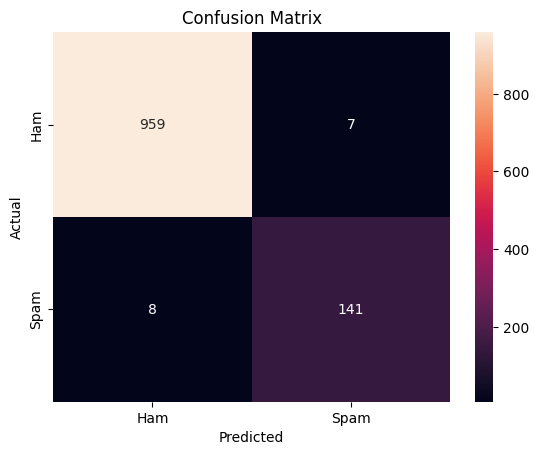

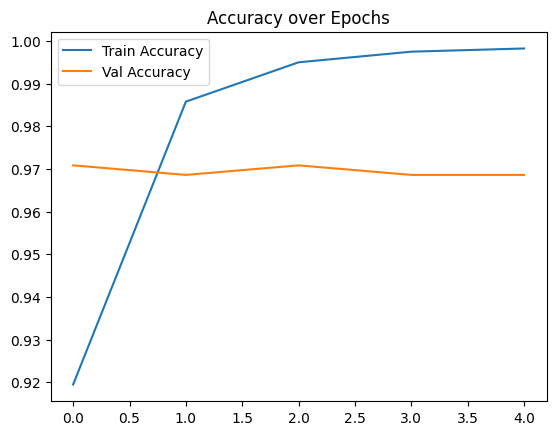

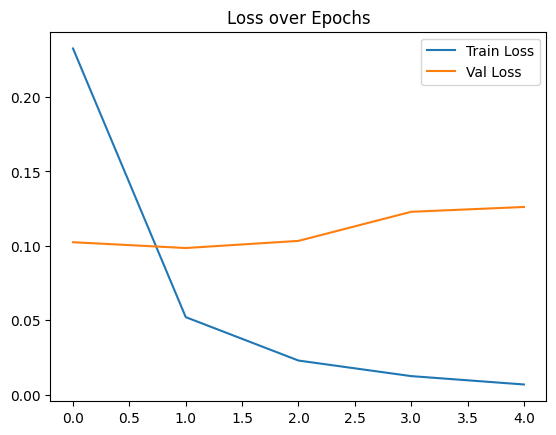

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 1. Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv', sep='\t', names=['label', 'text'])

# 2. Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

df['text'] = df['text'].apply(clean_text)

# 4. Tokenize and pad
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. LSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 8. Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc * 100:.2f}%")

# 9. Classification report and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Training curves
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()


**Declaration**

I, Pranav Khatavkar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/avishkar-004/Deep-Learning-/blob/main/Assignments/Avishkar_Pawar_DeepLearningLabAssignment_4.ipynb


Signature: Pranav Khatavkar

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion